<a href="https://colab.research.google.com/github/AribelGuzman/Aprendizaje_supervisado_y_no_supervisado/blob/main/Final_FDA_230522.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fundamentos de Analítica I**

**Trabajo Final** 

**Presentado Por:**

*   Diana Guzmán Granobles
*   Sebastian Barrera Peña
*   Gustavo Restrepo Figueroa

## **Cargue de Librerías y complementos**

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd  # Librería para manipular y analizar datos
import matplotlib.pyplot as plt  # Librería para visualizar
import seaborn as sns  # Librería para visualizar
import numpy as np  # Librería para operaciones numéricas
import plotly  # Librería para visualizaciones interactivas
import matplotlib.ticker as mtick  # Función para formatear en visualizaciones
from scipy.stats import pearsonr  # Coeficiente de correlación de Pearson con prueba
from sklearn.preprocessing import StandardScaler  # Escalador estándar
from sklearn.linear_model import LinearRegression  # Regresión lineal
import statsmodels.stats as sm  # Estadísticas
import statsmodels.api as sm1  # Estadísticas
from sklearn.preprocessing import OneHotEncoder  # Codificación one-hot
from sklearn.preprocessing import LabelEncoder # Codificación LabelEncoder
from scipy.stats import skew, kurtosis  # Funciones estadísticas
from sklearn import tree, datasets, neighbors, metrics  # Árbol de decisión, conjuntos de datos, vecinos cercanos, métricas
from sklearn.model_selection import train_test_split  # Método de particionamiento de conjuntos de datos para evaluación
from sklearn.model_selection import cross_val_score, cross_validate  # Método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut  # Iteradores de C-V
import math  # Funciones matemáticas
from collections import Counter  # Contador de elementos
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabasz_score  # Métricas de evaluación
from sklearn.decomposition import PCA  # Análisis de componentes principales
from sklearn.cluster import KMeans  # Algoritmo de agrupamiento K-Means
import xgboost as xgb  # Importar XGBoost
from xgboost import XGBClassifier  # Importar XGBClassifier
from xgboost import cv  # Importar función cv de XGBoost
from sklearn.ensemble import BaggingClassifier  # Clasificador por ensamblaje Bagging
from sklearn.tree import DecisionTreeClassifier  # Clasificador de árbol de decisión
from sklearn.datasets import make_classification  # Creación de conjuntos de datos para clasificación
from sklearn.metrics import accuracy_score  # Métrica de precisión
from sklearn.model_selection import cross_val_predict  # Predicción con validación cruzada
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# **Descripción**

El conjunto de datos (imports-85.data) a analizar consta de tres tipos de entidades: (a) la especificación de un automóvil en términos de varias características, (b) su calificación de riesgo de seguro asignada, y (c) sus pérdidas de uso normalizadas en comparación con otros automóviles. La calificación corresponde al grado en que el auto es más riesgoso de lo que indica su precio. A los automóviles se les asigna inicialmente un símbolo de factor de riesgo asociado con su precio. Luego, si es de mayor riesgo (o menos), se ajusta este símbolo moviéndolo hacia la derecha (o hacia la izquierda) en la escala. Los actuarios llaman a este proceso "simbolización". Un valor de +3 indica que el auto es riesgoso, mientras -3 significa que probablemente sea bastante seguro. El tercer factor es el pago de pérdida promedio relativo por año de vehículo asegurado. Este valor está normalizado para todos los autos dentro de una clasificación de tamaño particular (pequeño de dos puertas, familiar, deportivo/especial, etc.), y representa la pérdida promedio por auto por año.

# **Información de los atributos:**

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continua de 65 a 256. 
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo 
4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continua de 86.6 a 120.9. 
11. length: continua de 141.1 a 208.1. 
12. width: continua de 60.3 a 72.3. 
13. height: continua de 47.8 a 59.8. 
14. curb-weight: continua de 1488 a 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continua de 61 a 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continua de 2.54 a 3.94. 
20. stroke: continua de 2.07 a 4.17. 
21. compression-ratio: continua de 7 a 23. 
22. horsepower: continua de 48 a 288. 
23. peak-rpm: continua de 4150 a 6600. 
24. city-mpg: continua de 13 a 49.
25. highway-mpg: continua de 16 a 54.
26. price: continua de 5118 a 45400.




# **Objetivo de negocio**


El objetivo de este proyecto es predecir la calificación de riesgo de seguro de un automóvil, así como caracterizar los diferentes tipos de clientes.

# **Metodología**

## **1. Limpieza y EDA**

In [ ]:
# Carga de Datos
URL = "https://raw.githubusercontent.com/GARF1094/FDA/main/imports-85.data" 
df=pd.read_csv(URL)

In [ ]:
df.head(3)

3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.60  \
0  3    ?  alfa-romero  gas  std   two  convertible  rwd  front   88.6   
1  1    ?  alfa-romero  gas  std   two    hatchback  rwd  front   94.5   
2  2  164         audi  gas  std  four        sedan  fwd  front   99.8   

   168.80  64.10  48.80  2548  dohc  four  130  mpfi  3.47  2.68  9.00  111  \
0   168.8   64.1   48.8  2548  dohc  four  130  mpfi  3.47  2.68   9.0  111   
1   171.2   65.5   52.4  2823  ohcv   six  152  mpfi  2.68  3.47   9.0  154   
2   176.6   66.2   54.3  2337   ohc  four  109  mpfi  3.19  3.40  10.0  102   

   5000  21  27  13495  
0  5000  21  27  16500  
1  5000  19  26  16500  
2  5500  24  30  13950

In [ ]:
column_names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
                'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height',
                'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore',
                'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

df.columns = column_names

In [ ]:
df.head(3)

symboling normalized_losses         make fuel_type aspiration num_of_doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          1                 ?  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   

    body_style drive_wheels engine_location  wheel_base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1    hatchback          rwd           front        94.5   171.2   65.5   
2        sedan          fwd           front        99.8   176.6   66.2   

   height  curb_weight engine_type num_of_cylinders  engine_size fuel_system  \
0    48.8         2548        dohc             four          130        mpfi   
1    52.4         2823        ohcv              six          152        mpfi   
2    54.3         2337         ohc             four          109        mpfi   

   bore stroke  compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  2.68   3.47                9.0        154     5000        19           26   
2  3.19   3.40               10.0        102     5500        24           30   

   price  
0  16500  
1  16500  
2  13950

### **1.1. Exploración de Dataset**

Explorar la forma general del dataset utilizando funciones como *shape*, *head*, *tail*, *dtypes* e *isnull* es importante por varias razones:

**Dimensiones del dataset (shape):** La función shape proporciona el número de filas y columnas del dataset. Conocer las dimensiones del dataset es fundamental para comprender el tamaño del conjunto de datos con el que se está trabajando y estimar la cantidad de información disponible.

**Visualización de los primeros y últimos registros (head y tail):** Las funciones head y tail permiten ver una muestra de los primeros y últimos registros del dataset, respectivamente. Esto es útil para obtener una idea de la estructura y el contenido de los datos, así como para verificar si los datos se cargaron correctamente y cumplen con las expectativas iniciales.

**Tipos de datos de las columnas (dtypes):** La función dtypes muestra los tipos de datos de cada columna en el dataset. Conocer los tipos de datos es importante para comprender cómo se almacenan los datos y qué operaciones se pueden realizar con ellos. Además, ayuda a identificar posibles errores de tipo, como una columna que debería ser numérica pero se carga como texto.

**Valores faltantes (isnull):** La función isnull permite identificar los valores faltantes en el dataset. Los valores faltantes pueden afectar el análisis y los resultados, por lo que es esencial detectarlos y decidir cómo manejarlos. Conocer la cantidad y la ubicación de los valores faltantes ayuda a determinar si es necesario aplicar técnicas de imputación o eliminar ciertas filas o columnas del dataset.

In [ ]:
# Revisión de la forma de la matriz en términos de filas y columnas.
df.shape

(204, 26)

In [ ]:
# Revisión de los datos de la matriz.
df.head(5)

symboling normalized_losses         make fuel_type aspiration num_of_doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          1                 ?  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   
3          2               164         audi       gas        std         four   
4          2                 ?         audi       gas        std          two   

    body_style drive_wheels engine_location  wheel_base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1    hatchback          rwd           front        94.5   171.2   65.5   
2        sedan          fwd           front        99.8   176.6   66.2   
3        sedan          4wd           front        99.4   176.6   66.4   
4        sedan          fwd           front        99.8   177.3   66.3   

   height  curb_weight engine_type num_of_cylinders  engine_size fuel_system  \
0    48.8         2548        dohc             four          130        mpfi   
1    52.4         2823        ohcv              six          152        mpfi   
2    54.3         2337         ohc             four          109        mpfi   
3    54.3         2824         ohc             five          136        mpfi   
4    53.1         2507         ohc             five          136        mpfi   

   bore stroke  compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  2.68   3.47                9.0        154     5000        19           26   
2  3.19   3.40               10.0        102     5500        24           30   
3  3.19   3.40                8.0        115     5500        18           22   
4  3.19   3.40                8.5        110     5500        19           25   

   price  
0  16500  
1  16500  
2  13950  
3  17450  
4  15250

In [ ]:
# Revisión de los últimos datos de la matriz.
df.tail(5)

symboling normalized_losses   make fuel_type aspiration num_of_doors  \
199         -1                95  volvo       gas        std         four   
200         -1                95  volvo       gas      turbo         four   
201         -1                95  volvo       gas        std         four   
202         -1                95  volvo    diesel      turbo         four   
203         -1                95  volvo       gas      turbo         four   

    body_style drive_wheels engine_location  wheel_base  length  width  \
199      sedan          rwd           front       109.1   188.8   68.9   
200      sedan          rwd           front       109.1   188.8   68.8   
201      sedan          rwd           front       109.1   188.8   68.9   
202      sedan          rwd           front       109.1   188.8   68.9   
203      sedan          rwd           front       109.1   188.8   68.9   

     height  curb_weight engine_type num_of_cylinders  engine_size  \
199    55.5         2952         ohc             four          141   
200    55.5         3049         ohc             four          141   
201    55.5         3012        ohcv              six          173   
202    55.5         3217         ohc              six          145   
203    55.5         3062         ohc             four          141   

    fuel_system  bore stroke  compression_ratio horsepower peak_rpm  city_mpg  \
199        mpfi  3.78   3.15                9.5        114     5400        23   
200        mpfi  3.78   3.15                8.7        160     5300        19   
201        mpfi  3.58   2.87                8.8        134     5500        18   
202         idi  3.01   3.40               23.0        106     4800        26   
203        mpfi  3.78   3.15                9.5        114     5400        19   

     highway_mpg  price  
199           28  16845  
200           25  19045  
201           23  21485  
202           27  22470  
203           25  22625

In [ ]:
#Verificando el tipo de datos de cada una de las variables de la matriz:
df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [ ]:
# Revisión del porcentaje de datos nulos en cada una de las variables
df.isnull().sum()/len(df)*100

symboling            0.0
normalized_losses    0.0
make                 0.0
fuel_type            0.0
aspiration           0.0
num_of_doors         0.0
body_style           0.0
drive_wheels         0.0
engine_location      0.0
wheel_base           0.0
length               0.0
width                0.0
height               0.0
curb_weight          0.0
engine_type          0.0
num_of_cylinders     0.0
engine_size          0.0
fuel_system          0.0
bore                 0.0
stroke               0.0
compression_ratio    0.0
horsepower           0.0
peak_rpm             0.0
city_mpg             0.0
highway_mpg          0.0
price                0.0
dtype: float64

**Análisis parcial:**

La primera impresión es que aparentemente no se tienen datos nulos y que algunas columnas no tienen el tipo de dato que deberían. Sin embargo, a simple vista, gracias al análisis previo, se evidencia que se tienen valores faltantes y estos se identifican en las columnas con un signo "?", por lo tanto, se procederá a reemplazarlos por un "NaN" en primera instancia, posteriormente se dará tratamiento a este tipo de valores.

In [ ]:
# Reemplazar "?" por NaN en todas las columnas
df.replace("?", np.nan, inplace=True)

In [ ]:
# Revisión de los primeros datos de la matriz.
df.head(3)

symboling normalized_losses         make fuel_type aspiration num_of_doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          1               NaN  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   

    body_style drive_wheels engine_location  wheel_base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1    hatchback          rwd           front        94.5   171.2   65.5   
2        sedan          fwd           front        99.8   176.6   66.2   

   height  curb_weight engine_type num_of_cylinders  engine_size fuel_system  \
0    48.8         2548        dohc             four          130        mpfi   
1    52.4         2823        ohcv              six          152        mpfi   
2    54.3         2337         ohc             four          109        mpfi   

   bore stroke  compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  2.68   3.47                9.0        154     5000        19           26   
2  3.19   3.40               10.0        102     5500        24           30   

   price  
0  16500  
1  16500  
2  13950

Ahora sí se visualiza el porcentaje real de datos faltantes en la base dde datos:

In [ ]:
# Revisión del porcentaje de datos nulos en cada una de las variables
df.isnull().sum()/len(df)*100

symboling             0.000000
normalized_losses    19.607843
make                  0.000000
fuel_type             0.000000
aspiration            0.000000
num_of_doors          0.980392
body_style            0.000000
drive_wheels          0.000000
engine_location       0.000000
wheel_base            0.000000
length                0.000000
width                 0.000000
height                0.000000
curb_weight           0.000000
engine_type           0.000000
num_of_cylinders      0.000000
engine_size           0.000000
fuel_system           0.000000
bore                  1.960784
stroke                1.960784
compression_ratio     0.000000
horsepower            0.980392
peak_rpm              0.980392
city_mpg              0.000000
highway_mpg           0.000000
price                 1.960784
dtype: float64

In [ ]:
#ahora que ya tenemos identificados los nulos ajustamos el tipo de datos de algunas de las variables de la matriz
df['symboling'] = df['symboling'].astype(str)
df['normalized_losses'] = df['normalized_losses'].astype(float)
df['wheel_base'] = df['wheel_base'].astype(float)
df['length'] = df['length'].astype(float)
df['width'] = df['width'].astype(float)
df['height'] = df['height'].astype(float)
df['curb_weight'] = df['curb_weight'].astype(float)
df['engine_size'] = df['engine_size'].astype(float)
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['compression_ratio'] = df['compression_ratio'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)
df['peak_rpm'] = df['peak_rpm'].astype(float)
df['city_mpg'] = df['city_mpg'].astype(float)
df['highway_mpg'] = df['highway_mpg'].astype(float)
df['price'] = df['price'].astype(float)

In [ ]:
#Verificando los cambios en el tipo de datos de las variables de la matriz:
df.dtypes

symboling             object
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight          float64
engine_type           object
num_of_cylinders      object
engine_size          float64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg             float64
highway_mpg          float64
price                float64
dtype: object

### **1.2. Manejo de datos faltantes:**

Se ha decidido no eliminar datos faltantes y en su lugar, reemplazarlos con valores estadísticos como la mediana (para datos numéricos) y la moda (para datos categóricos), de acuerdo con las siguientes justificaciones:

**Conservación de información:** Eliminar filas o columnas con datos faltantes puede resultar en la pérdida de información importante. En este caso, dado que los registros de la base son pocos (alrededor de 200) y las variables son muchas, es preferible retener la mayor cantidad posible de datos y reemplazar los valores faltantes.

**Mantenimiento de la distribución original:** Reemplazar los valores faltantes por la mediana (en el caso de datos numéricos) y la moda (en el caso de datos categóricos) permite preservar la distribución original de los datos. Estas medidas estadísticas son resistentes a los valores atípicos y representan valores centrales que reflejan mejor el conjunto de datos sin verse tan afectados por valores extremos.

**Estabilidad del análisis:** Al reemplazar los valores faltantes por la mediana o la moda, se asegura la estabilidad del análisis y los resultados. Esto significa que si se realizan múltiples ejecuciones del análisis o se agregan nuevos datos con valores faltantes, los resultados no se verán afectados drásticamente, ya que la mediana y la moda son valores estables y consistentes.

**Aplicación en diferentes contextos:** La mediana y la moda son medidas estadísticas ampliamente utilizadas y comprensibles en diversos contextos. Su uso para reemplazar los valores faltantes es relativamente sencillo de implementar y se entiende fácilmente en comparación con técnicas más avanzadas de imputación.

In [ ]:
# Reemplazar NaN por la mediana para atributos numéricos, dado que es la medida de tendencia central que menos se ve afectada por atípicos 
# Reemplazar NaN por la moda para atributos categóricos.

df["normalized_losses"].replace(np.nan, df["normalized_losses"].median(), inplace = True)
df["bore"].replace(np.nan, df["bore"].median(), inplace = True)
df["stroke"].replace(np.nan, df["stroke"].median(), inplace = True)
df["horsepower"].replace(np.nan, df["horsepower"].median(), inplace = True)
df["peak_rpm"].replace(np.nan, df["peak_rpm"].median(), inplace = True)
df["price"].replace(np.nan, df["price"].median(), inplace = True)
df["num_of_doors"].replace(np.nan, df["num_of_doors"].mode()[0], inplace = True)

In [ ]:
# Revisión del porcentaje de datos nulos en cada una de las variables
df.isnull().sum()/len(df)*100

symboling            0.0
normalized_losses    0.0
make                 0.0
fuel_type            0.0
aspiration           0.0
num_of_doors         0.0
body_style           0.0
drive_wheels         0.0
engine_location      0.0
wheel_base           0.0
length               0.0
width                0.0
height               0.0
curb_weight          0.0
engine_type          0.0
num_of_cylinders     0.0
engine_size          0.0
fuel_system          0.0
bore                 0.0
stroke               0.0
compression_ratio    0.0
horsepower           0.0
peak_rpm             0.0
city_mpg             0.0
highway_mpg          0.0
price                0.0
dtype: float64

### **1.3. Valores únicos**

Observar los valores únicos de las variables es importante por varias razones:

**Detección de errores y anomalías:** Al examinar los valores únicos de una variable, es posible identificar valores atípicos, errores de entrada o cualquier otra anomalía en los datos. Estos valores pueden ser extremos o inconsistentes con el dominio del problema, lo que puede afectar la calidad del análisis y los resultados. Al identificarlos, se pueden tomar medidas para corregirlos o eliminarlos de manera adecuada.

**Preparación de datos y preprocesamiento:** Al conocer los valores únicos de las variables, se pueden tomar decisiones sobre cómo tratar los datos antes de aplicar técnicas de análisis. Por ejemplo, si una variable categórica tiene demasiados valores únicos, se puede considerar la agrupación de categorías similares para reducir la complejidad del análisis. También se pueden aplicar técnicas de codificación adecuadas, como la codificación one-hot o la codificación ordinal, según los valores únicos y la naturaleza de la variable.

**Identificación de variables irrelevantes:** Al examinar los valores únicos, se puede identificar si hay variables que no aportan información útil o que tienen un solo valor en todos los registros. Estas variables irrelevantes no agregan variabilidad o poder predictivo al modelo y pueden eliminarse del conjunto de datos para simplificar el análisis y reducir la complejidad computacional.


In [ ]:
#Revisando número de valores únicos por variable
df.nunique()

symboling              6
normalized_losses     51
make                  22
fuel_type              2
aspiration             2
num_of_doors           2
body_style             5
drive_wheels           3
engine_location        2
wheel_base            53
length                75
width                 44
height                49
curb_weight          171
engine_type            7
num_of_cylinders       7
engine_size           44
fuel_system            8
bore                  38
stroke                36
compression_ratio     32
horsepower            59
peak_rpm              23
city_mpg              29
highway_mpg           30
price                186
dtype: int64

In [ ]:
# Obtener el listado de valores únicos por cada columna 
unique_values = {}
for column in df.columns:
    if df[column].dtype in [int, float]:
        unique_values[column] = sorted(df[column].unique())
    else:
        unique_values[column] = df[column].unique()

# Mostrar el listado de valores únicos por cada columna
for column, values in unique_values.items():
    print(f"Valores únicos en la columna {column}:")
    if df[column].dtype in [int, float]:
        if len(values) <= 20:
            print(values)
        else:
            for i in range(0, len(values), 20):
                print(values[i:i+20])
    else:
        print(values)
    print()

Valores únicos en la columna symboling:
['3' '1' '2' '0' '-1' '-2']

Valores únicos en la columna normalized_losses:
[65.0, 74.0, 77.0, 78.0, 81.0, 83.0, 85.0, 87.0, 89.0, 90.0, 91.0, 93.0, 94.0, 95.0, 98.0, 101.0, 102.0, 103.0, 104.0, 106.0]
[107.0, 108.0, 110.0, 113.0, 115.0, 118.0, 119.0, 121.0, 122.0, 125.0, 128.0, 129.0, 134.0, 137.0, 142.0, 145.0, 148.0, 150.0, 153.0, 154.0]
[158.0, 161.0, 164.0, 168.0, 186.0, 188.0, 192.0, 194.0, 197.0, 231.0, 256.0]

Valores únicos en la columna make:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Valores únicos en la columna fuel_type:
['gas' 'diesel']

Valores únicos en la columna aspiration:
['std' 'turbo']

Valores únicos en la columna num_of_doors:
['two' 'four']

Valores únicos en la columna body_style:
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Valores úni

### **1.4. Análisis Univariado:**



In [ ]:
#Análisis descriptivo de variables numéricas y categóricas:
df.describe(include = 'all').T

count unique     top freq          mean          std  \
symboling            204      6       0   67           NaN          NaN   
normalized_losses  204.0    NaN     NaN  NaN    120.627451    31.880912   
make                 204     22  toyota   32           NaN          NaN   
fuel_type            204      2     gas  184           NaN          NaN   
aspiration           204      2     std  167           NaN          NaN   
num_of_doors         204      2    four  116           NaN          NaN   
body_style           204      5   sedan   96           NaN          NaN   
drive_wheels         204      3     fwd  120           NaN          NaN   
engine_location      204      2   front  201           NaN          NaN   
wheel_base         204.0    NaN     NaN  NaN     98.806373     5.994144   
length             204.0    NaN     NaN  NaN       174.075    12.362123   
width              204.0    NaN     NaN  NaN     65.916667     2.146716   
height             204.0    NaN     NaN  NaN      53.74902     2.424901   
curb_weight        204.0    NaN     NaN  NaN   2555.602941    521.96082   
engine_type          204      7     ohc  148           NaN          NaN   
num_of_cylinders     204      7    four  158           NaN          NaN   
engine_size        204.0    NaN     NaN  NaN    126.892157    41.744569   
fuel_system          204      8    mpfi   93           NaN          NaN   
bore               204.0    NaN     NaN  NaN      3.328676     0.271344   
stroke             204.0    NaN     NaN  NaN      3.258922     0.311781   
compression_ratio  204.0    NaN     NaN  NaN     10.148137        3.981   
horsepower         204.0    NaN     NaN  NaN    104.132353     39.62406   
peak_rpm           204.0    NaN     NaN  NaN   5126.715686   478.126988   
city_mpg           204.0    NaN     NaN  NaN     25.240196     6.551513   
highway_mpg        204.0    NaN     NaN  NaN     30.769608     6.898337   
price              204.0    NaN     NaN  NaN  13148.127451  7898.645692   

                      min      25%      50%      75%      max  
symboling             NaN      NaN      NaN      NaN      NaN  
normalized_losses    65.0    101.0    115.0    137.0    256.0  
make                  NaN      NaN      NaN      NaN      NaN  
fuel_type             NaN      NaN      NaN      NaN      NaN  
aspiration            NaN      NaN      NaN      NaN      NaN  
num_of_doors          NaN      NaN      NaN      NaN      NaN  
body_style            NaN      NaN      NaN      NaN      NaN  
drive_wheels          NaN      NaN      NaN      NaN      NaN  
engine_location       NaN      NaN      NaN      NaN      NaN  
wheel_base           86.6     94.5     97.0    102.4    120.9  
length              141.1    166.3    173.2    183.2    208.1  
width                60.3   64.075     65.5     66.9     72.3  
height               47.8     52.0     54.1     55.5     59.8  
curb_weight        1488.0   2145.0   2414.0  2939.25   4066.0  
engine_type           NaN      NaN      NaN      NaN      NaN  
num_of_cylinders      NaN      NaN      NaN      NaN      NaN  
engine_size          61.0     97.0    119.5    142.0    326.0  
fuel_system           NaN      NaN      NaN      NaN      NaN  
bore                 2.54     3.15     3.31   3.5825     3.94  
stroke               2.07     3.11     3.29     3.41     4.17  
compression_ratio     7.0    8.575      9.0      9.4     23.0  
horsepower           48.0     70.0     95.0    116.0    288.0  
peak_rpm           4150.0   4800.0   5200.0   5500.0   6600.0  
city_mpg             13.0     19.0     24.0     30.0     49.0  
highway_mpg          16.0     25.0     30.0     34.5     54.0  
price              5118.0  7784.75  10270.0  16500.0  45400.0

In [ ]:
#create_report(df)

#### ***Variables Numéricas***

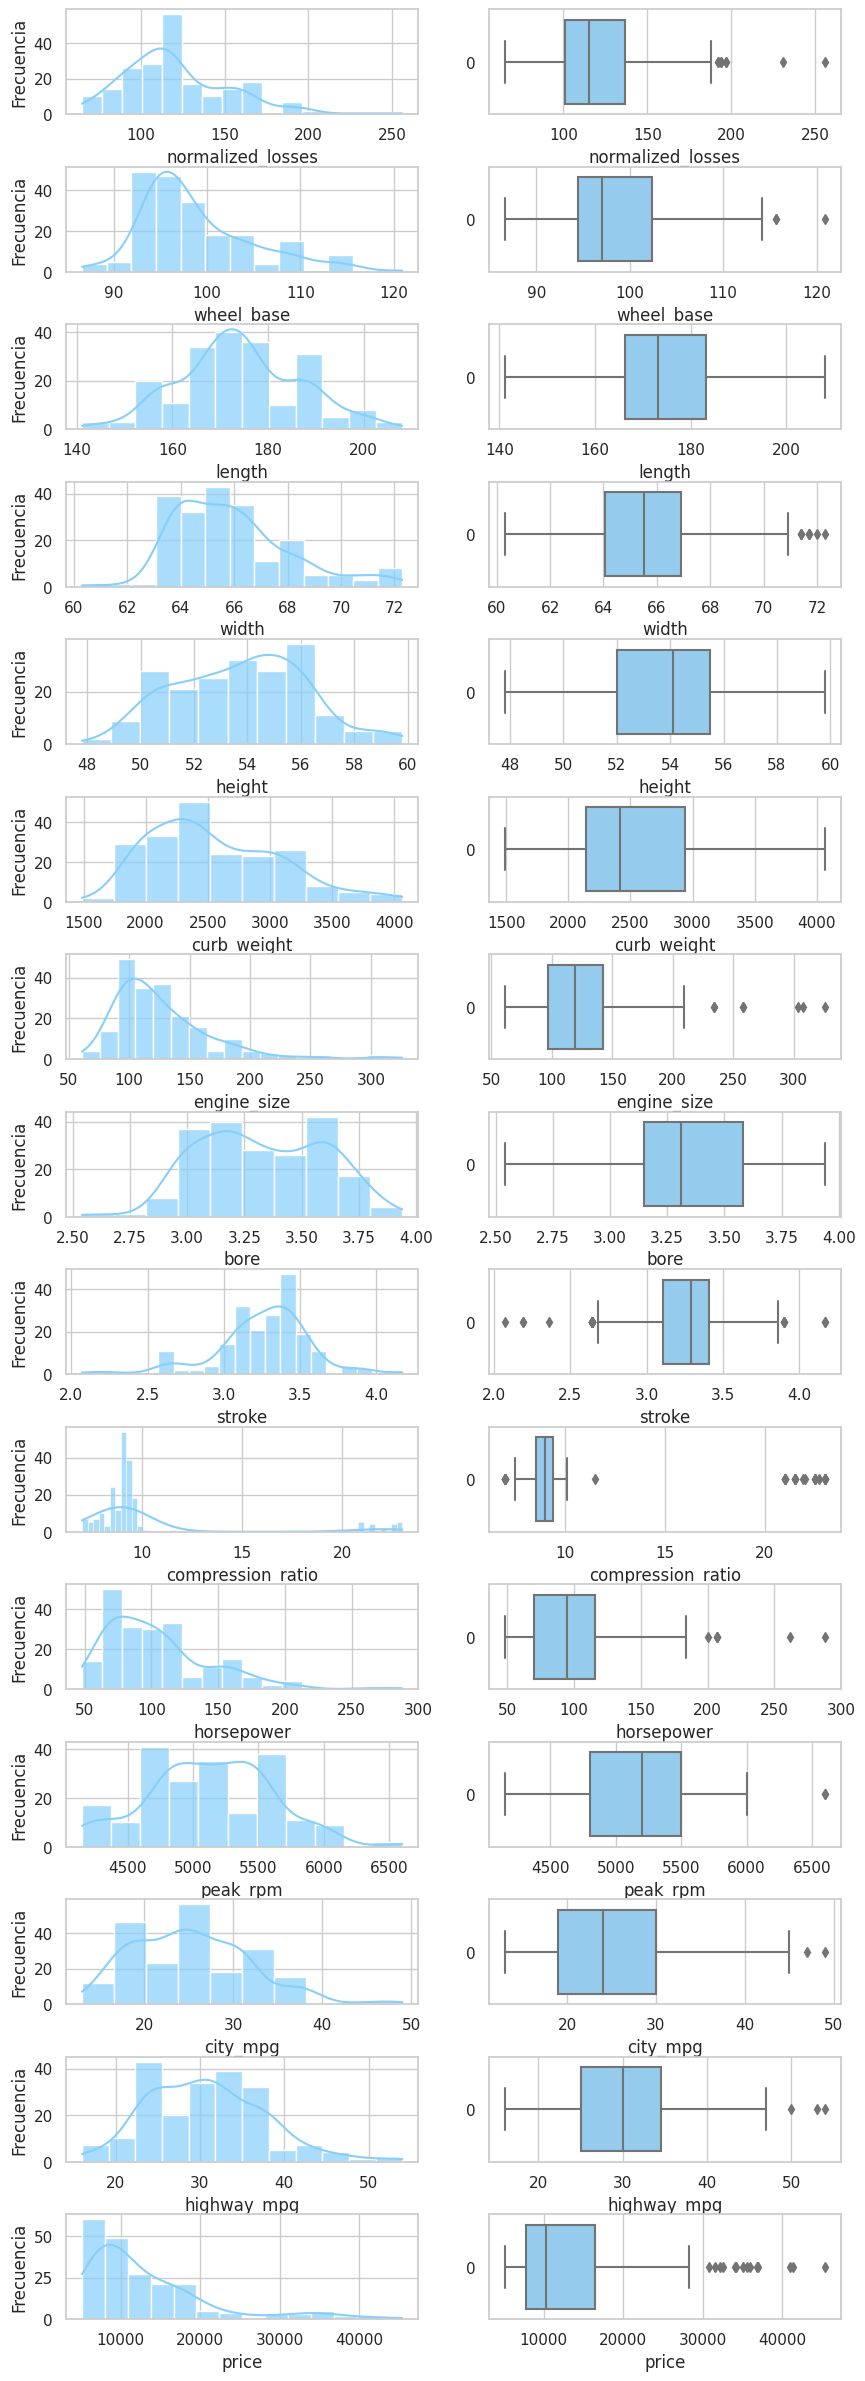

In [ ]:
variables = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
             'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
             'highway_mpg', 'price']

# Configuración de la matriz de gráficos
fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(10, 30))
fig.subplots_adjust(hspace=0.5)

# Generar histogramas y boxplots para cada variable
for i, variable in enumerate(variables):
    ax_hist = axes[i, 0]
    ax_box = axes[i, 1]

    # Histograma
    sns.histplot(df[variable], ax=ax_hist, kde=True, bins='auto', color="lightskyblue", alpha=0.7)
    ax_hist.set_xlabel(variable)
    ax_hist.set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(df[variable], ax=ax_box, color="lightskyblue", orient='h')
    ax_box.set_xlabel(variable)

plt.show()

#### ***Variables Categóricas***

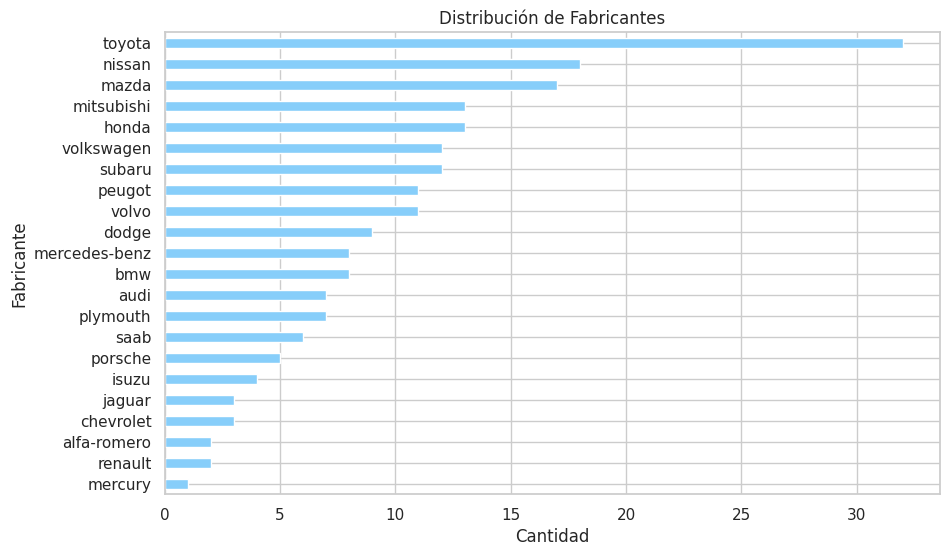

In [ ]:
# Configuración del gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(10, 6))

# Generar el gráfico de barras horizontal para 'make'
value_counts = df['make'].value_counts().sort_values(ascending=True)
value_counts.plot(kind='barh', ax=ax, color='lightskyblue')

ax.set_title('Distribución de Fabricantes')
ax.set_xlabel('Cantidad')
ax.set_ylabel('Fabricante')

plt.show()

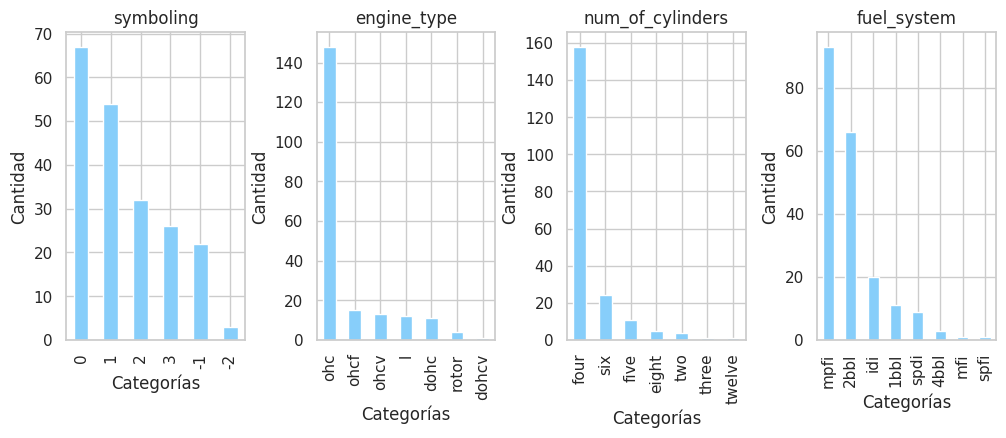

In [ ]:
variables = ['symboling', 'engine_type', 'num_of_cylinders', 'fuel_system']

# Configuración del gráfico de barras
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(12, 4))
fig.subplots_adjust(wspace=0.4)

# Generar los gráficos de barras para cada variable
for i, variable in enumerate(variables):
    ax = axes[i]
    value_counts = df[variable].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='lightskyblue')
    ax.set_title(variable)
    ax.set_xlabel('Categorías')
    ax.set_ylabel('Cantidad')

plt.show()


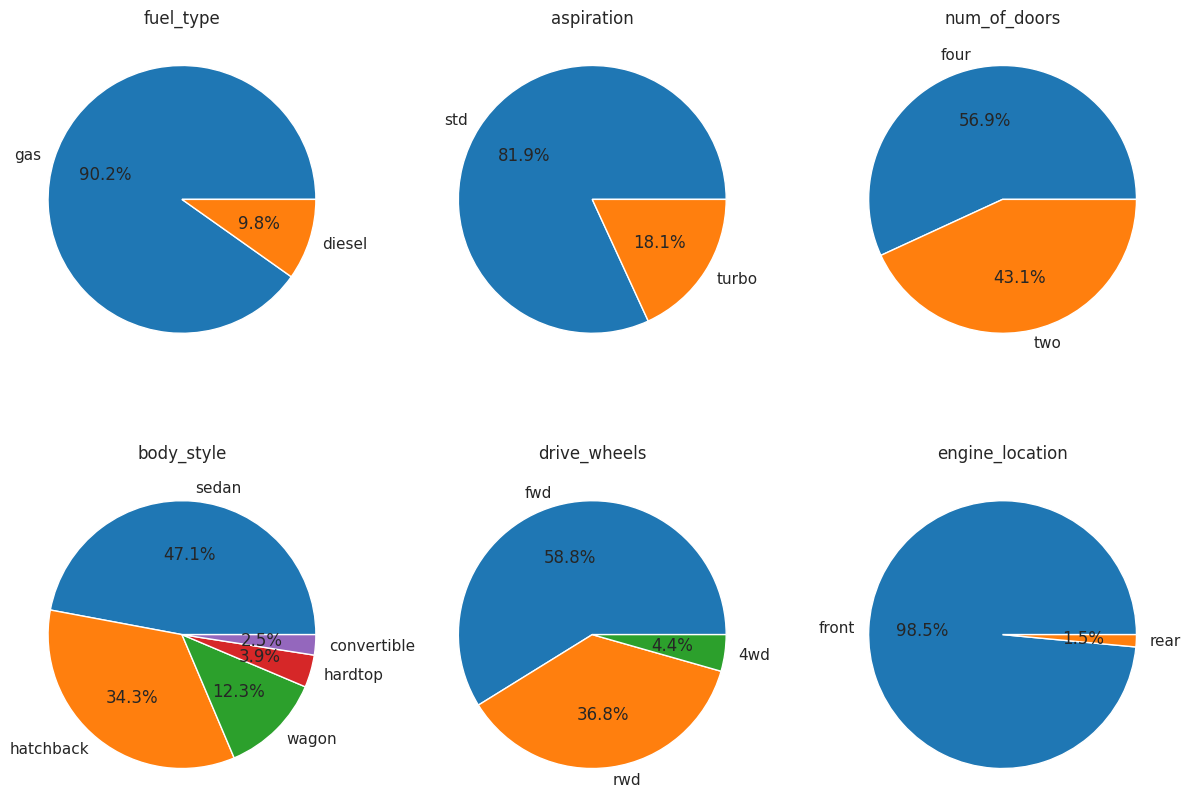

In [ ]:
variables = ['fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location']

# Configuración de la matriz de gráficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3)

# Generar los gráficos de pastel para cada variable
for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    value_counts = df[variable].value_counts()
    colors = plt.cm.tab10(range(len(value_counts)))  # Paleta de colores tab10
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors)
    ax.set_title(variable)


plt.show()


### **1.5. Análisis Multivariado**

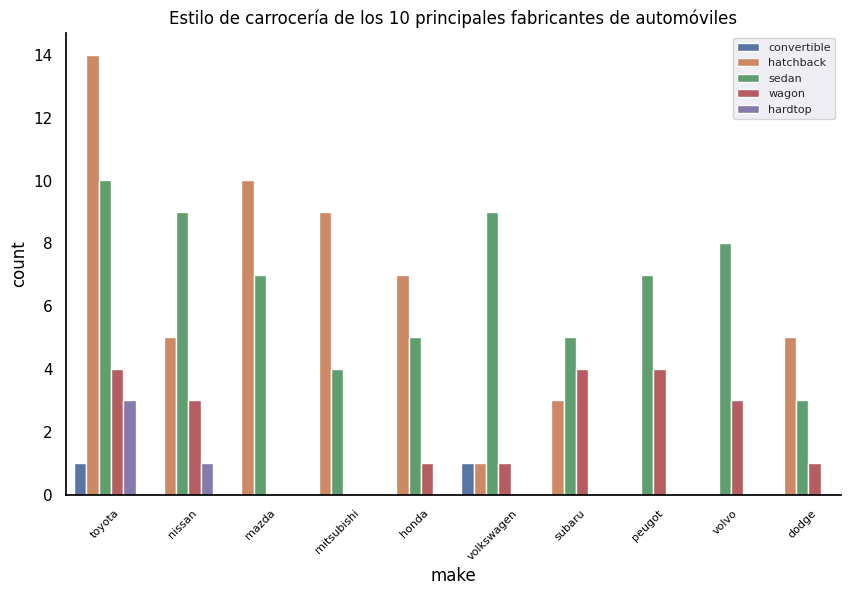

In [ ]:
# Ajustar el estilo y el contexto de seaborn
sns.set_style("whitegrid")
sns.set_context("notebook")

# Ajustar el tamaño de la figura
sns.set(rc={'figure.figsize': (10, 6)})

# Graficar el countplot con fondo blanco
ax = sns.countplot(x="make", hue="body_style", data=df, order=df["make"].value_counts().iloc[:10].index)
ax.set_facecolor("white")

# Ajustar los colores de los ejes
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar el color de las etiquetas del eje x y y
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

# Ajustar el color de los números del eje x y y
ax.tick_params(colors='black')

# Ajustar el título del gráfico
plt.title("Estilo de carrocería de los 10 principales fabricantes de automóviles", color='black')

# Ajustar el tamaño y la rotación de las etiquetas en el eje x
plt.xticks(rotation=45, fontsize=8)

# Ajustar el tamaño de las leyendas
plt.legend(fontsize=8)

# Mostrar el gráfico
plt.show()

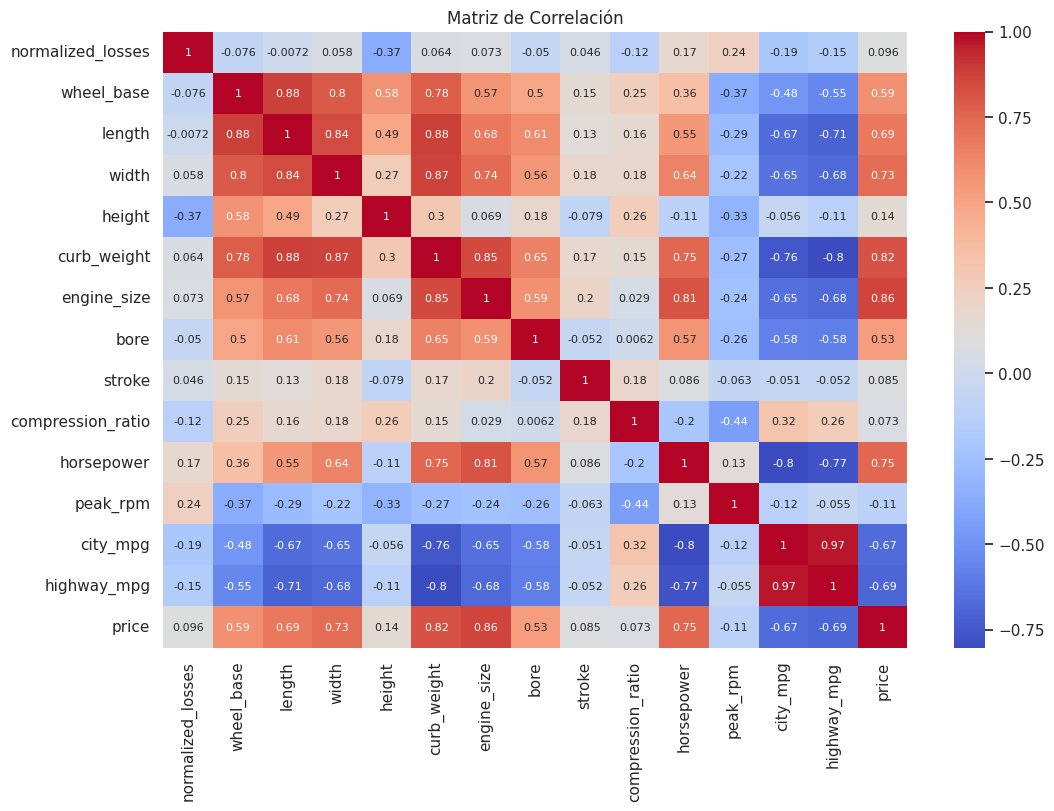

In [ ]:
# Obtener la matriz de correlación
matriz_correlacion = df.corr()

# Generar el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", annot_kws={"size": 8})
plt.title("Matriz de Correlación")

plt.show()

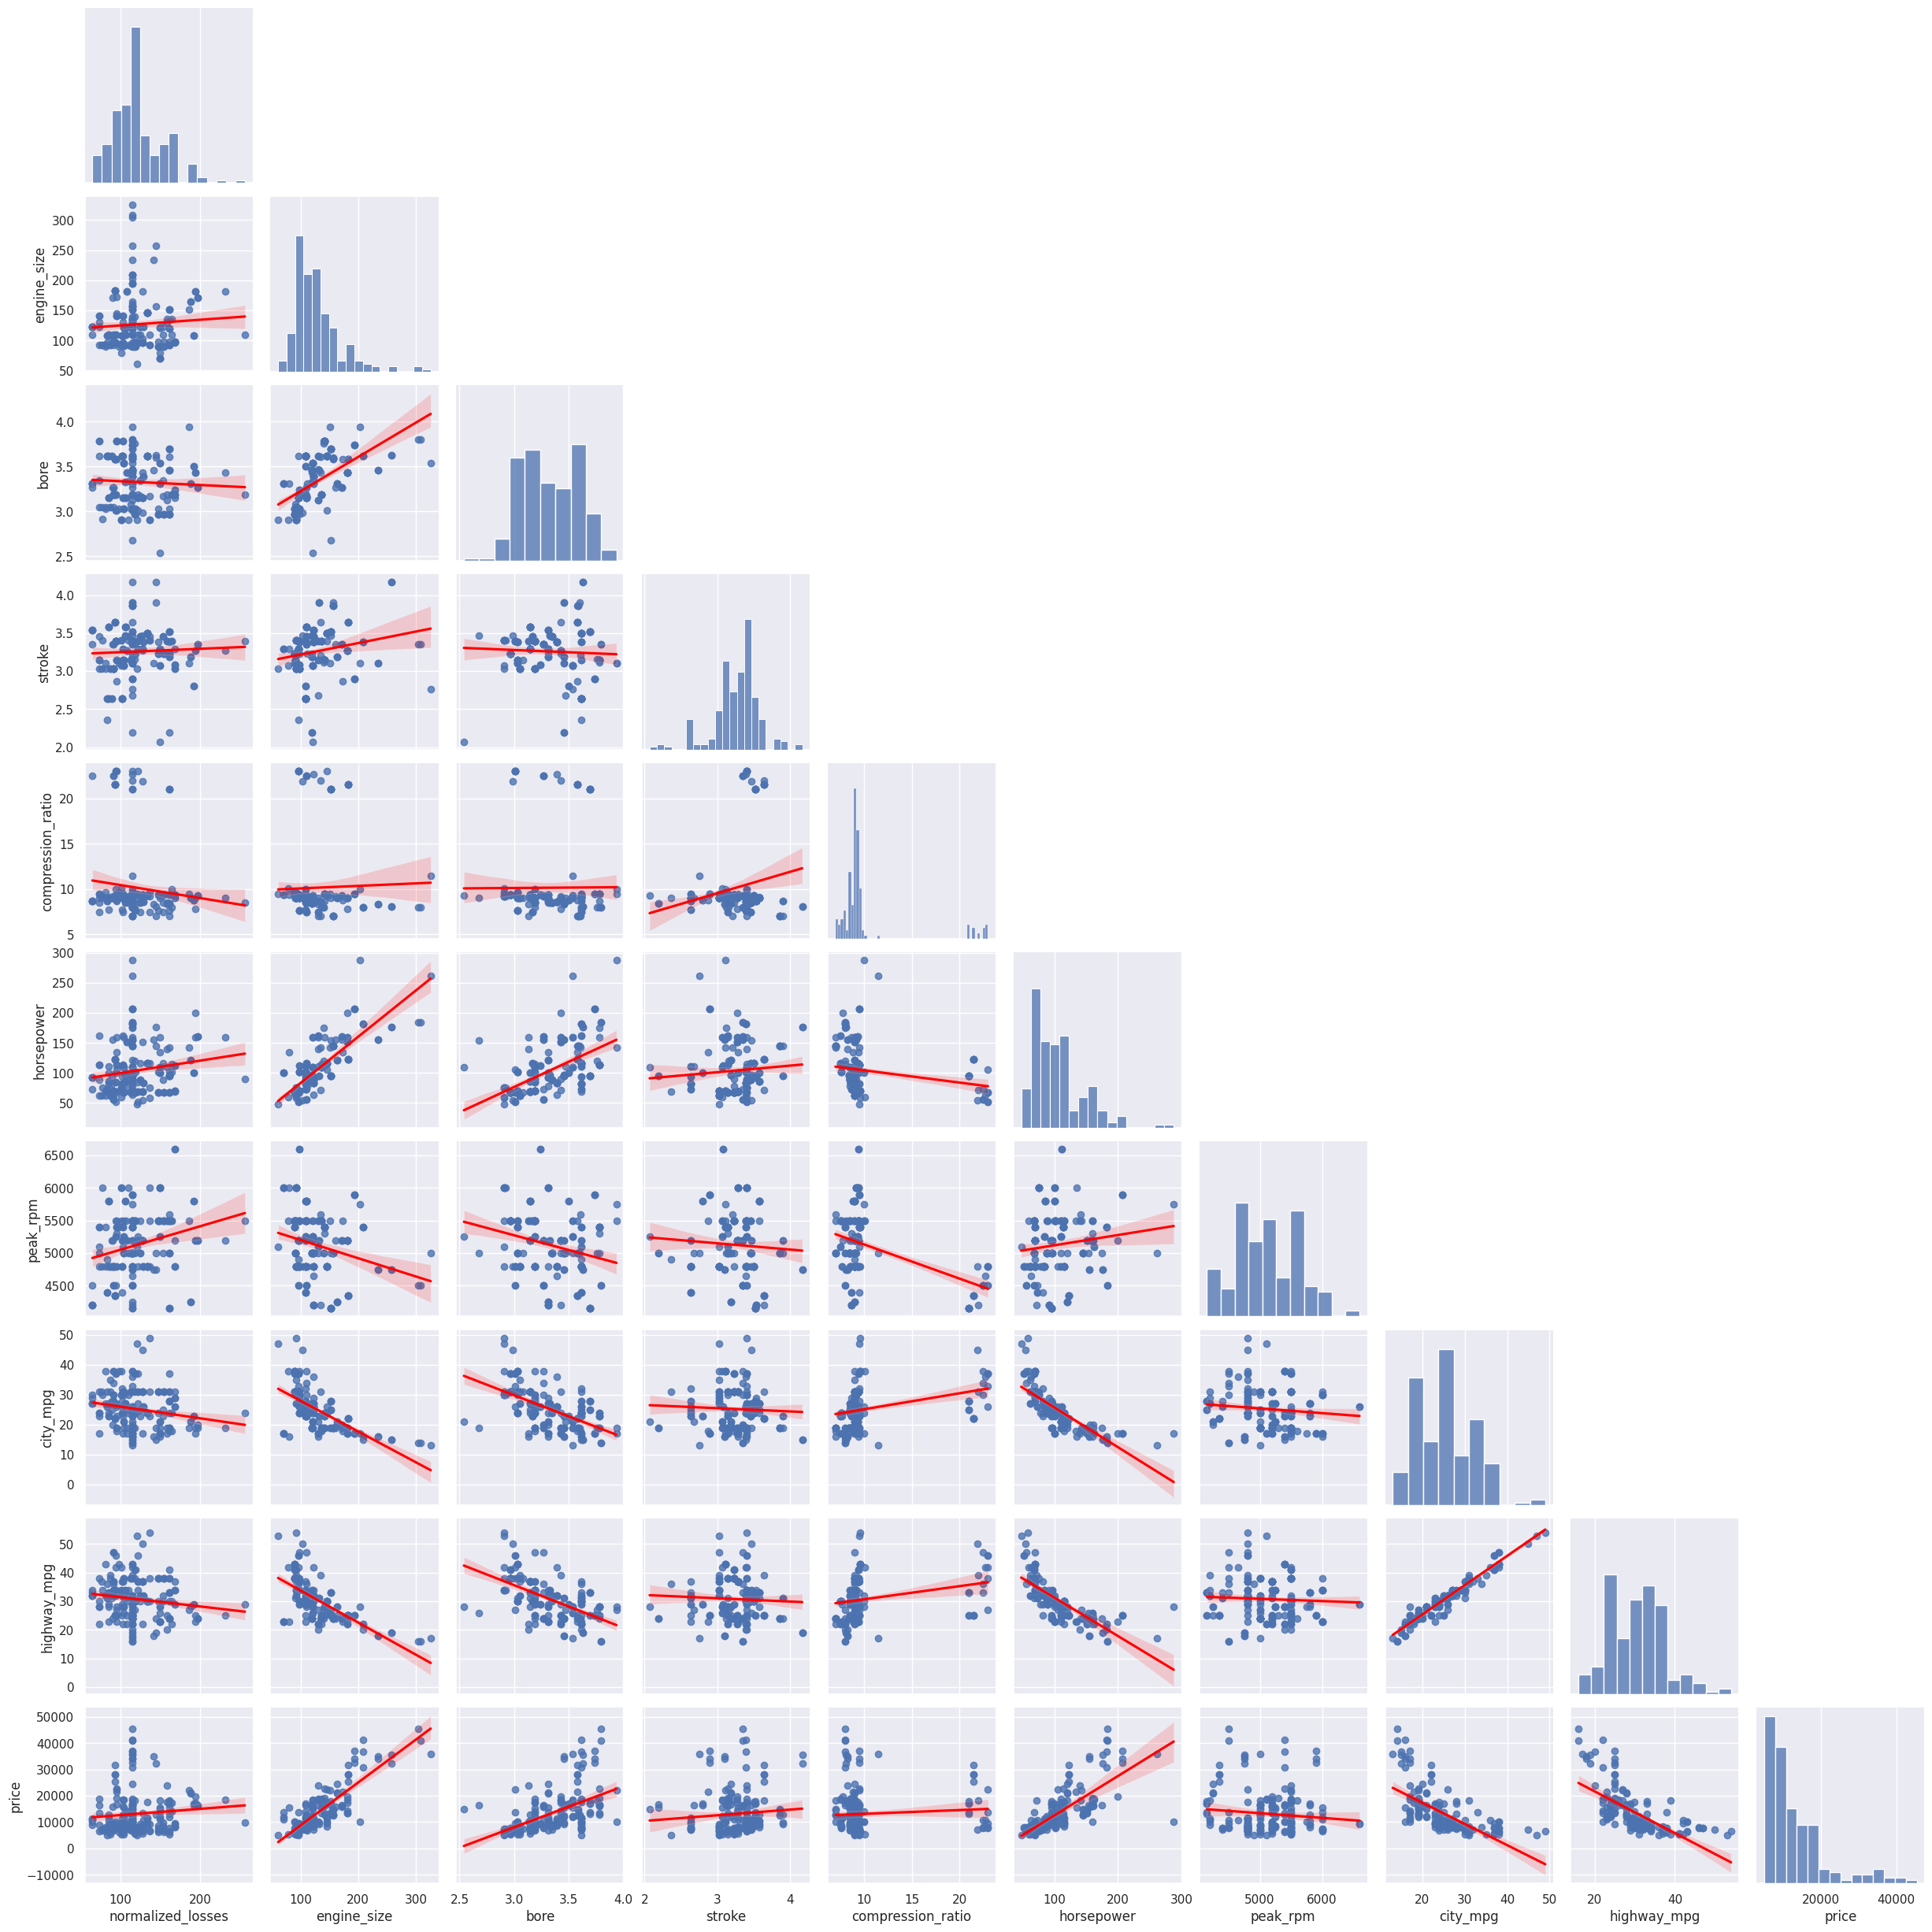

In [ ]:
for_check = df[['normalized_losses','engine_type', 'engine_size', 'fuel_system', 'bore', 'stroke','compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg','highway_mpg', 'price']]
sns.pairplot(for_check, kind="reg", plot_kws={'line_kws':{'color':'red'}} , corner=True)
plt.show()

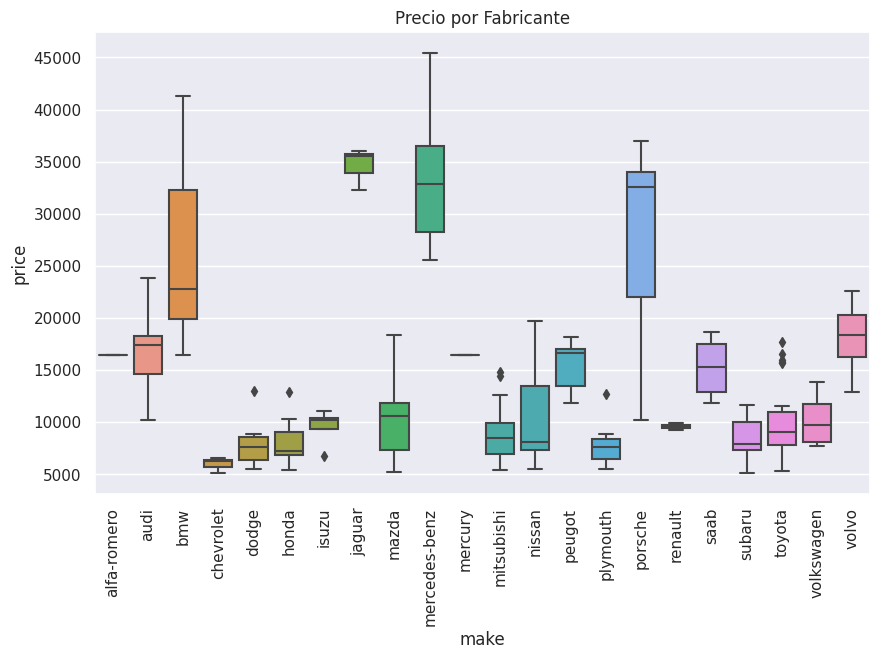

In [ ]:
sns.boxplot(x="make",y="price",data=df).set(title = "Precio por Fabricante")
plt.xticks(rotation=90)
plt.show()

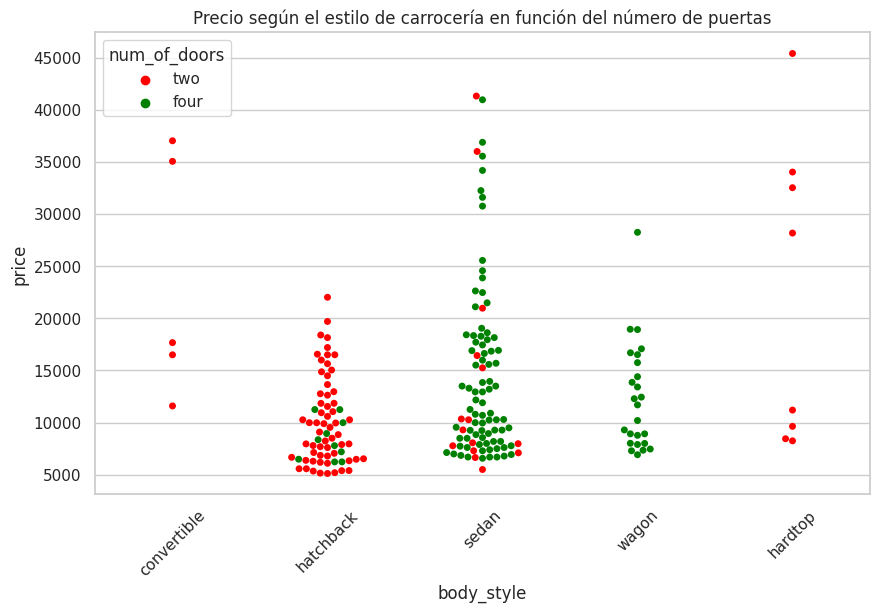

In [ ]:
# Ajustar el estilo y el contexto de seaborn
sns.set_style("whitegrid")
sns.set_context("notebook")

# Graficar el swarmplot con colores personalizados
sns.swarmplot(x="body_style", y="price", hue="num_of_doors", data=df, palette={"two": "red", "four": "green"}).set(
    title="Precio según el estilo de carrocería en función del número de puertas")

# Ajustar el tamaño y la rotación de las etiquetas en el eje x
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

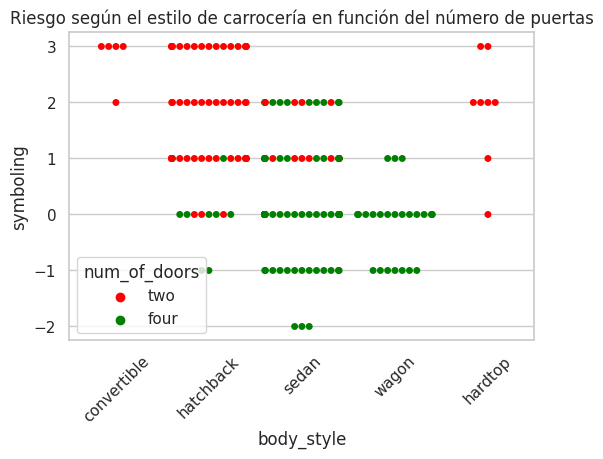

In [ ]:
# Ajustar el estilo y el contexto de seaborn
sns.set_style("whitegrid")
sns.set_context("notebook")

# Graficar el swarmplot con colores personalizados
sns.swarmplot(x="body_style", y="symboling", hue="num_of_doors", data=df, palette={"two": "red", "four": "green"}).set(
    title="Riesgo según el estilo de carrocería en función del número de puertas")

# Ajustar el tamaño y la rotación de las etiquetas en el eje x
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [ ]:
px.scatter(df, x="normalized_losses", y="price",color='make',title="Precio según las pérdidas normalizadas en los fabricantes de automóviles")

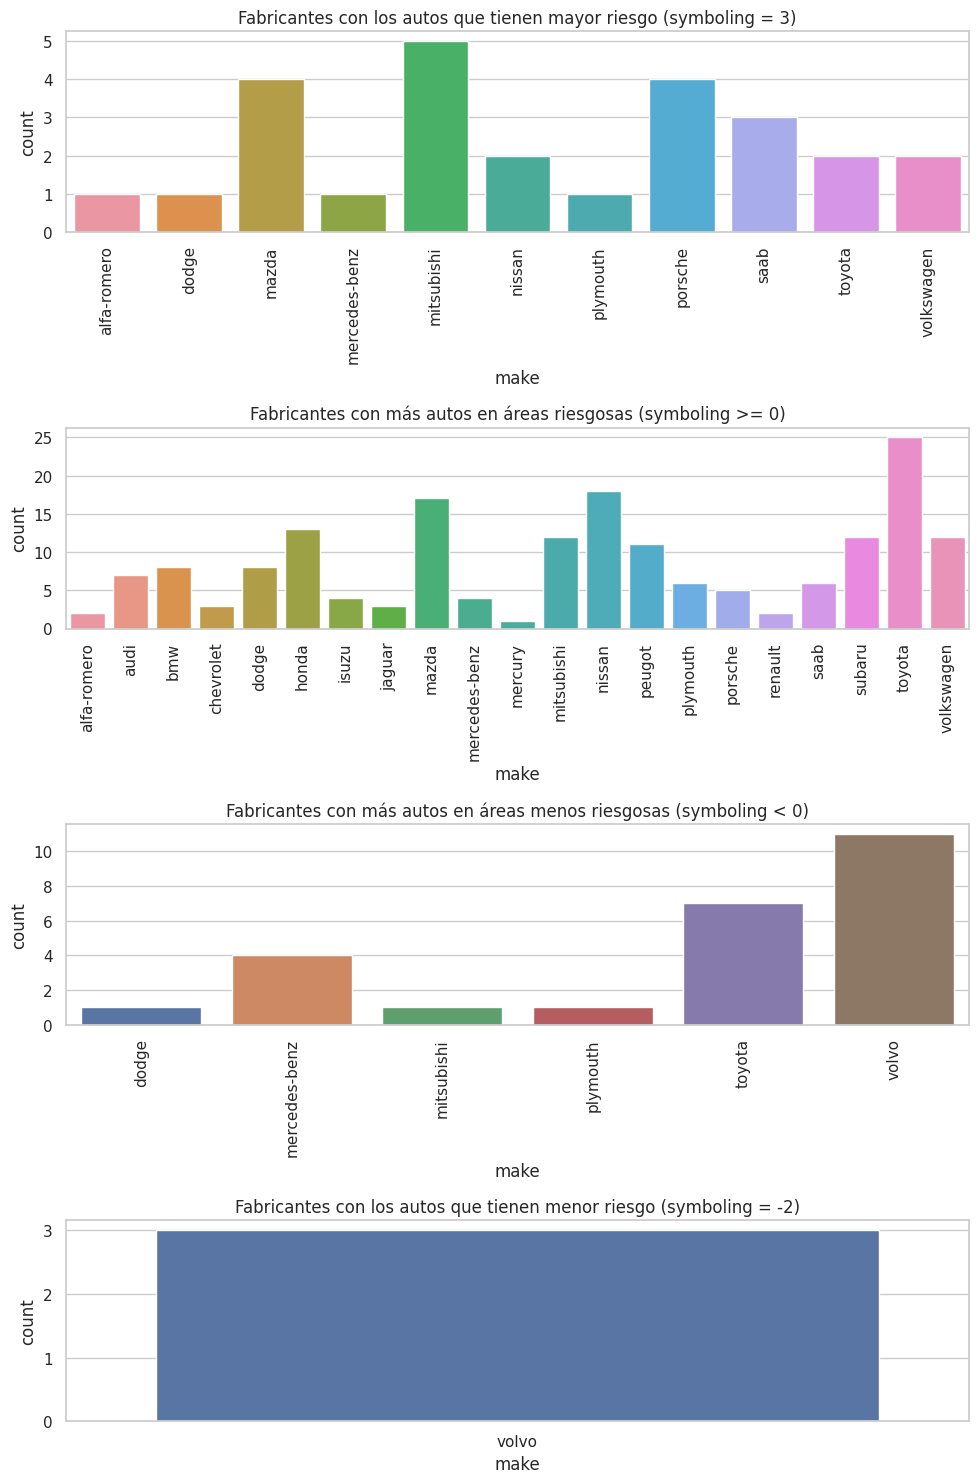

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(10, 15))
df['symboling'] = df['symboling'].astype(int)

# Fabricantes con más autos en áreas riesgosas
sns.countplot(x="make", data=df[df["symboling"] == 3], ax=ax[0]).set_title("Fabricantes con los autos que tienen mayor riesgo (symboling = 3)")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)  # Rotar etiquetas del eje x en el primer subplot

sns.countplot(x="make", data=df[df["symboling"] >= 0], ax=ax[1]).set_title("Fabricantes con más autos en áreas riesgosas (symboling >= 0)")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)  # Rotar etiquetas del eje x en el segundo subplot

# Fabricantes con más autos en áreas menos riesgosas
sns.countplot(x="make", data=df[df["symboling"] < 0], ax=ax[2]).set_title("Fabricantes con más autos en áreas menos riesgosas (symboling < 0)")
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)  # Rotar etiquetas del eje x en el primer subplot

sns.countplot(x="make", data=df[df["symboling"] == -2], ax=ax[3]).set_title("Fabricantes con los autos que tienen menor riesgo (symboling = -2)")

fig.tight_layout()

**Observaciones Importantes:**

Los tres principales fabricantes de automóviles en el estudio son Toyota, Nissan y Mazda. Estas compañías son reconocidas fabricantes de automóviles multinacionales japonesas. Se destaca que Toyota es el proveedor más destacado en la producción de hatchbacks, sedanes, wagons y hardtops.

Todos los carros con carrocerías de convertible y hardtop son de dos puertas.

En cuanto a los sistemas de combustible, se observa que los más comúnmente utilizados son MPFI y 2BBL. Asimismo, se identifica que la gasolina es el tipo de combustible predominante en el período analizado.

En relación a la ubicación de los motores, la gran mayoría de los automóviles estudiados tienen el motor situado en la parte delantera, mientras que solo un pequeño porcentaje, específicamente tres vehículos (1.5%), presentan el motor en la parte trasera.

En cuanto al tipo de motor más común, se destaca el uso del motor OHC (Overhead Camshaft) como predominante en los automóviles analizados.

Finalmente, más de dos tercios de los automóviles incluidos en los datos corresponden a sedanes y hatchbacks, lo que resalta la relevancia de estos tipos de carrocería en el conjunto de vehículos estudiados.

### **1.6. Agrupamiento de clases variable objetivo**

Se ha decidido agrupar las clases de la variable objetivo categórica con 5 clases (-2:3) en solo 2 (riesgo, no riesgo), de forma que se obtengan algunas ventajas a nivel de machine learning, como las siguientes:

**Simplificación del problema:** Reducir el número de clases puede simplificar el problema de clasificación, ya que se reduce la complejidad del modelo y la cantidad de decisiones que debe tomar. 

**Mejor balance de clases:** las clases originales están desequilibradas en términos de número de instancias, agruparlas puede ayudar a lograr un mejor equilibrio entre las clases. 

**Mayor interpretabilidad:** Al tener solo dos clases, el modelo resultante puede ser más fácil de interpretar y explicar. 

In [ ]:
df["sym_2clases"]=df["symboling"]

# Reemplazar los valores iguales a 0 por "riesgo"
df["sym_2clases"].replace(0, "no riesgo", inplace = True)
df["sym_2clases"].replace(-1, "no riesgo", inplace = True)
df["sym_2clases"].replace(-2, "no riesgo", inplace = True)

df["sym_2clases"].replace(1, "riesgo", inplace = True)
df["sym_2clases"].replace(2, "riesgo", inplace = True)
df["sym_2clases"].replace(3, "riesgo", inplace = True)

In [ ]:
df["sym_2clases"].replace("riesgo", 0, inplace = True)
df["sym_2clases"].replace("no riesgo", 1, inplace = True)
df['sym_2clases'] = df['sym_2clases'].astype(int)

In [ ]:
df_new=df.copy()
df_new=df_new.drop("symboling", axis=1)
df_new.head(5)

normalized_losses         make fuel_type aspiration num_of_doors  \
0              115.0  alfa-romero       gas        std          two   
1              115.0  alfa-romero       gas        std          two   
2              164.0         audi       gas        std         four   
3              164.0         audi       gas        std         four   
4              115.0         audi       gas        std          two   

    body_style drive_wheels engine_location  wheel_base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1    hatchback          rwd           front        94.5   171.2   65.5   
2        sedan          fwd           front        99.8   176.6   66.2   
3        sedan          4wd           front        99.4   176.6   66.4   
4        sedan          fwd           front        99.8   177.3   66.3   

   height  curb_weight engine_type num_of_cylinders  engine_size fuel_system  \
0    48.8       2548.0        dohc             four        130.0        mpfi   
1    52.4       2823.0        ohcv              six        152.0        mpfi   
2    54.3       2337.0         ohc             four        109.0        mpfi   
3    54.3       2824.0         ohc             five        136.0        mpfi   
4    53.1       2507.0         ohc             five        136.0        mpfi   

   bore  stroke  compression_ratio  horsepower  peak_rpm  city_mpg  \
0  3.47    2.68                9.0       111.0    5000.0      21.0   
1  2.68    3.47                9.0       154.0    5000.0      19.0   
2  3.19    3.40               10.0       102.0    5500.0      24.0   
3  3.19    3.40                8.0       115.0    5500.0      18.0   
4  3.19    3.40                8.5       110.0    5500.0      19.0   

   highway_mpg    price  sym_2clases  
0         27.0  16500.0            0  
1         26.0  16500.0            0  
2         30.0  13950.0            0  
3         22.0  17450.0            0  
4         25.0  15250.0            0

### **1.7. Análisis y tratamiento de atípicos**

Se usarán modelos de ensambles derivados de árboles, como Random Forest, Bagging y Gradient Boosting, que pueden ser menos sensibles a valores atípicos en comparación con un solo árbol de decisión. Esto se debe a la naturaleza del proceso de combinación de múltiples árboles en un ensamble.

Cuando se construye un ensamble de árboles, cada árbol se entrena de forma independiente en diferentes subconjuntos aleatorios del conjunto de datos. Esto significa que cada árbol puede capturar diferentes patrones y relaciones en los datos, incluidos los valores atípicos. Como resultado, los valores atípicos tienen menos impacto en las predicciones finales del ensamble, ya que están promediados o ponderados entre los múltiples árboles.

Aunque los ensambles derivados de árboles pueden ser menos sensibles a los valores atípicos, aún es posible que los valores extremos tengan cierto impacto en las predicciones del modelo. Si los valores atípicos son realmente significativos y no deseados, puede ser necesario realizar un preprocesamiento adecuado, como la identificación y eliminación de valores atípicos, o la transformación de las características para reducir su influencia. Por tanto, se realizará un preprocesamiento del 5,8% del total de los datos: 

In [ ]:
Variables = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
              'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
              'highway_mpg', 'price']

indicesAQuitar = []

for i, variable in enumerate(Variables):
    temp = df_new.sort_values([variable], ascending=False)
    print(f"Excepciones de {variable}: ", np.sort(temp[0:1].index.to_numpy()))
    indicesAQuitar = np.union1d(indicesAQuitar, temp[0:1].index.to_numpy())

print(len(indicesAQuitar))
indicesAQuitar

Excepciones de normalized_losses:  [189]
Excepciones de wheel_base:  [72]
Excepciones de length:  [72]
Excepciones de width:  [128]
Excepciones de height:  [27]
Excepciones de curb_weight:  [47]
Excepciones de engine_size:  [48]
Excepciones de bore:  [124]
Excepciones de stroke:  [46]
Excepciones de compression_ratio:  [183]
Excepciones de horsepower:  [128]
Excepciones de peak_rpm:  [164]
Excepciones de city_mpg:  [29]
Excepciones de highway_mpg:  [29]
Excepciones de price:  [73]
12


array([ 27.,  29.,  46.,  47.,  48.,  72.,  73., 124., 128., 164., 183.,
       189.])

In [ ]:
df_new.shape

(204, 26)

In [ ]:
df_new = df_new.loc[~df_new.index.isin(indicesAQuitar)]
df_new.shape

(192, 26)

### **1.8. Codificación de Variables**

La codificación de variables es importante al correr modelos de machine learning tipo ensambles por varias razones:

**Requisito de algoritmos:** Algunos algoritmos de ensamble, como Random Forest, Bagging o Gradient Boosting, requieren que todas las variables de entrada sean numéricas. Esto se debe a que estos algoritmos están basados en árboles de decisión, que operan con valores numéricos en sus nodos de división. Por lo tanto, las variables categóricas deben ser codificadas numéricamente antes de ser utilizadas en estos modelos.

**Representación adecuada de las variables categóricas:** Al codificar las variables categóricas, se les brinda una representación adecuada para ser interpretadas por los modelos. Las variables categóricas pueden tomar diferentes formas, como etiquetas de texto o valores de factor, que no tienen un orden inherente. La codificación numérica asigna valores numéricos a las categorías, lo que permite que los modelos aprendan las relaciones entre las categorías y realicen cálculos matemáticos adecuados.

**Mejor rendimiento del modelo:** La codificación adecuada de variables puede ayudar a mejorar el rendimiento del modelo de ensamble. Al codificar las variables categóricas de manera correcta, se puede preservar la información relevante de las categorías y permitir que los modelos aprendan relaciones más precisas entre las variables de entrada y la variable objetivo. Esto puede conducir a mejores predicciones y resultados más sólidos.

**Evitar errores y problemas de interpretación:** Si las variables categóricas no se codifican correctamente, pueden surgir errores o problemas durante el proceso de entrenamiento y evaluación del modelo. Por ejemplo, si se utiliza una codificación incorrecta, como asignar valores numéricos en un orden arbitrario, el modelo podría interpretar relaciones falsas o incorrectas entre las categorías. Además, la interpretación de los resultados del modelo puede verse comprometida si las variables categóricas no se codifican adecuadamente.

Para los siguientes atributos se construirán variables dummies, que son un tipo de variable numérica que se utiliza para etiquetar categorías. Se les llama "ficticias" porque los números en sí no representan una cantidad y por lo tanto no tienen un significado inherente, la tecnica que vamos a utilizar es aplicar One Hot Encoding.

Este código generará columnas adicionales en df_encoded correspondientes a cada categoría única en la columna. Cada columna tendrá valores binarios que indican si esa categoría está presente o no para cada fila en el DataFrame original.

Primero, se creará un copia del df para no perder los datos originales:

In [ ]:
df_Encoded = df_new.copy()

Procedimiento para **fuel_type**

In [ ]:
dummy_variable = pd.get_dummies(df_Encoded["make"])
dummy_variable.head()

alfa-romero  audi  bmw  chevrolet  dodge  honda  isuzu  mazda  \
0            1     0    0          0      0      0      0      0   
1            1     0    0          0      0      0      0      0   
2            0     1    0          0      0      0      0      0   
3            0     1    0          0      0      0      0      0   
4            0     1    0          0      0      0      0      0   

   mercedes-benz  mercury  mitsubishi  nissan  peugot  plymouth  porsche  \
0              0        0           0       0       0         0        0   
1              0        0           0       0       0         0        0   
2              0        0           0       0       0         0        0   
3              0        0           0       0       0         0        0   
4              0        0           0       0       0         0        0   

   renault  saab  subaru  toyota  volkswagen  volvo  
0        0     0       0       0           0      0  
1        0     0       0       0           0      0  
2        0     0       0       0           0      0  
3        0     0       0       0           0      0  
4        0     0       0       0           0      0

In [ ]:
# Unir data frame "df_Encoded" y "dummy_variable" 
df_Encoded = pd.concat([df_Encoded, dummy_variable], axis=1)

# Eliminar la columna original de "df_Encoded"
df_Encoded.drop("make", axis = 1, inplace=True)
df_Encoded.head()

normalized_losses fuel_type aspiration num_of_doors   body_style  \
0              115.0       gas        std          two  convertible   
1              115.0       gas        std          two    hatchback   
2              164.0       gas        std         four        sedan   
3              164.0       gas        std         four        sedan   
4              115.0       gas        std          two        sedan   

  drive_wheels engine_location  wheel_base  length  width  height  \
0          rwd           front        88.6   168.8   64.1    48.8   
1          rwd           front        94.5   171.2   65.5    52.4   
2          fwd           front        99.8   176.6   66.2    54.3   
3          4wd           front        99.4   176.6   66.4    54.3   
4          fwd           front        99.8   177.3   66.3    53.1   

   curb_weight engine_type num_of_cylinders  engine_size fuel_system  bore  \
0       2548.0        dohc             four        130.0        mpfi  3.47   
1       2823.0        ohcv              six        152.0        mpfi  2.68   
2       2337.0         ohc             four        109.0        mpfi  3.19   
3       2824.0         ohc             five        136.0        mpfi  3.19   
4       2507.0         ohc             five        136.0        mpfi  3.19   

   stroke  compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg  \
0    2.68                9.0       111.0    5000.0      21.0         27.0   
1    3.47                9.0       154.0    5000.0      19.0         26.0   
2    3.40               10.0       102.0    5500.0      24.0         30.0   
3    3.40                8.0       115.0    5500.0      18.0         22.0   
4    3.40                8.5       110.0    5500.0      19.0         25.0   

     price  sym_2clases  alfa-romero  audi  bmw  chevrolet  dodge  honda  \
0  16500.0            0            1     0    0          0      0      0   
1  16500.0            0            1     0    0          0      0      0   
2  13950.0            0            0     1    0          0      0      0   
3  17450.0            0            0     1    0          0      0      0   
4  15250.0            0            0     1    0          0      0      0   

   isuzu  mazda  mercedes-benz  mercury  mitsubishi  nissan  peugot  plymouth  \
0      0      0              0        0           0       0       0         0   
1      0      0              0        0           0       0       0         0   
2      0      0              0        0           0       0       0         0   
3      0      0              0        0           0       0       0         0   
4      0      0              0        0           0       0       0         0   

   porsche  renault  saab  subaru  toyota  volkswagen  volvo  
0        0        0     0       0       0           0      0  
1        0        0     0       0       0           0      0  
2        0        0     0       0       0           0      0  
3        0        0     0       0       0           0      0  
4        0        0     0       0       0           0      0

Procedimiento para **fuel_type**

In [ ]:
dummy_variable = pd.get_dummies(df_Encoded["fuel_type"])
dummy_variable.head()

diesel  gas
0       0    1
1       0    1
2       0    1
3       0    1
4       0    1

In [ ]:
# Ajustamos el nombre de las columnas para mayor claridad.
dummy_variable.rename(columns={'gas':'tipo_combustible_gas', 'diesel':'tipo_combustible_diesel'}, inplace=True)
dummy_variable.head()

tipo_combustible_diesel  tipo_combustible_gas
0                        0                     1
1                        0                     1
2                        0                     1
3                        0                     1
4                        0                     1

In [ ]:
# Unir data frame "df_Encoded" y "dummy_variable_1" 
df_Encoded = pd.concat([df_Encoded, dummy_variable], axis=1)

# Eliminar la columna original "fuel_type" de "df_Encoded"
df_Encoded.drop("fuel_type", axis = 1, inplace=True)
df_Encoded.head()

normalized_losses aspiration num_of_doors   body_style drive_wheels  \
0              115.0        std          two  convertible          rwd   
1              115.0        std          two    hatchback          rwd   
2              164.0        std         four        sedan          fwd   
3              164.0        std         four        sedan          4wd   
4              115.0        std          two        sedan          fwd   

  engine_location  wheel_base  length  width  height  curb_weight engine_type  \
0           front        88.6   168.8   64.1    48.8       2548.0        dohc   
1           front        94.5   171.2   65.5    52.4       2823.0        ohcv   
2           front        99.8   176.6   66.2    54.3       2337.0         ohc   
3           front        99.4   176.6   66.4    54.3       2824.0         ohc   
4           front        99.8   177.3   66.3    53.1       2507.0         ohc   

  num_of_cylinders  engine_size fuel_system  bore  stroke  compression_ratio  \
0             four        130.0        mpfi  3.47    2.68                9.0   
1              six        152.0        mpfi  2.68    3.47                9.0   
2             four        109.0        mpfi  3.19    3.40               10.0   
3             five        136.0        mpfi  3.19    3.40                8.0   
4             five        136.0        mpfi  3.19    3.40                8.5   

   horsepower  peak_rpm  city_mpg  highway_mpg    price  sym_2clases  \
0       111.0    5000.0      21.0         27.0  16500.0            0   
1       154.0    5000.0      19.0         26.0  16500.0            0   
2       102.0    5500.0      24.0         30.0  13950.0            0   
3       115.0    5500.0      18.0         22.0  17450.0            0   
4       110.0    5500.0      19.0         25.0  15250.0            0   

   alfa-romero  audi  bmw  chevrolet  dodge  honda  isuzu  mazda  \
0            1     0    0          0      0      0      0      0   
1            1     0    0          0      0      0      0      0   
2            0     1    0          0      0      0      0      0   
3            0     1    0          0      0      0      0      0   
4            0     1    0          0      0      0      0      0   

   mercedes-benz  mercury  mitsubishi  nissan  peugot  plymouth  porsche  \
0              0        0           0       0       0         0        0   
1              0        0           0       0       0         0        0   
2              0        0           0       0       0         0        0   
3              0        0           0       0       0         0        0   
4              0        0           0       0       0         0        0   

   renault  saab  subaru  toyota  volkswagen  volvo  tipo_combustible_diesel  \
0        0     0       0       0           0      0                        0   
1        0     0       0       0           0      0                        0   
2        0     0       0       0           0      0                        0   
3        0     0       0       0           0      0                        0   
4        0     0       0       0           0      0                        0   

   tipo_combustible_gas  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

Procedimiento para **num_of_doors, num_of_cylinders, aspiration, body_style, drive_wheels, engine_location, engine_type y fuel_system**

In [ ]:
dummy_variable = pd.get_dummies(df_Encoded["num_of_doors"])
dummy_variable.rename(columns={'two':'num_of_doors_two', 'four':'num_of_doors_four'}, inplace=True)
df_Encoded = pd.concat([df_Encoded, dummy_variable], axis=1)
df_Encoded.drop("num_of_doors", axis = 1, inplace=True)

dummy_variable = pd.get_dummies(df_Encoded["num_of_cylinders"])
dummy_variable.rename(columns={'two':'num_of_cylinders_two', 'num_of_cylinders_three':'three', 
                               'four':'num_of_cylinders_four', 'five':'num_of_cylinders_five',
                               'six':'num_of_cylinders_six', 'eight':'num_of_cylinders_eight',  
                               'twelve':'num_of_cylinders_twelve'}, inplace=True)
df_Encoded = pd.concat([df_Encoded, dummy_variable], axis=1)
df_Encoded.drop("num_of_cylinders", axis = 1, inplace=True)

dummy_variable = pd.get_dummies(df_Encoded["aspiration"])
dummy_variable.rename(columns={'std':'aspiration_std', 'turbo':'aspiration_turbo'}, inplace=True)
df_Encoded = pd.concat([df_Encoded, dummy_variable], axis=1)
df_Encoded.drop("aspiration", axis = 1, inplace=True)

dummy_variable = pd.get_dummies(df_Encoded["body_style"])
dummy_variable.rename(columns={'convertible':'body_style_convertible', 'hatchback':'body_style_hatchback', 
                               'sedan':'body_style_sedan', 'wagon':'wagonbody_style_wagon', 
                               'hardtop':'body_style_hardtop'}, inplace=True)
df_Encoded = pd.concat([df_Encoded, dummy_variable], axis=1)
df_Encoded.drop("body_style", axis = 1, inplace=True)

dummy_variable = pd.get_dummies(df_Encoded["drive_wheels"])
dummy_variable.rename(columns={'rwd':'drive_wheels_rwd', 'fwd':'drive_wheels_fwd', 
                               '4wd':'drive_wheels_4wd'}, inplace=True)
df_Encoded = pd.concat([df_Encoded, dummy_variable], axis=1)
df_Encoded.drop("drive_wheels", axis = 1, inplace=True)

dummy_variable = pd.get_dummies(df_Encoded["engine_location"])
dummy_variable.rename(columns={'front':'engine_location_front', 'rear':'engine_location_rear'}, inplace=True)
df_Encoded = pd.concat([df_Encoded, dummy_variable], axis=1)
df_Encoded.drop("engine_location", axis = 1, inplace=True)

dummy_variable = pd.get_dummies(df_Encoded["engine_type"])
dummy_variable.rename(columns={'dohc':'engine_type_dohc', 'ohcv':'engine_type_ohcv', 'ohc':'engine_type_ohc', 
                               'l':'engine_type_l', 'rotor':'engine_type_rotor', 'ohcf':'engine_type_ohcf', 
                               'dohcv':'engine_type_dohcv'}, inplace=True)
df_Encoded = pd.concat([df_Encoded, dummy_variable], axis=1)
df_Encoded.drop("engine_type", axis = 1, inplace=True)

dummy_variable = pd.get_dummies(df_Encoded["fuel_system"])
dummy_variable.rename(columns={'mpfi':'fuel_system_mpfi', '2bbl':'fuel_system_2bbl', 'mfi':'fuel_system_mfi', 
                               '1bbl':'fuel_system_1bbl', 'spfi':'fuel_system_spfi', '4bbl':'fuel_system_4bbl', 
                               'idi':'fuel_system_idi', 'spdi':'fuel_system_spdi'}, inplace=True)
df_Encoded = pd.concat([df_Encoded, dummy_variable], axis=1)
df_Encoded.drop("fuel_system", axis = 1, inplace=True)

df_Encoded.head()

normalized_losses  wheel_base  length  width  height  curb_weight  \
0              115.0        88.6   168.8   64.1    48.8       2548.0   
1              115.0        94.5   171.2   65.5    52.4       2823.0   
2              164.0        99.8   176.6   66.2    54.3       2337.0   
3              164.0        99.4   176.6   66.4    54.3       2824.0   
4              115.0        99.8   177.3   66.3    53.1       2507.0   

   engine_size  bore  stroke  compression_ratio  horsepower  peak_rpm  \
0        130.0  3.47    2.68                9.0       111.0    5000.0   
1        152.0  2.68    3.47                9.0       154.0    5000.0   
2        109.0  3.19    3.40               10.0       102.0    5500.0   
3        136.0  3.19    3.40                8.0       115.0    5500.0   
4        136.0  3.19    3.40                8.5       110.0    5500.0   

   city_mpg  highway_mpg    price  sym_2clases  alfa-romero  audi  bmw  \
0      21.0         27.0  16500.0            0            1     0    0   
1      19.0         26.0  16500.0            0            1     0    0   
2      24.0         30.0  13950.0            0            0     1    0   
3      18.0         22.0  17450.0            0            0     1    0   
4      19.0         25.0  15250.0            0            0     1    0   

   chevrolet  dodge  honda  isuzu  mazda  mercedes-benz  mercury  mitsubishi  \
0          0      0      0      0      0              0        0           0   
1          0      0      0      0      0              0        0           0   
2          0      0      0      0      0              0        0           0   
3          0      0      0      0      0              0        0           0   
4          0      0      0      0      0              0        0           0   

   nissan  peugot  plymouth  porsche  renault  saab  subaru  toyota  \
0       0       0         0        0        0     0       0       0   
1       0       0         0        0        0     0       0       0   
2       0       0         0        0        0     0       0       0   
3       0       0         0        0        0     0       0       0   
4       0       0         0        0        0     0       0       0   

   volkswagen  volvo  tipo_combustible_diesel  tipo_combustible_gas  \
0           0      0                        0                     1   
1           0      0                        0                     1   
2           0      0                        0                     1   
3           0      0                        0                     1   
4           0      0                        0                     1   

   num_of_doors_four  num_of_doors_two  num_of_cylinders_eight  \
0                  0                 1                       0   
1                  0                 1                       0   
2                  1                 0                       0   
3                  1                 0                       0   
4                  0                 1                       0   

   num_of_cylinders_five  num_of_cylinders_four  num_of_cylinders_six  three  \
0                      0                      1                     0      0   
1                      0                      0                     1      0   
2                      0                      1                     0      0   
3                      1                      0                     0      0   
4                      1                      0                     0      0   

   num_of_cylinders_two  aspiration_std  aspiration_turbo  \
0                     0               1                 0   
1                     0               1                 0   
2                     0               1                 0   
3                     0               1                 0   
4                     0               1                 0   

   body_style_convertible  body_style_hardtop  body_style_hatchback  \
0                       1          

In [ ]:
# Obtener los tipos de columnas
column_types = df_Encoded.dtypes

print(column_types.head(100))

normalized_losses          float64
wheel_base                 float64
length                     float64
width                      float64
height                     float64
curb_weight                float64
engine_size                float64
bore                       float64
stroke                     float64
compression_ratio          float64
horsepower                 float64
peak_rpm                   float64
city_mpg                   float64
highway_mpg                float64
price                      float64
sym_2clases                  int64
alfa-romero                  uint8
audi                         uint8
bmw                          uint8
chevrolet                    uint8
dodge                        uint8
honda                        uint8
isuzu                        uint8
mazda                        uint8
mercedes-benz                uint8
mercury                      uint8
mitsubishi                   uint8
nissan                       uint8
peugot              

In [ ]:
# Obtener el listado de valores únicos por cada columna 
unique_values = {}
for column in df_Encoded.columns:
    if df_Encoded[column].dtype in [int, float]:
        unique_values[column] = sorted(df_Encoded[column].unique())
    else:
        unique_values[column] = df_Encoded[column].unique()

# Mostrar el listado de valores únicos por cada columna
for column, values in unique_values.items():
    print(f"Valores únicos en la columna {column}:")
    if df_Encoded[column].dtype in [int, float]:
        if len(values) <= 20:
            print(values)
        else:
            for i in range(0, len(values), 20):
                print(values[i:i+20])
    else:
        print(values)
    print()

Valores únicos en la columna normalized_losses:
[65.0, 74.0, 77.0, 78.0, 81.0, 83.0, 85.0, 87.0, 89.0, 90.0, 91.0, 93.0, 94.0, 95.0, 98.0, 101.0, 102.0, 103.0, 104.0, 106.0]
[107.0, 108.0, 110.0, 113.0, 115.0, 118.0, 119.0, 121.0, 122.0, 125.0, 128.0, 129.0, 134.0, 137.0, 142.0, 145.0, 148.0, 150.0, 153.0, 154.0]
[158.0, 161.0, 164.0, 168.0, 188.0, 192.0, 194.0, 197.0, 231.0]

Valores únicos en la columna wheel_base:
[86.6, 88.4, 88.6, 89.5, 91.3, 93.0, 93.1, 93.3, 93.7, 94.3, 94.5, 95.1, 95.3, 95.7, 95.9, 96.0, 96.1, 96.3, 96.5, 96.6]
[96.9, 97.0, 97.2, 97.3, 98.4, 98.8, 99.1, 99.2, 99.4, 99.5, 99.8, 100.4, 101.2, 102.4, 102.7, 102.9, 103.3, 103.5, 104.3, 104.5]
[104.9, 105.8, 106.7, 107.9, 108.0, 109.1, 110.0, 114.2, 115.6]

Valores únicos en la columna length:
[141.1, 144.6, 150.0, 155.9, 156.9, 157.1, 157.3, 157.9, 158.7, 158.8, 159.1, 159.3, 162.4, 163.4, 165.3, 165.6, 166.3, 166.8, 167.3, 167.5]
[168.7, 168.8, 168.9, 169.0, 169.1, 169.7, 170.2, 170.7, 171.2, 171.7, 172.0, 172.4, 

## **2. Modelos predictivos**

Para el presente proyecto, se escogieron 3 modelos de ensamble como Bagging, Random Forest y Gradient Boosting para modelar datos, teniendo en cuenta que la base tiene alta dimensionalidad y estos modelos ofrecen ciertas ventajas:

**Reducción del sobreajuste (overfitting): **Los modelos de ensamble tienen la capacidad de reducir el sobreajuste, que es cuando el modelo se ajusta demasiado a los datos de entrenamiento y tiene dificultades para generalizar a nuevos datos. Esto se logra mediante la combinación de múltiples modelos base, lo que ayuda a promediar o ponderar las predicciones individuales y reducir la varianza del modelo.

**Mayor precisión y rendimiento:** Los modelos de ensamble suelen tener un rendimiento superior en términos de precisión en comparación con los modelos individuales. Al combinar las predicciones de varios modelos base, los modelos de ensamble pueden capturar relaciones más complejas en los datos y mejorar la capacidad de generalización. Esto puede resultar en una mayor precisión y rendimiento en la tarea de modelado.

**Robustez frente a datos ruidosos o atípicos:** Los modelos de ensamble tienden a ser más robustos frente a datos ruidosos o atípicos en comparación con los modelos individuales. Al combinar múltiples modelos, se puede reducir el impacto de los valores atípicos o errores de etiquetado en las predicciones finales. Esto es especialmente beneficioso en conjuntos de datos con datos ruidosos o con presencia de valores atípicos.

**Capacidades de manejo de características:** Los modelos de ensamble tienen la capacidad de manejar tanto características numéricas como categóricas. Algunos modelos de ensamble, como Random Forest, pueden manejar automáticamente variables categóricas sin requerir una codificación adicional, lo que simplifica el proceso de preparación de los datos.


### **Hold-Out**

In [ ]:
# Particionar de los datos Holdout (split)
var_dep = df_Encoded['sym_2clases']
var_indep = df_Encoded.drop("sym_2clases", axis=1)

X_train, X_test, y_train, y_test = train_test_split(var_indep, var_dep, random_state=1234, test_size = 0.25)

In [ ]:
# Revisar que el set de datos quede partido
X_train.shape

(144, 72)

### **2.1. Random Forest**

#### **2.1.1. Implementación del Modelo**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1234)
rforest = RandomForestClassifier(n_estimators=100,     #Número de modelos a crear 
                                criterion='entropy', # el criterio de particionamiento de un conjunto de datos
                                max_depth=6,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
                                min_samples_split=2, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
                                min_samples_leaf=1,  # prepoda: el mínimo número de registros en una hoja
                                max_features=('auto'), # Número o % de atributos de la muestra de aprendizaje
                                max_leaf_nodes=None, # prepoda: máximo número de nodos hojas
                                min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
                                bootstrap=True,      # Utilizar reemplazo en el muestreo de los registros de aprendizaje
                                oob_score=True,     # Evaluar cada modelo con los registros no utilizados en su aprendizaje 
                                n_jobs=2,            # Número de cores a utilizar
                                random_state=None,   # random seed para el generador aleatorio
                                verbose=0)           # controla la cantidad de información a reportar
rforest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='auto',
                       n_jobs=2, oob_score=True)

#### **2.1.2. Evaluación del Modelo**

In [ ]:
y_pred_rf = rforest.predict(X_train)
cm_rf= metrics.confusion_matrix(y_train, y_pred_rf) 

In [ ]:
#Encontramos los valores de exactitud, kappa, precisión, sensibilidad, especificidad y F1-score sobre los datos de prueba
print("Exactitud     : ", metrics.accuracy_score(y_train, y_pred_rf))
print("Kappa         : ", metrics.cohen_kappa_score(y_train, y_pred_rf))
print("Precisión     : ", metrics.precision_score(y_train, y_pred_rf, labels='sym_2clases', average='macro'))
print("Recall        : ", metrics.recall_score(y_train, y_pred_rf, labels='sym_2clases', average='macro'))
VN = cm_rf[1,1] 
FP = cm_rf[1,0] 
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_train, y_pred_rf, labels='sym_2clases', average='macro'))

Exactitud     :  0.9861111111111112
Kappa         :  0.971675845790716
Precisión     :  0.6572252819302387
Recall        :  0.6572252819302387
Especificidad :  0.9838709677419355
F1-score      :  0.6572252819302387


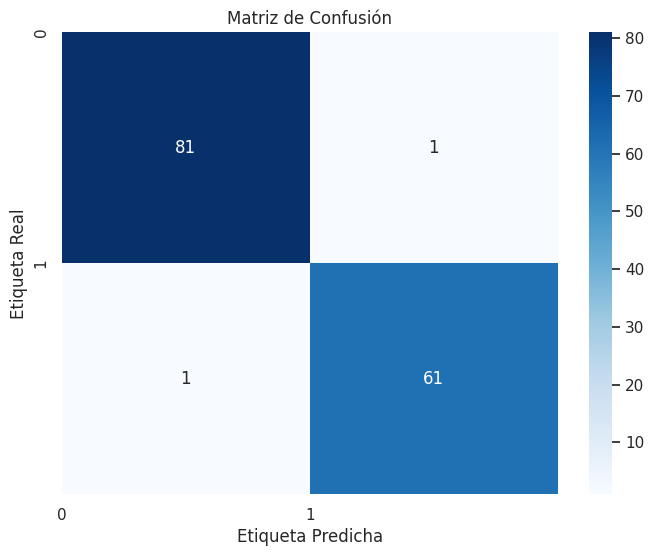

In [ ]:
# Obtener los valores únicos de la variable dependiente 
unique_values = np.unique(var_dep) 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")

# Obtener la cantidad de etiquetas únicas
num_labels = len(unique_values)

# Establecer los nombres de las etiquetas en los ejes x e y
plt.xticks(np.arange(num_labels), unique_values)
plt.yticks(np.arange(num_labels), unique_values)

plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

In [ ]:
y_pred_rf = rforest.predict(X_test) 
cm_rf= metrics.confusion_matrix(y_test, y_pred_rf) 

In [ ]:
#Encontramos los valores de exactitud, kappa, precisión, sensibilidad, especificidad y F1-score sobre los datos de prueba
print("Exactitud     : ", metrics.accuracy_score(y_test, y_pred_rf))
print("Kappa         : ", metrics.cohen_kappa_score(y_test, y_pred_rf))
print("Precisión     : ", metrics.precision_score(y_test, y_pred_rf, labels='sym_2clases', average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred_rf, labels='sym_2clases', average='macro'))
VN = cm_rf[1,1] #OJO aqui no estoy seguro de este edazo
FP = cm_rf[1,0] #OJO aqui o estoy seguro de este edazo
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred_rf, labels='symboling', average='macro'))

Exactitud     :  0.8958333333333334
Kappa         :  0.7902097902097902
Precisión     :  0.6023809523809524
Recall        :  0.5953623188405798
Especificidad :  0.96
F1-score      :  0.5964604358636829


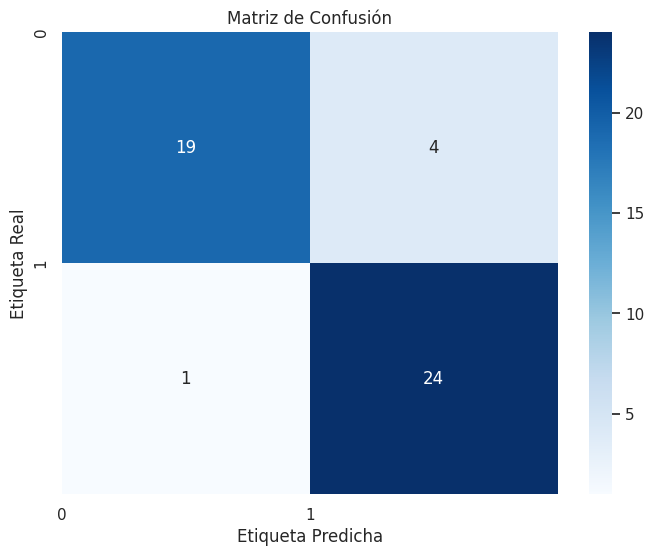

In [ ]:
# Obtener los valores únicos de la variable dependiente
unique_values = np.unique(var_dep) 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")

# Obtener la cantidad de etiquetas únicas
num_labels = len(unique_values)

# Establecer los nombres de las etiquetas en los ejes x e y
plt.xticks(np.arange(num_labels), unique_values)
plt.yticks(np.arange(num_labels), unique_values)

plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

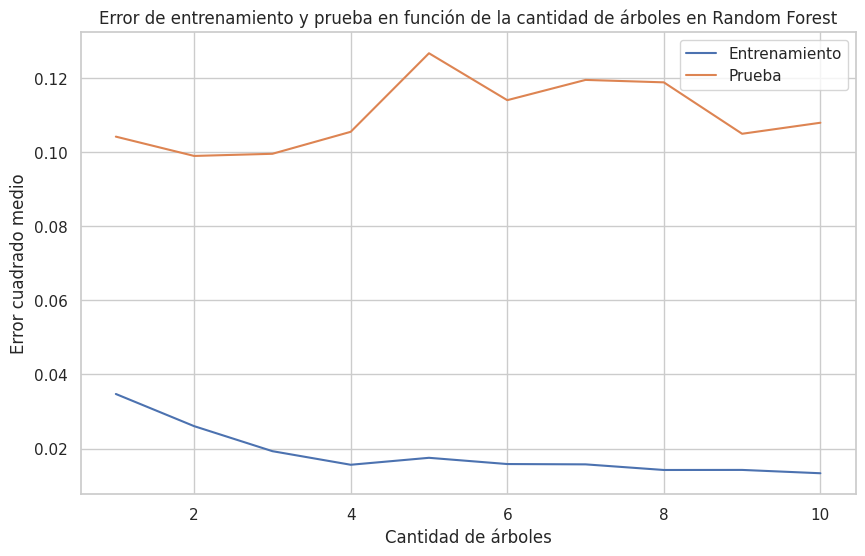

In [ ]:
# Calcular el error cuadrado medio para diferentes cantidades de árboles
train_errors = []
test_errors = []
n_estimators = range(1, 11)  # Rango de cantidades de árboles

for n in n_estimators:
    # Crear un modelo de Random Forest con la cantidad de árboles actual
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    
    # Entrenar el modelo
    rf_model.fit(X_train, y_train)
    
    # Realizar predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)
    
    # Calcular el error cuadrado medio para los conjuntos de entrenamiento y prueba
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    # Agregar los errores a las listas
    train_errors.append(train_error)
    test_errors.append(test_error)

# Graficar los errores de entrenamiento y prueba
plt.plot(n_estimators, train_errors, label='Entrenamiento')
plt.plot(n_estimators, test_errors, label='Prueba')
plt.xlabel('Cantidad de árboles')
plt.ylabel('Error cuadrado medio')
plt.title('Error de entrenamiento y prueba en función de la cantidad de árboles en Random Forest')
plt.legend()
plt.show()


#### **2.1.3. Validación del Modelo**

In [ ]:
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

scores = cross_validate(rforest, var_indep, var_dep, scoring=scoring, cv=10, return_train_score=False)

for key in scores:
    score = scores[key]
    print("%s: %0.2f" % (key, score.mean()))

fit_time: 0.25
score_time: 0.02
test_accuracy: 0.82
test_precision_weighted: 0.84
test_recall_weighted: 0.82
test_f1_weighted: 0.82


### **2.2. Bagging**

#### **2.2.1. Implementación del Modelo**

In [ ]:
base_classifier = DecisionTreeClassifier() #Seleccionamos el metodo de clasificación, en este caso árboles de decisión 

bagging_model = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42) #Generamos el modelo 
bagging_model.fit(X_train, y_train) #Entrenamos el modelo 


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

#### **2.2.2. Evaluación del Modelo**

In [ ]:
y_pred_bgg = bagging_model.predict(X_train) 
cm_bgg= metrics.confusion_matrix(y_train, y_pred_bgg)

In [ ]:
#Encontramos los valores de exactitud, kappa, precisión, sensibilidad, especificidad y F1-score sobre los datos de prueba
print("Exactitud     : ", metrics.accuracy_score(y_train, y_pred_bgg))
print("Kappa         : ", metrics.cohen_kappa_score(y_train, y_pred_bgg))
print("Precisión     : ", metrics.precision_score(y_train, y_pred_bgg, labels='sym_2clases', average='macro'))
print("Recall        : ", metrics.recall_score(y_train, y_pred_bgg, labels='sym_2clases', average='macro'))
VN = cm_bgg[1,1] #OJO aqui no estoy seguro de este edazo
FP = cm_bgg[1,0] #OJO aqui o estoy seguro de este edazo
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_train, y_pred_bgg, labels='sym_2clases', average='macro'))

Exactitud     :  0.9861111111111112
Kappa         :  0.9715639810426541
Precisión     :  0.6587301587301587
Recall        :  0.6559139784946236
Especificidad :  0.967741935483871
F1-score      :  0.6571861215353216


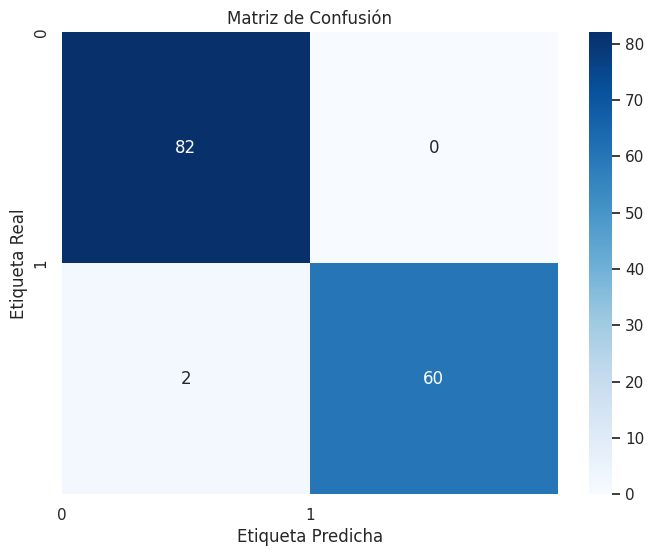

In [ ]:
# Obtener los valores únicos de la variable dependiente (depVar)
unique_values = np.unique(var_dep) 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bgg, annot=True, fmt="d", cmap="Blues")

# Obtener la cantidad de etiquetas únicas
num_labels = len(unique_values)

# Establecer los nombres de las etiquetas en los ejes x e y
plt.xticks(np.arange(num_labels), unique_values)
plt.yticks(np.arange(num_labels), unique_values)

plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

In [ ]:
y_pred_bgg = bagging_model.predict(X_test) 
cm_bgg= metrics.confusion_matrix(y_test, y_pred_bgg)

In [ ]:
#Encontramos los valores de exactitud, kappa, precisión, sensibilidad, especificidad y F1-score sobre los datos de prueba
print("Exactitud     : ", metrics.accuracy_score(y_test, y_pred_bgg))
print("Kappa         : ", metrics.cohen_kappa_score(y_test, y_pred_bgg))
print("Precisión     : ", metrics.precision_score(y_test, y_pred_bgg, labels='sym_2clases', average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred_bgg, labels='sym_2clases', average='macro'))
VN = cm_bgg[1,1] #OJO aqui no estoy seguro de este edazo
FP = cm_bgg[1,0] #OJO aqui o estoy seguro de este edazo
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred_bgg, labels='sym_2clases', average='macro'))

Exactitud     :  0.8958333333333334
Kappa         :  0.7916666666666666
Precisión     :  0.5972222222222222
Recall        :  0.5976811594202899
Especificidad :  0.88
F1-score      :  0.5971920683166884


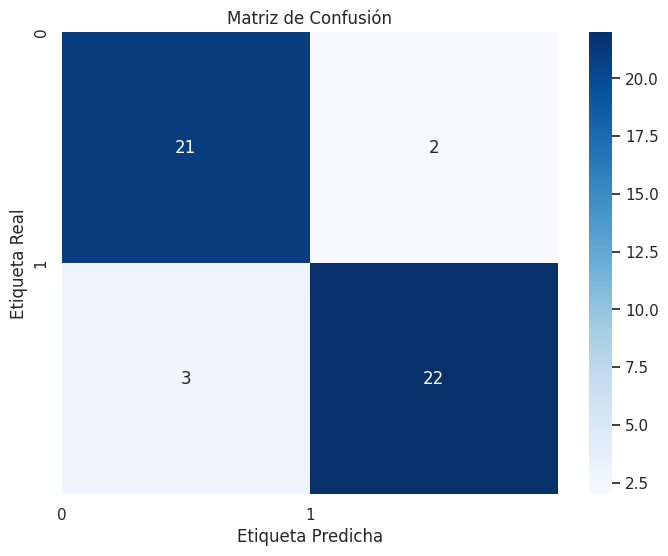

In [ ]:
# Obtener los valores únicos de la variable dependiente (depVar)
unique_values = np.unique(var_dep) 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bgg, annot=True, fmt="d", cmap="Blues")

# Obtener la cantidad de etiquetas únicas
num_labels = len(unique_values)

# Establecer los nombres de las etiquetas en los ejes x e y
plt.xticks(np.arange(num_labels), unique_values)
plt.yticks(np.arange(num_labels), unique_values)

plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

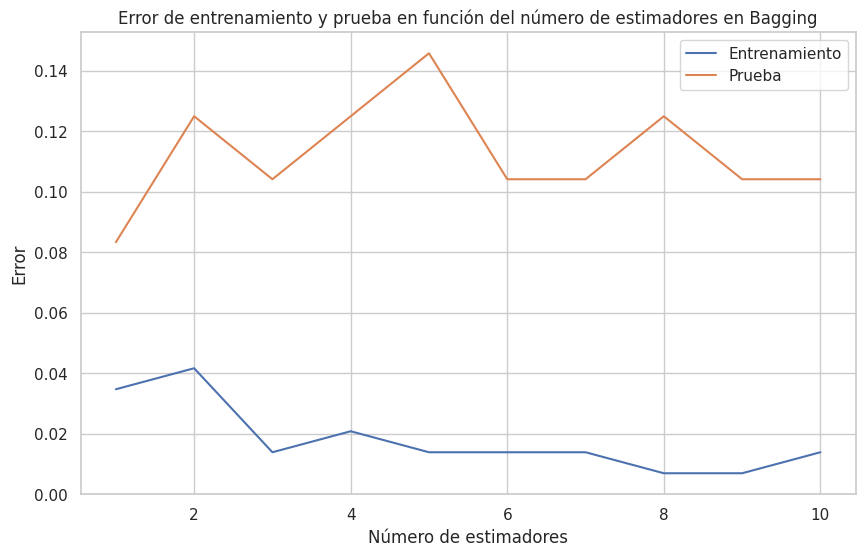

In [ ]:
# Inicializar listas para almacenar los errores de entrenamiento y prueba
train_errors = []
test_errors = []

# Calcular el error de entrenamiento y prueba para diferentes estimadores
for n_estimators in range(1, 11):
    # Establecer el número de estimadores en el modelo
    bagging_model.set_params(n_estimators=n_estimators)
    
    # Entrenar el modelo
    bagging_model.fit(X_train, y_train)
    
    # Realizar predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = bagging_model.predict(X_train)
    y_test_pred = bagging_model.predict(X_test)
    
    # Calcular el error de entrenamiento y prueba
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Agregar los errores a las listas
    train_errors.append(train_error)
    test_errors.append(test_error)

# Graficar los errores de entrenamiento y prueba
plt.plot(range(1, 11), train_errors, label='Entrenamiento')
plt.plot(range(1, 11), test_errors, label='Prueba')
plt.xlabel('Número de estimadores')
plt.ylabel('Error')
plt.title('Error de entrenamiento y prueba en función del número de estimadores en Bagging')
plt.legend()
plt.show()

#### **2.2.3. Validación del Modelo**

In [ ]:
# Crear el modelo Bagging
#bagging_model = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

# Crear el generador LOOCV
loo = LeaveOneOut()

# Realizar la validación cruzada LOOCV y obtener las predicciones
y_pred = cross_val_predict(bagging_model, var_indep, var_dep, cv=loo)

cm = confusion_matrix(var_dep, y_pred)
# Calcular las métricas
accuracy = metrics.accuracy_score(var_dep, y_pred)
kappa = metrics.cohen_kappa_score(var_dep, y_pred)
precision = metrics.precision_score(var_dep, y_pred, average='macro')
recall = metrics.recall_score(var_dep, y_pred, average='macro')
specificity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_score = metrics.f1_score(var_dep, y_pred, average='macro')

# Imprimir las métricas
print("Exactitud     : ", accuracy)
print("Kappa         : ", kappa)
print("Precisión     : ", precision)
print("Recall        : ", recall)
print("Especificidad : ", specificity)
print("F1-score      : ", f1_score)

Exactitud     :  0.9322916666666666
Kappa         :  0.8621603711066932
Precisión     :  0.9389338731443995
Recall        :  0.9272577996715927
Especificidad :  0.8735632183908046
F1-score      :  0.9309256953092571


### **2.3. Xgboost**

#### **2.3.1. Implementación del Modelo**

In [ ]:
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train) # Crear data_dmatrix utilizando los datos de entrada (X) y las etiquetas correspondientes (y).

In [ ]:
xgb_classifier = xgb.XGBClassifier() # Crear un clasificador XGBoost utilizando la clase XGBClassifier.

In [ ]:
# Declarar los parámetros para regresion logistica
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
                      
# Instanciar el clasificador 
xgb_clf = XGBClassifier(**params)

# Ajustar el clasificador a los datos de entrenamiento
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

#### **2.3.2. Evaluación del Modelo**

In [ ]:
y_pred_xgb = xgb_clf.predict(X_train) 
cm_xgb= metrics.confusion_matrix(y_train, y_pred_xgb)

In [ ]:
#Encontramos los valores de exactitud, kappa, precisión, sensibilidad, especificidad y F1-score sobre los datos de prueba
print("Exactitud     : ", metrics.accuracy_score(y_train, y_pred_xgb))
print("Kappa         : ", metrics.cohen_kappa_score(y_train, y_pred_xgb))
print("Precisión     : ", metrics.precision_score(y_train, y_pred_xgb, labels='sym_2clases', average='macro'))
print("Recall        : ", metrics.recall_score(y_train, y_pred_xgb, labels='sym_2clases', average='macro'))
VN = cm_bgg[1,1] #OJO aqui no estoy seguro de este edazo
FP = cm_bgg[1,0] #OJO aqui o estoy seguro de este edazo
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_train, y_pred_xgb, labels='sym_2clases', average='macro'))

Exactitud     :  0.9236111111111112
Kappa         :  0.8451310129057489
Precisión     :  0.6138915936384292
Recall        :  0.6167060057697351
Especificidad :  0.88
F1-score      :  0.6150209484683979


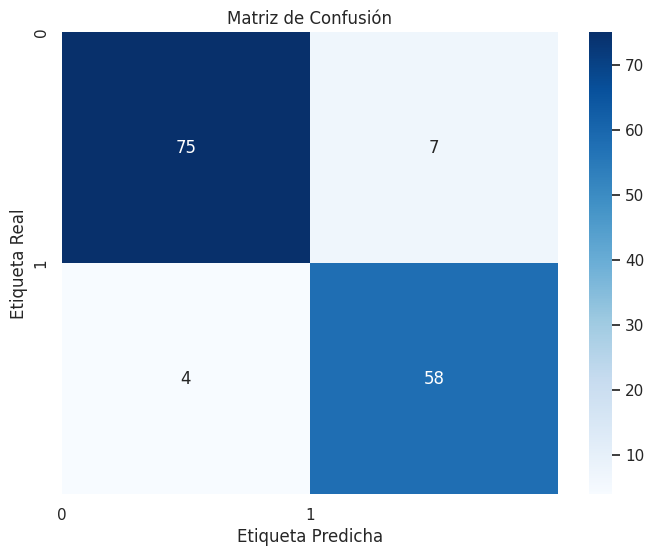

In [ ]:
# Obtener los valores únicos de la variable dependiente (depVar)
unique_values = np.unique(var_dep) 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")

# Obtener la cantidad de etiquetas únicas
num_labels = len(unique_values)

# Establecer los nombres de las etiquetas en los ejes x e y
plt.xticks(np.arange(num_labels), unique_values)
plt.yticks(np.arange(num_labels), unique_values)

plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

In [ ]:
y_pred_xgb = xgb_clf.predict(X_test) 
cm_xgb= metrics.confusion_matrix(y_test, y_pred_xgb)

In [ ]:
#Encontramos los valores de exactitud, kappa, precisión, sensibilidad, especificidad y F1-score sobre los datos de prueba
print("Exactitud     : ", metrics.accuracy_score(y_test, y_pred_xgb))
print("Kappa         : ", metrics.cohen_kappa_score(y_test, y_pred_xgb))
print("Precisión     : ", metrics.precision_score(y_test, y_pred_xgb, labels='sym_2clases', average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred_xgb, labels='sym_2clases', average='macro'))
VN = cm_bgg[1,1] #OJO aqui no estoy seguro de este edazo
FP = cm_bgg[1,0] #OJO aqui o estoy seguro de este edazo
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred_xgb, labels='sym_2clases', average='macro'))

Exactitud     :  0.8333333333333334
Kappa         :  0.6649214659685864
Precisión     :  0.5573192239858906
Recall        :  0.5542028985507247
Especificidad :  0.88
F1-score      :  0.5547785547785548


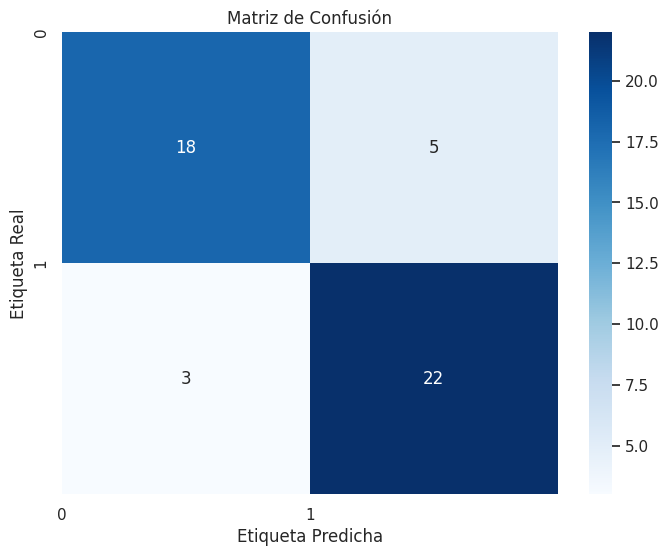

In [ ]:
# Obtener los valores únicos de la variable dependiente (depVar)
unique_values = np.unique(var_dep) 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")

# Obtener la cantidad de etiquetas únicas
num_labels = len(unique_values)

# Establecer los nombres de las etiquetas en los ejes x e y
plt.xticks(np.arange(num_labels), unique_values)
plt.yticks(np.arange(num_labels), unique_values)

plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

Error de entrenamiento: 0.07638888888888884
Error de prueba: 0.16666666666666663


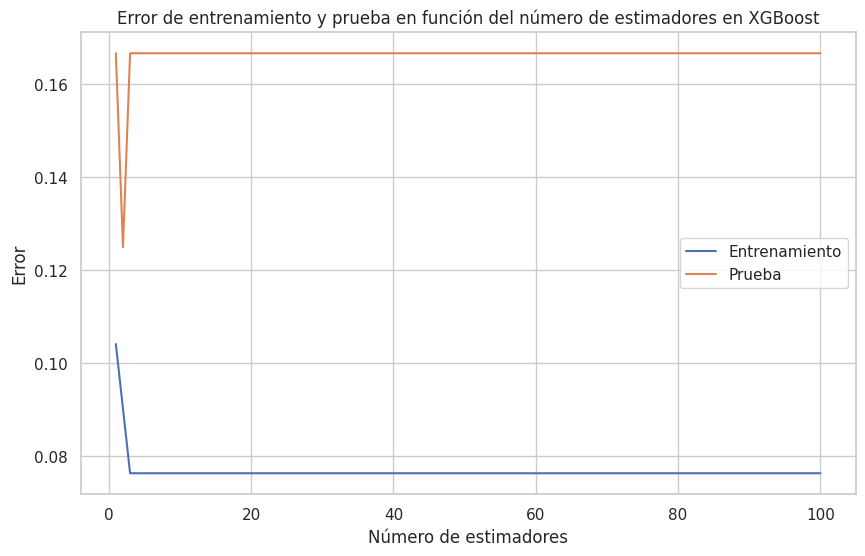

In [ ]:
# Obtener las predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

# Calcular el error de entrenamiento y prueba
train_error = 1 - accuracy_score(y_train, y_train_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)

# Imprimir los errores
print("Error de entrenamiento:", train_error)
print("Error de prueba:", test_error)

# Crear listas para almacenar los errores de entrenamiento y prueba en cada iteración
train_errors = []
test_errors = []

# Ajustar el clasificador a los datos de entrenamiento para diferentes números de estimadores
for n_estimators in range(1, 101):
    xgb_clf.set_params(n_estimators=n_estimators)
    xgb_clf.fit(X_train, y_train)
    
    # Obtener las predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = xgb_clf.predict(X_train)
    y_test_pred = xgb_clf.predict(X_test)
    
    # Calcular el error de entrenamiento y prueba
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Agregar los errores a las listas
    train_errors.append(train_error)
    test_errors.append(test_error)

# Graficar los errores de entrenamiento y prueba
plt.plot(range(1, 101), train_errors, label='Entrenamiento')
plt.plot(range(1, 101), test_errors, label='Prueba')
plt.xlabel('Número de estimadores')
plt.ylabel('Error')
plt.title('Error de entrenamiento y prueba en función del número de estimadores en XGBoost')
plt.legend()
plt.show()

#### **2.3.3. Validación del Modelo**

Predecimos con XGBoost y calculamos su exactitud.

In [ ]:
# Hacer predicciones en los datos de prueba (X_test) y las predicciones resultantes se almacenarlas en la variable y_pred.
y_pred_xgb = xgb_clf.predict(X_test)

In [ ]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_xgb))) 
# se imprime la precisión del modelo XGBoost. Se utiliza la función accuracy_score para comparar las etiquetas 
# reales (y_test) con las etiquetas predichas (y_pred) y calcular la precisión del modelo.

XGBoost model accuracy score: 0.8333


In [ ]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

# Se definen los parámetros del modelo XGBoost, incluyendo la función objetivo ("binary:logistic"),
# la fracción de características por árbol ('colsample_bytree'), la tasa de aprendizaje ('learning_rate'),
# la profundidad máxima del árbol ('max_depth') y el valor de regularización ('alpha').

###------------------------------------------------


xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3, 
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

# Se realiza una validación cruzada (cross-validation) utilizando el método cv() de XGBoost.
# Se proporciona la matriz de datos de entrenamiento (data_dmatrix) y los parámetros definidos.
# Se especifica un número de folds (nfold) de 3, el número de rondas de impulso (num_boost_round) de 50,
# el número de rondas de parada temprana (early_stopping_rounds) de 10, y la métrica de evaluación (metrics) "auc".

**nfold:** 

En el contexto de XGBoost se refiere al número de folds (divisiones) que se utilizan en la validación cruzada (cross-validation). La validación cruzada es una técnica que se utiliza para evaluar el rendimiento de un modelo de machine learning de manera más robusta y reducir el sesgo de la evaluación en un único conjunto de datos de prueba.

En la validación cruzada, los datos se dividen en k folds (subconjuntos) de aproximadamente igual tamaño. Luego, se realizan k iteraciones en las que se utiliza un fold diferente como conjunto de prueba y los restantes k-1 folds se utilizan como conjunto de entrenamiento. Esto permite evaluar el modelo k veces utilizando diferentes combinaciones de datos de entrenamiento y prueba.

El parámetro nfold especifica el número de folds que se utilizarán en la validación cruzada. Por ejemplo, si se establece nfold=5, se realizará una validación cruzada de 5 folds, donde los datos se dividirán en 5 subconjuntos y se realizarán 5 iteraciones de entrenamiento y prueba. Cuanto mayor sea el valor de nfold, mayor será la cantidad de evaluaciones realizadas y más robusta será la estimación del rendimiento del modelo.


**num_boost_round:**

Especifica el número de rondas de impulso o iteraciones que se llevarán a cabo durante el entrenamiento del modelo. Cada ronda de impulso corresponde a la construcción de un nuevo árbol en el ensamblaje de árboles de XGBoost.

En cada ronda de impulso, se agrega un nuevo árbol al modelo para mejorar la capacidad de predicción. Cada árbol se construye de manera secuencial, y en cada iteración se ajustan los pesos de los ejemplos de entrenamiento para minimizar la función de pérdida del modelo.

El parámetro num_boost_round indica la cantidad deseada de rondas de impulso a realizar durante el entrenamiento. Aumentar este valor puede permitir que el modelo aprenda patrones más complejos y mejore su rendimiento, pero también puede aumentar el riesgo de sobreajuste si se establece demasiado alto.

Es importante ajustar adecuadamente el valor de num_boost_round según el conjunto de datos y el problema específico que se está abordando. Puede requerir un ajuste fino mediante la validación cruzada para determinar el número óptimo de rondas de impulso para obtener un equilibrio entre el rendimiento y la capacidad de generalización del modelo.

**early_stopping_rounds:**

Permite realizar la detención temprana durante el entrenamiento del modelo si no se observa una mejora en la métrica de evaluación deseada.

Durante el entrenamiento de XGBoost, se evalúa periódicamente el rendimiento del modelo en un conjunto de datos de validación. El parámetro early_stopping_rounds especifica el número de rondas consecutivas en las que no se observa una mejora en la métrica de evaluación antes de detener el entrenamiento.

Si después de un número determinado de rondas consecutivas no se produce una mejora en la métrica de evaluación, el entrenamiento se detiene y se devuelve el modelo con el mejor rendimiento hasta ese punto.

Esta técnica es útil para evitar el sobreajuste y reducir el tiempo de entrenamiento. Al detener el entrenamiento cuando no se observa una mejora, se evita el gasto de recursos computacionales en rondas adicionales que no contribuyen significativamente a la mejora del modelo.

Es importante ajustar adecuadamente el valor de early_stopping_rounds, ya que un valor demasiado bajo puede hacer que el entrenamiento se detenga prematuramente, mientras que un valor demasiado alto puede prolongar el entrenamiento innecesariamente. Por lo general, se elige un valor que permita un margen razonable para la mejora y la variabilidad de la métrica de evaluación.

In [ ]:
xgb_cv.head()

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.820631       0.039478       0.773100      0.030049
1        0.924700       0.015017       0.810406      0.026451
2        0.948512       0.020812       0.885880      0.026856
3        0.958879       0.018702       0.905050      0.025623
4        0.957093       0.013649       0.906235      0.024787

In [ ]:
#  imprime el último valor de la métrica AUC promedio obtenida en la validación cruzada del modelo XGBoost
print((xgb_cv["test-auc-mean"]).tail(1)) 

9    0.928534
Name: test-auc-mean, dtype: float64


Se puede observar que que su AUC para la predicción del nivel de riesgo ha mejorado en comparación a el anteiror (0.80) y ahora resultó ser de alrededor de 0.93.

Importancia de las variables independientes

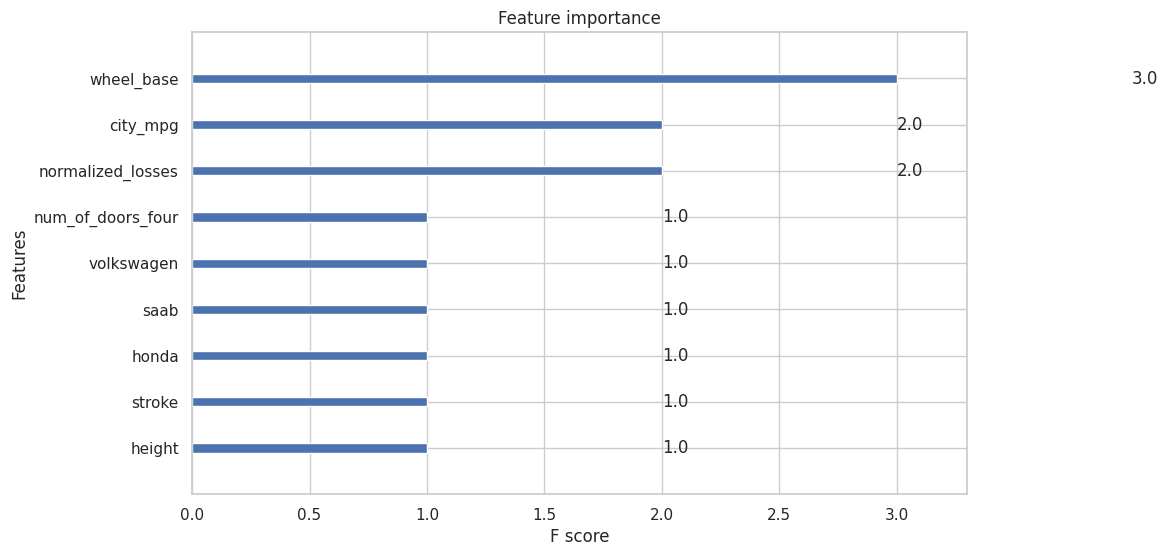

In [ ]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

### **2.4. Conclusión General de los modelos**

A modo de conclusión parcial, es importante considerar los desempeños de los tres modelos para determinar cuál es el mejor y el peor entre los tres (Random Forest, Bagging y XGBoost). Si bien, lo tres modelos tienen un muy buen desempeño, se pueden considerar los diferentes criterios de evaluación para hacer las respectivas comparaciones. A continuación, analizaré cada métrica para determinar cuál es el mejor y el peor modelo en función de cada una:

**Exactitud:** El mejor modelo es el Random Forest y el Bagging, ya que ambos tienen la misma exactitud de 0.8958, que es la más alta entre los tres modelos. El XGBoost tiene una exactitud ligeramente inferior de 0.8333.

**Kappa:** El mejor modelo es el Bagging, con un valor de kappa de 0.7917, seguido por el Random Forest con un valor de 0.7902. El XGBoost tiene el valor más bajo de kappa, con 0.6649.

**Precisión:** El mejor modelo es el Bagging, con una precisión de 0.5972, seguido por el Random Forest con una precisión de 0.6024. El XGBoost tiene la precisión más baja, con 0.5573.

**Recall:** El mejor modelo es el Bagging, con un recall de 0.5977, seguido por el Random Forest con un recall de 0.5954. El XGBoost tiene el recall más bajo, con 0.5542.

**Especificidad:** El mejor modelo es el Random Forest, con una especificidad de 0.96, seguido por el XGBoost y el Bagging, que tienen la misma especificidad de 0.88.

**F1-score:** El mejor modelo es el Bagging, con un F1-score de 0.5972, seguido por el Random Forest con un F1-score de 0.5965. El XGBoost tiene el F1-score más bajo, con 0.5548.

En resumen, el mejor modelo en términos generales es el **Bagging**, ya que tiene buen desempeño en varias métricas, como kappa, precisión, recall y F1-score. El peor modelo es el XGBoost, ya que tiene los valores más bajos en la mayoría de las métricas evaluadas. Sin embargo, es importante tener en cuenta que la elección del mejor modelo puede cambiar con base en el contexto específico del problema, necesidades del negocio y las preferencias del usuario.

## **3. Reducción de dimensionalidad**

Dada la gran dimensionalidad presente en el dataset, que no se corresponde con la cantidad de registros presentes, un análisis de componentes principales (PCA), podría ser útil en reducir la dimensionalidad, mientras se conserva la mayor cantidad posible de información. 

In [ ]:
dataDepurado = df_new.copy()
dataDepurado = dataDepurado[['sym_2clases', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
                            'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
                            'highway_mpg', 'price']] # No vamos a incluir ninguna variable categórica transformada en el análisis posterior
dataDepurado.head()                 

sym_2clases  normalized_losses  wheel_base  length  width  height  \
0            0              115.0        88.6   168.8   64.1    48.8   
1            0              115.0        94.5   171.2   65.5    52.4   
2            0              164.0        99.8   176.6   66.2    54.3   
3            0              164.0        99.4   176.6   66.4    54.3   
4            0              115.0        99.8   177.3   66.3    53.1   

   curb_weight  engine_size  bore  stroke  compression_ratio  horsepower  \
0       2548.0        130.0  3.47    2.68                9.0       111.0   
1       2823.0        152.0  2.68    3.47                9.0       154.0   
2       2337.0        109.0  3.19    3.40               10.0       102.0   
3       2824.0        136.0  3.19    3.40                8.0       115.0   
4       2507.0        136.0  3.19    3.40                8.5       110.0   

   peak_rpm  city_mpg  highway_mpg    price  
0    5000.0      21.0         27.0  16500.0  
1    5000.0      19.0         26.0  16500.0  
2    5500.0      24.0         30.0  13950.0  
3    5500.0      18.0         22.0  17450.0  
4    5500.0      19.0         25.0  15250.0

In [ ]:
dataDepurado.shape

(192, 16)

In [ ]:
# Obtener los datos sin la primera columna
data = dataDepurado.iloc[:, 1:]

# Realizar la estandarización de los datos
scaler = StandardScaler()
dataStd = scaler.fit_transform(data)

# Crear un DataFrame a partir del array estandarizado
dataStd = pd.DataFrame(dataStd, columns=data.columns)

# Asignar los nombres de las columnas
dataStd.columns = data.columns

In [ ]:
dataStd.mean(axis=0)

normalized_losses   -1.387779e-16
wheel_base           9.251859e-16
length               5.736152e-16
width               -8.604228e-16
height              -1.258253e-15
curb_weight         -2.960595e-16
engine_size          1.526557e-16
bore                -7.031412e-16
stroke              -7.216450e-16
compression_ratio   -1.295260e-16
horsepower          -1.295260e-16
peak_rpm             6.291264e-16
city_mpg             2.081668e-16
highway_mpg          1.850372e-16
price               -1.445603e-17
dtype: float64

In [ ]:
dataStd.std(axis=0)

normalized_losses    1.002614
wheel_base           1.002614
length               1.002614
width                1.002614
height               1.002614
curb_weight          1.002614
engine_size          1.002614
bore                 1.002614
stroke               1.002614
compression_ratio    1.002614
horsepower           1.002614
peak_rpm             1.002614
city_mpg             1.002614
highway_mpg          1.002614
price                1.002614
dtype: float64

La importancia del análisis de componentes principales radica en varias ventajas que ofrece:

**Reducción de la dimensionalidad:** El PCA permite reducir la dimensionalidad de un conjunto de datos con muchas variables a un número menor de componentes principales. Esto es útil cuando se trabaja con conjuntos de datos de alta dimensionalidad, ya que reduce la complejidad computacional y puede mejorar el rendimiento de los algoritmos de aprendizaje automático.

**Eliminación de variables redundantes:** El PCA identifica las relaciones lineales entre las variables y agrupa la información en los componentes principales. Al eliminar las variables redundantes, se puede simplificar la interpretación de los datos y evitar problemas como la multicolinealidad.

**Identificación de patrones y estructuras ocultas:** El PCA revela las estructuras subyacentes en los datos al encontrar las combinaciones lineales de variables que explican la mayor variabilidad en los datos. Esto permite identificar patrones, tendencias o relaciones ocultas que no serían evidentes en la visualización de las variables originales.

In [ ]:
pca = PCA()
pca.fit(dataStd.iloc[:, :])

PCA()

Una vez ajustado el objeto PCA a un dataset, este permite acceder a diferentes aspectos resultantes de la transformación

In [ ]:
pca.components_

array([[ 3.49155812e-02,  2.84272790e-01,  3.32675736e-01,
         3.26691662e-01,  1.37254313e-01,  3.58090123e-01,
         3.20435093e-01,  2.58133816e-01,  4.11386306e-02,
         3.69058410e-02,  2.93407399e-01, -7.10960685e-02,
        -3.04484480e-01, -3.15971032e-01,  3.12161535e-01],
       [-2.95171503e-01,  2.84564105e-01,  1.52802083e-01,
         1.00702460e-01,  4.05502753e-01,  5.47576025e-02,
        -5.16188709e-02,  3.42878523e-02,  3.19172258e-02,
         4.50886550e-01, -3.01376972e-01, -4.38228809e-01,
         2.85736007e-01,  2.30058737e-01, -7.33110044e-02],
       [-3.81528621e-01,  5.12390869e-02,  5.72465019e-02,
        -1.02902305e-01,  3.51585915e-01, -5.84133465e-02,
        -1.74878788e-01,  1.89282976e-01, -6.60379194e-01,
        -4.05295808e-01, -4.34253248e-02,  7.14252498e-02,
        -1.21653945e-01, -1.27697458e-01, -7.77816838e-02],
       [-1.22288352e-01, -3.12361355e-01, -2.01924396e-01,
        -1.98704138e-01, -3.59812330e-01,  2.70715748

In [ ]:
pca.explained_variance_

array([7.29061759, 2.57804725, 1.32320107, 0.8877267 , 0.86963655,
       0.61990866, 0.41183109, 0.32737594, 0.27175161, 0.13477184,
       0.11202419, 0.09624228, 0.0842397 , 0.05162125, 0.01953832])

In [ ]:
var_exp=pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
var_exp

array([0.48350971, 0.17097466, 0.08775396, 0.05887354, 0.05767381,
       0.041112  , 0.02731241, 0.02171139, 0.01802242, 0.00893799,
       0.00742938, 0.00638273, 0.00558673, 0.00342349, 0.00129577])

In [ ]:
dataPca = pca.transform(dataStd.iloc[:, :])

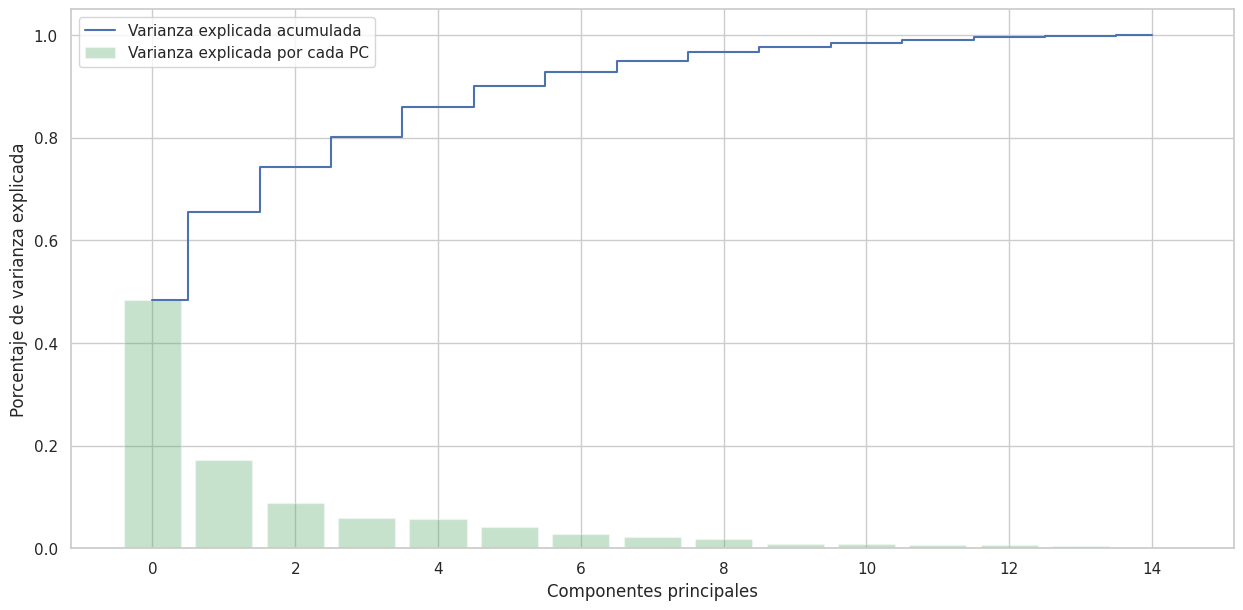

In [ ]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [ ]:
np.sum(pca.explained_variance_ratio_[0:4])

0.8011118708657421

Se encontró que los primeros 4 componentes conservan el 80% de la información original, y los primeros 5 el 85.9%. Se conservarán solo con los 5 primeros PCs.

In [ ]:
dataPca = dataPca[:,0:4]

In [ ]:
dataPca[0:4]

array([[-0.37491099, -2.00888556,  0.8012751 ,  2.51624532],
       [ 0.70095418, -1.51382472, -1.10793457, -0.23840806],
       [ 0.04192979, -0.70919325, -0.69569773, -1.29304782],
       [ 1.6256078 , -1.64872667, -0.48893905, -1.1683443 ]])

In [ ]:
def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:,index1]
    ys = data[:,index2]
    n=loadings.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,index1], loadings[i,index2],color='r',alpha=0.5)
        if labels is None:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(index1))
    plt.ylabel("PC{}".format(index2))
    plt.grid() 

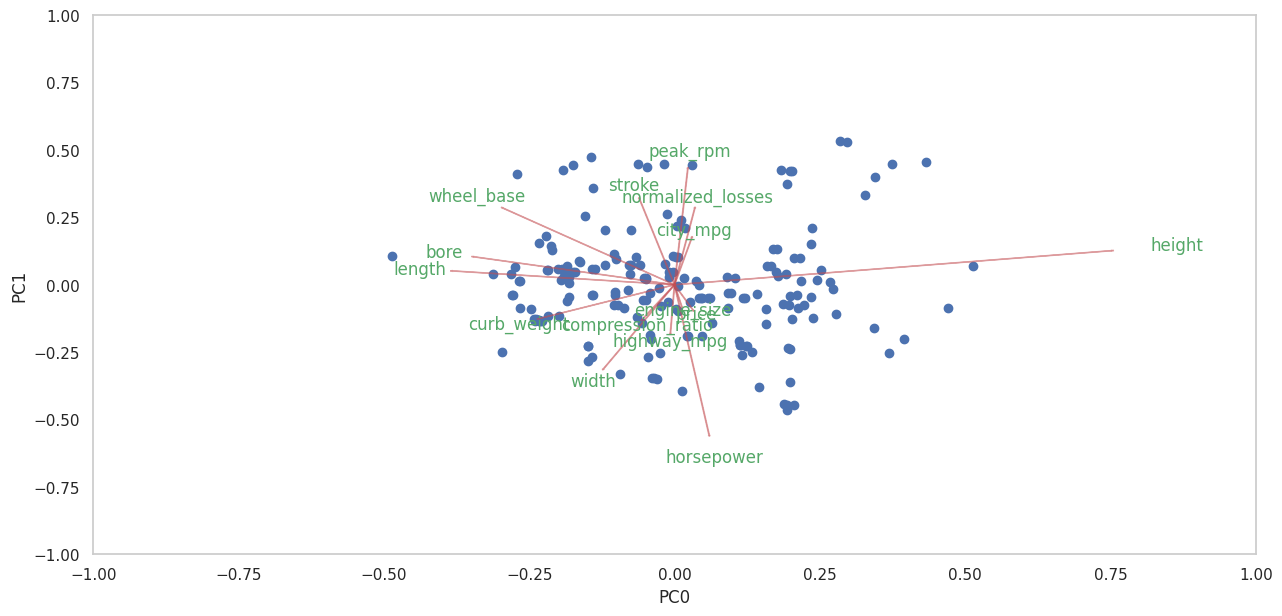

In [ ]:
biplot(dataPca, pca.components_, 0, 1, dataStd.columns)

El primer componente principal (PC0) muestra una correlación positiva significativa con la variable "height", mientras que se correlaciona negativamente con la variable "length". En cuanto al segundo componente principal (PC1), se observa una correlación positiva con "peak_rpm" y una correlación negativa con "horsepower".

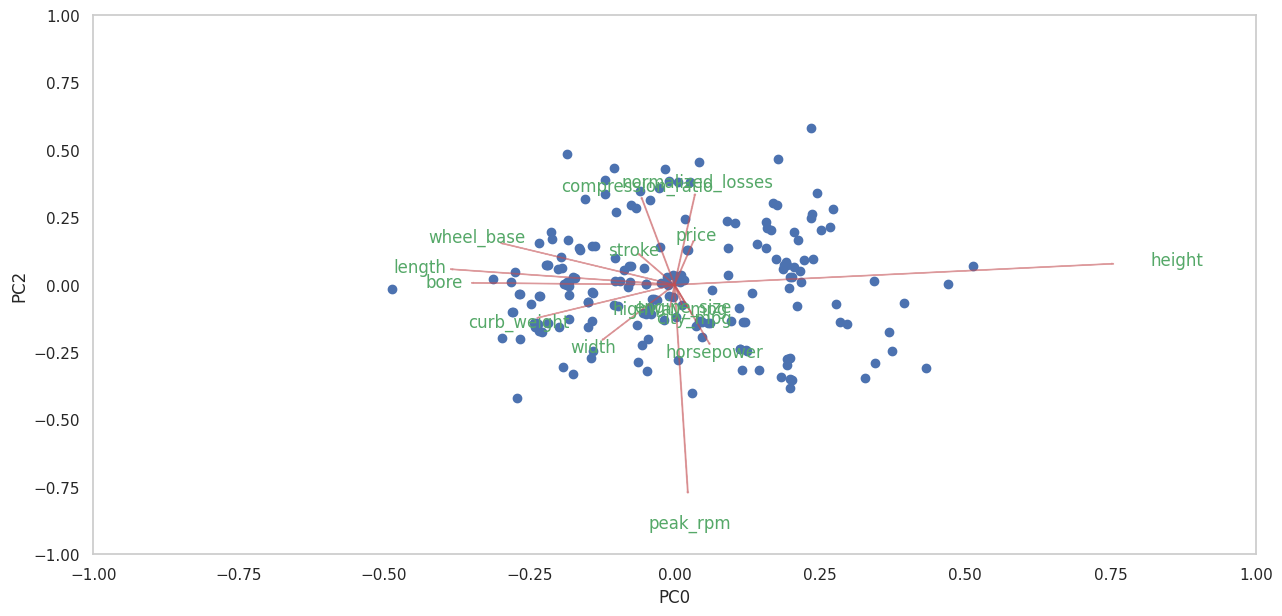

In [ ]:
biplot(dataPca, pca.components_, 0, 2, dataStd.columns)

Para el PC0, se mantienen las mismas relaciones mencionadas anteriormente. Sin embargo, en el tercer componente principal (PC2), se observa una correlación negativa con "peak_rpm" y una correlación positiva con "normalized_losses".

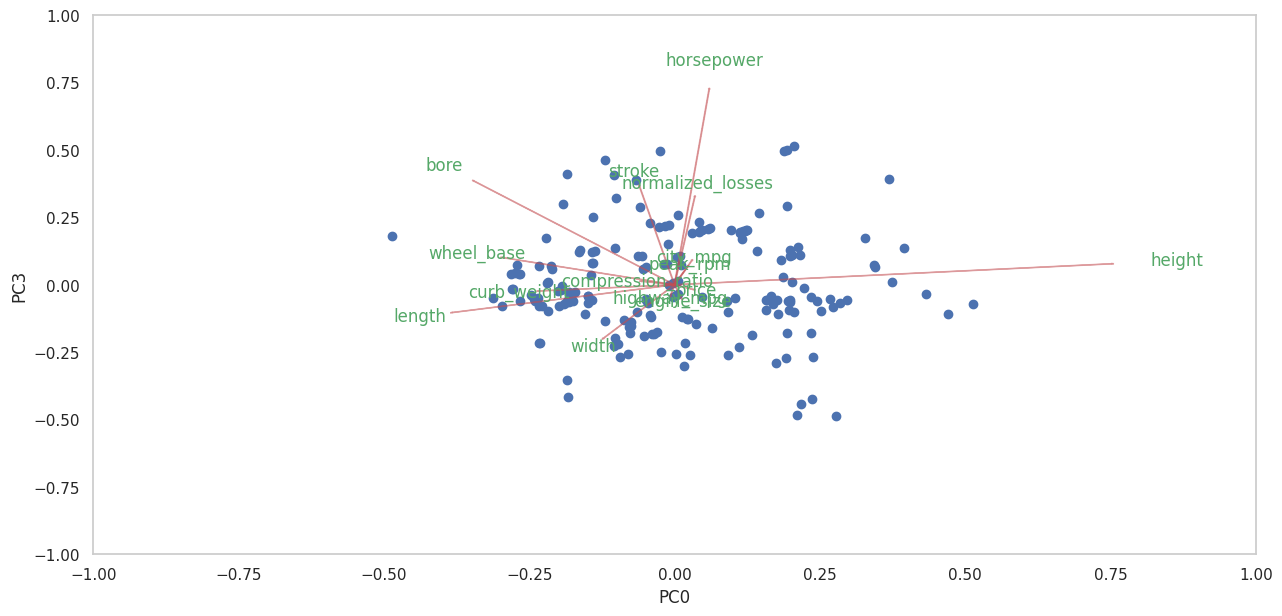

In [ ]:
biplot(dataPca, pca.components_, 0, 3, dataStd.columns)

En cuanto al PC3, se destaca un impacto positivo significativo del atributo "horsepower".

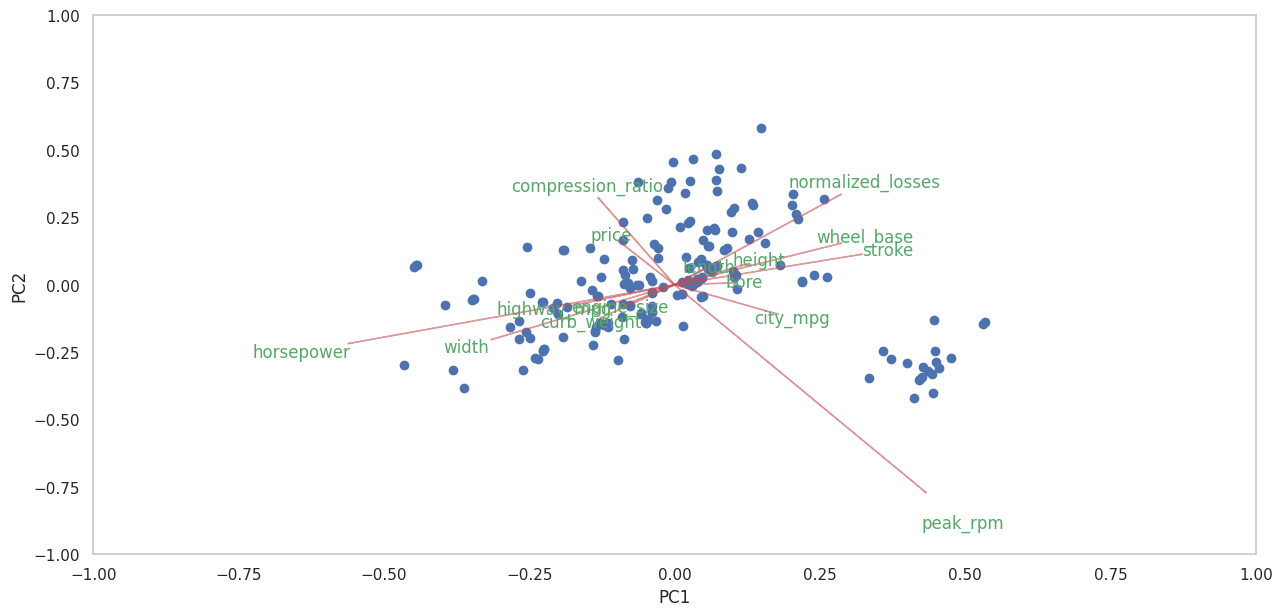

In [ ]:
biplot(dataPca, pca.components_, 1, 2, dataStd.columns)

Se confirma que "peak_rpm" está positivamente relacionado con el PC1, pero también se encuentra una correlación negativa con el PC2. Además, "horsepower" está presente como una correlación negativa en el PC1.

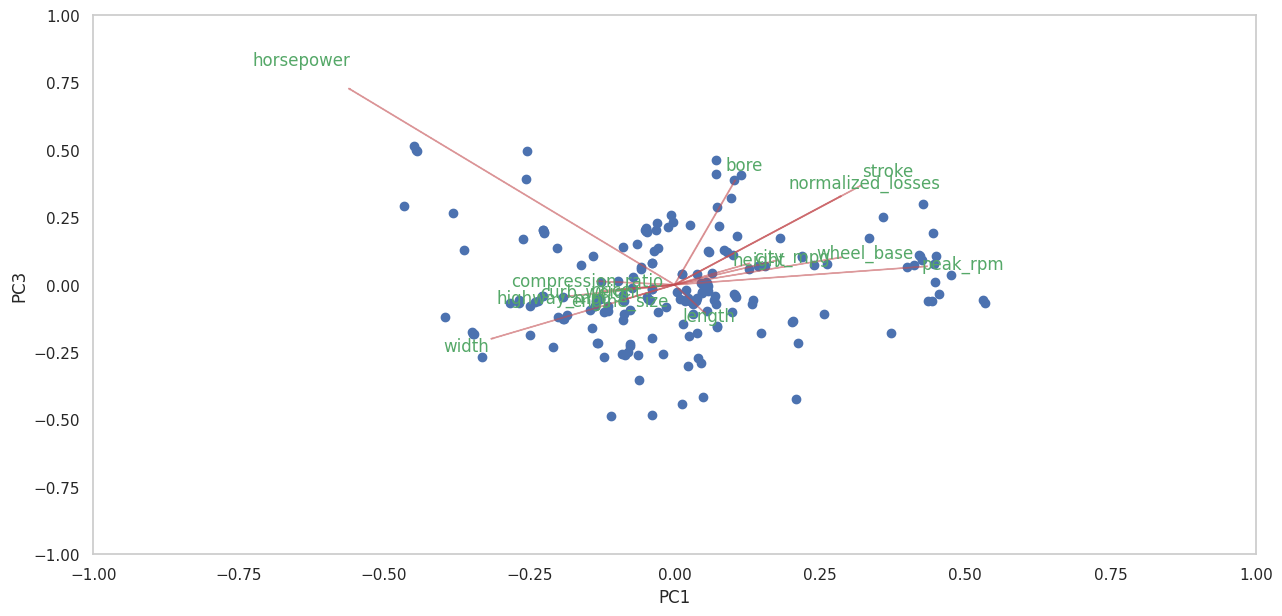

In [ ]:
biplot(dataPca, pca.components_, 1, 3, dataStd.columns)

Nuevamente, se confirma que "peak_rpm" está positivamente relacionado con el PC1, pero en el PC3 se encuentra una correlación positiva con el atributo "horsepower".

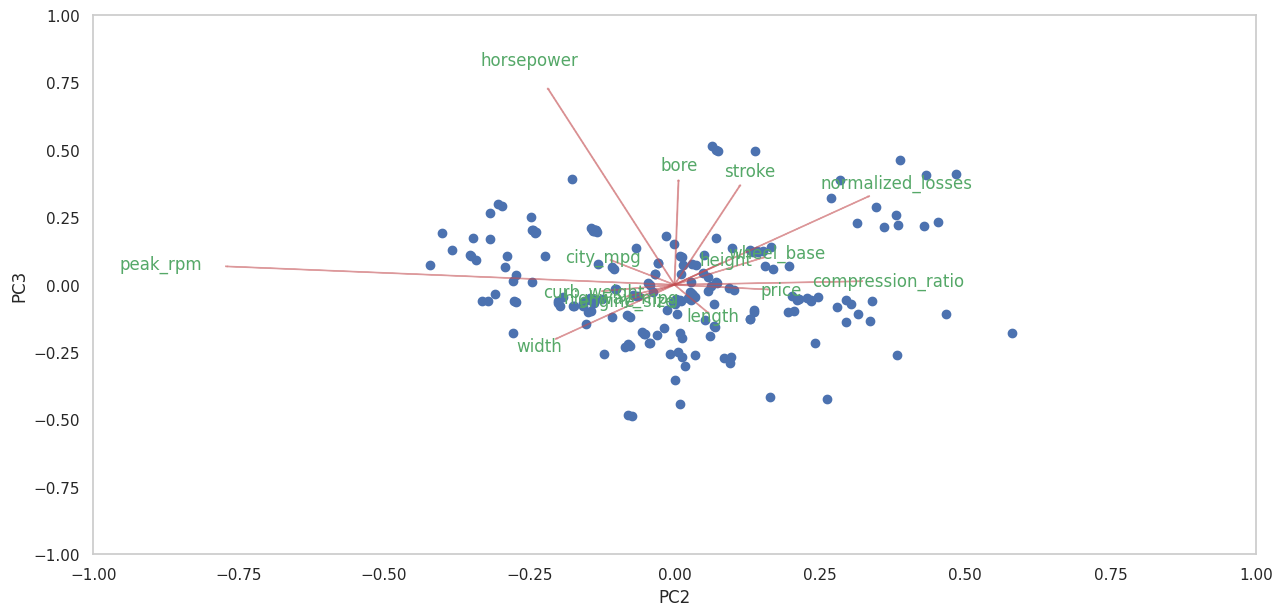

In [ ]:
biplot(dataPca, pca.components_, 2, 3, dataStd.columns)

Asimismo, se confirma que "peak_rpm" está negativamente relacionado con el PC2, y se observa una correlación positiva entre "compression_ratio" y el PC2. Por otro lado, "horsepower" muestra una correlación positiva con el PC3.

**Conclusión**

El Análisis de Componentes Principales (PCA) se aplicó en este estudio para reducir la dimensionalidad de un conjunto de datos compuesto por múltiples atributos correlacionados. Mediante la identificación de los componentes principales que explican la mayor varianza de los datos, se logró seleccionar un subconjunto de 4 componentes (PC0, PC1, PC2, PC3) que representan un poco más del 80% de la varianza total.

De estos componentes, se concluyó que los atributos más relevantes, según el PCA, son 'height', 'length', 'peak_rpm', 'normalized_losses', 'horsepower' y 'compression_ratio'. Estos atributos se consideran cruciales para futuros análisis de datos, ya que se espera que contengan información significativa y valiosa.

Al enfocar la atención en estos atributos clave, se espera aprovechar mejor los datos y obtener una comprensión más precisa y profunda del problema en cuestión. El uso de PCA proporciona una base sólida para la selección de atributos relevantes y la reducción de la complejidad del conjunto de datos, lo que facilita el análisis y la interpretación de los resultados.

En conclusión, mediante la aplicación de PCA, se ha logrado identificar y priorizar los atributos más influyentes, lo que permitirá un enfoque más efectivo en futuros ejercicios de análisis de datos. Esto garantiza una utilización óptima de los recursos y una mayor capacidad para extraer conocimientos valiosos a partir de los datos disponibles.

## **4. Caracterización de los autos**

Con los datos en su nueva representación, realizar una segmentación, estableciendo el mejor número de conglomerados entre 3 y 5. Caracterizar los conglomerados con respecto a las variables originales.

El algoritmo de clustering K-means es una técnica ampliamente utilizada en el análisis de clientes de un negocio debido a su importancia en varias áreas clave:

**Segmentación de clientes:** El K-means es una herramienta fundamental para segmentar clientes en grupos homogéneos basados en características similares. Esto permite comprender mejor el comportamiento, las necesidades y las preferencias de diferentes segmentos de clientes. La segmentación de clientes ayuda a adaptar estrategias de marketing, servicios personalizados y toma de decisiones centradas en cada grupo, lo que puede mejorar la satisfacción del cliente y la rentabilidad del negocio.

**Identificación de perfiles de clientes:** El K-means ayuda a identificar perfiles de clientes distintos dentro de una base de datos. Al agrupar a los clientes en diferentes clusters, se pueden identificar características comunes, como edad, género, patrones de compra, ubicación geográfica, etc. Estos perfiles de clientes proporcionan información valiosa para diseñar campañas de marketing más efectivas y personalizadas, desarrollar productos o servicios adaptados a las necesidades de cada segmento, y tomar decisiones informadas sobre precios y estrategias de ventas.

### **4.1. Implementación K-means**

In [ ]:
dataPca = pd.DataFrame(dataPca)
dataPca.columns=['PC0', 'PC1', 'PC2', 'PC3']

In [ ]:
#kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(dataPca)
clusters = kmeans.labels_

In [ ]:
dataPca['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({0: 117, 1: 75})


In [ ]:
var_num = dataPca.columns
var_num

Index(['PC0', 'PC1', 'PC2', 'PC3', 'Cluster'], dtype='object')

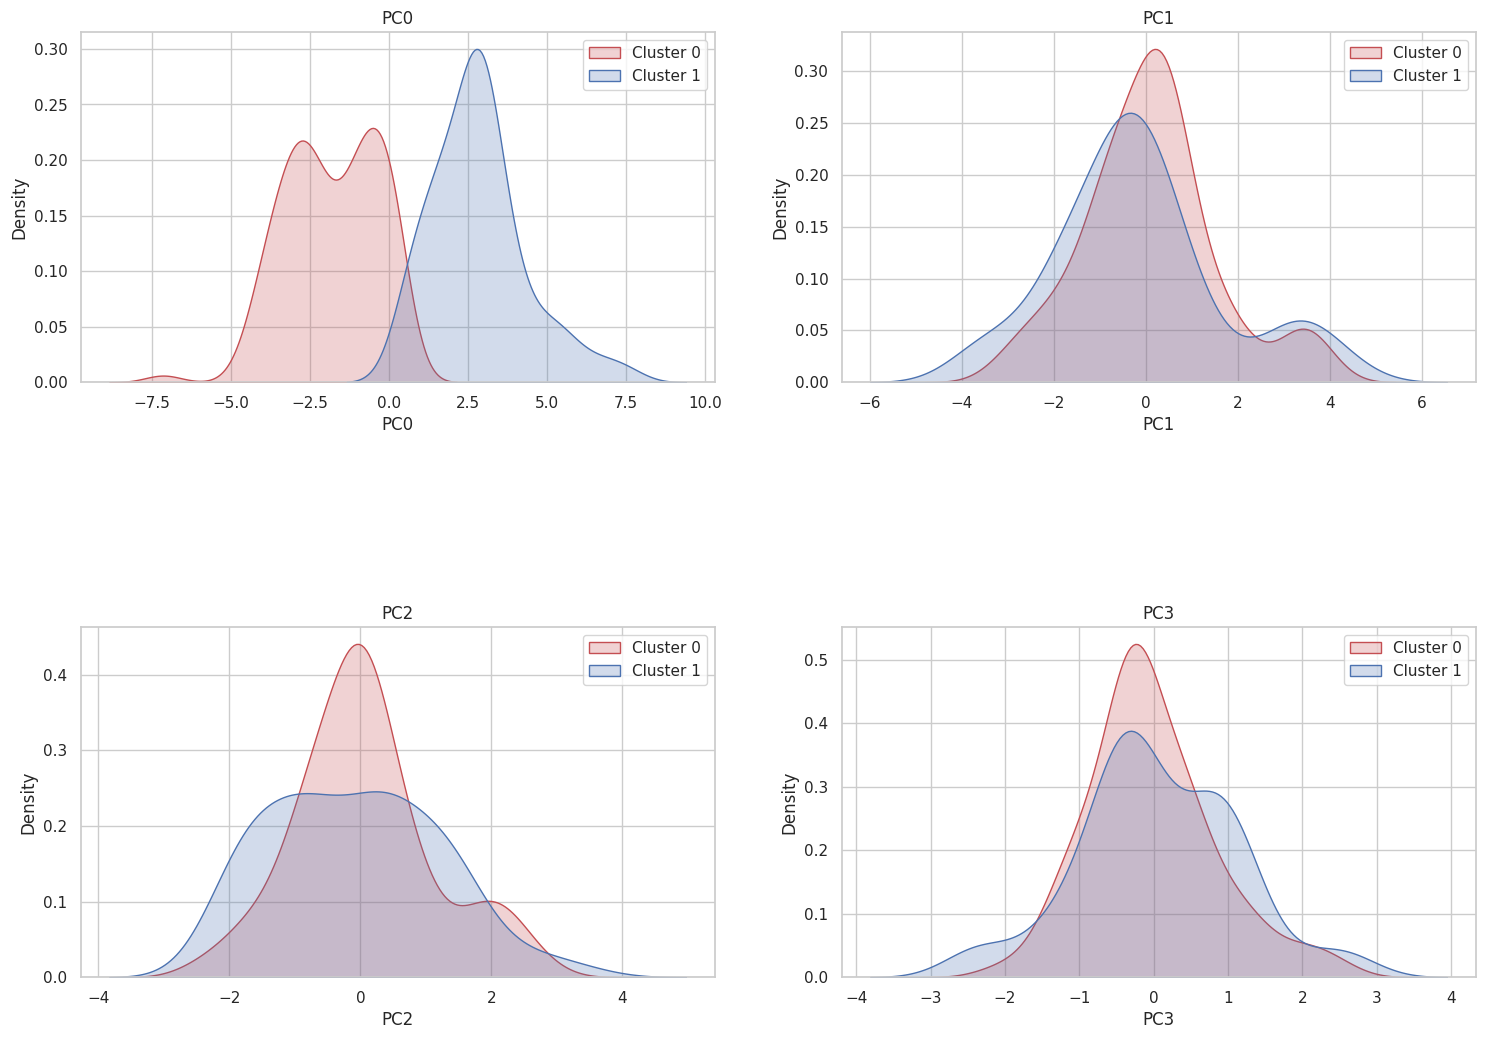

In [ ]:
fig = plt.figure(figsize=(18,20))
i=1
for var in dataPca.columns[0:4]:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataPca.loc[dataPca.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==1][var], shade=True, color='b', ax=ax);
    #sns.kdeplot(dataPca.loc[dataPca.Cluster==2][var], shade=True, color='g', ax=ax); #quitar coment cuando K=3
    plt.title(var)
    #plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    plt.legend(['Cluster 0', 'Cluster 1'])
    plt.subplots_adjust(hspace=0.7)  # Añadí un espacio vertical entre los gráficos
    i+=1



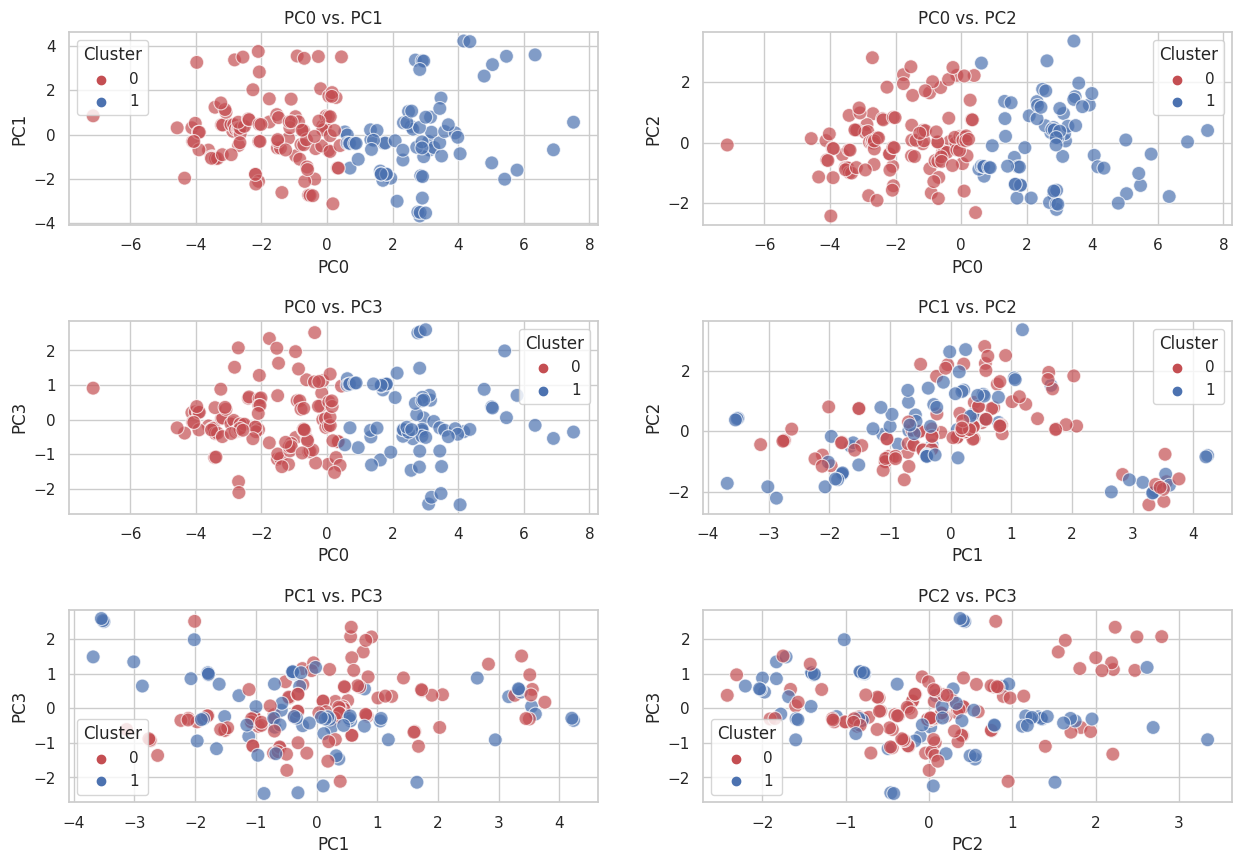

In [ ]:
fig = plt.figure(figsize=(15,10))
#colorPalette = ["r", "b", "g"] #para k=3
colorPalette = ["r", "b"]

ax = fig.add_subplot(3, 2, 1)
sns.scatterplot(x="PC0", y="PC1", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("PC0 vs. PC1")

ax = fig.add_subplot(3, 2, 2)
sns.scatterplot(x="PC0", y="PC2", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("PC0 vs. PC2")

ax = fig.add_subplot(3, 2, 3)
sns.scatterplot(x="PC0", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("PC0 vs. PC3")

ax = fig.add_subplot(3, 2, 4)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("PC1 vs. PC2")

ax = fig.add_subplot(3, 2, 5)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("PC1 vs. PC3")

ax = fig.add_subplot(3, 2, 6)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("PC2 vs. PC3")

plt.subplots_adjust(hspace=0.5)  # Añadí un espacio vertical entre los gráficos

plt.show()

En esta implementación de K-Means, se ajustó el modelo con 2 clústeres utilizando 10 ejecuciones con centroides diferentes. El resultado revela que las mejores representaciones para agrupar los puntos son las combinaciones de PC0 Vs PC1, PC0 Vs PC2 y PC0 Vs PC3. Estas combinaciones permiten una rápida visualización de las diferencias entre cada clúster. En los gráficos restantes, los puntos se superponen y no hay una clara agrupación ni distribución evidente.

### **4.2. Metodos para selección del K**

#### **Codo**

En el atributo *inertia_* queda el valor de la suma de las distancias cuadráticas entre cada punto y el centro del cluster al que pertenece (el **WSS** - Within Sum of Squares, también llamado más genéricamente **SSE** - Sum of Squared Errors)

In [ ]:
kmeans.inertia_

1322.0509845726042

In [ ]:
kmeans.init

'k-means++'

A partir de los valores de WSS se puede crear el plot a partir del cual se aplica la técnica del codo, creando un clustering para diferentes valores de K. Veamos, según el método del codo, cual sería el valor del K en este conjunto de datos:

In [ ]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dataStd)
    WSSs.append(km.inertia_)
WSSs

[2879.999999999999,
 1892.560766157258,
 1639.0921109416886,
 1454.1752934880492,
 1292.7456543674848,
 1170.9920534572202,
 1086.1194728673772,
 983.8233029760142,
 888.3776901484108,
 852.5348024590221,
 808.2157234268818,
 767.924522663978,
 711.617423713751,
 685.0150383275045]

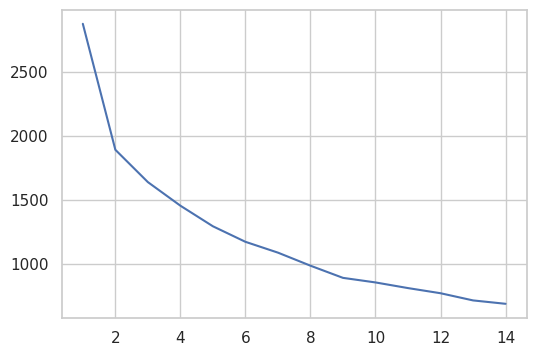

In [ ]:
plt.plot(range(1, 15), WSSs)

Con K=2 encontramos aproximadamente el codo. 

#### **Silueta**

Con el método de silueta revisamos cuántos clusters deberíamos tener para k = 2, 3, 4 y 5.

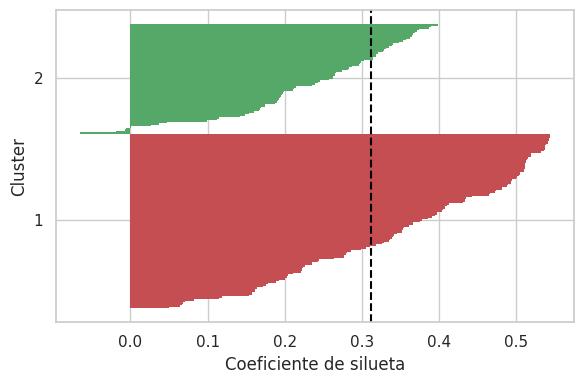

In [ ]:
k=2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
plt.show()

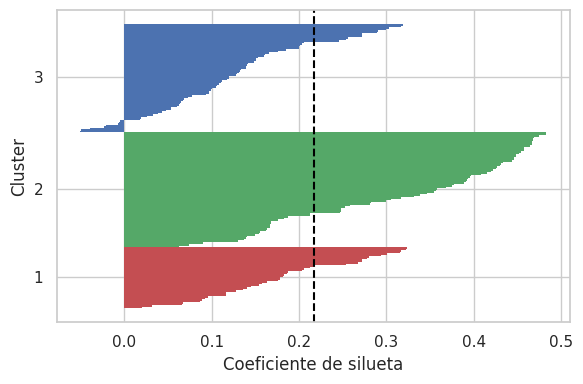

In [ ]:
k=3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
plt.show()

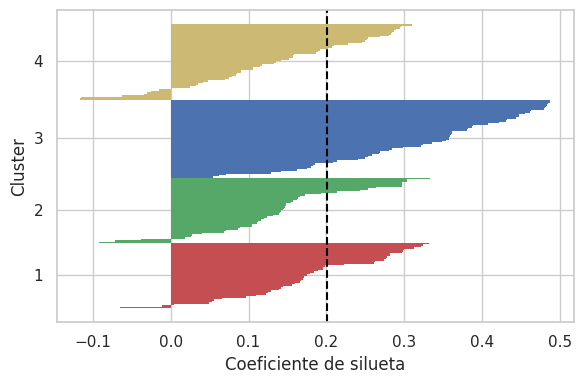

In [ ]:
k=4
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
plt.show()

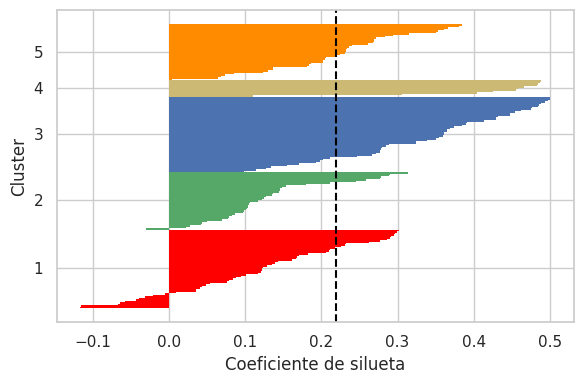

In [ ]:
k=5
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['red', 'g', 'b', 'y', 'darkorange']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
plt.show()

#### **Calinski-Harabaz**

Estimamos la métrica de Calinski-Harabasz

In [ ]:
CHs = []
for i in range(2,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dataStd)
    CH = calinski_harabasz_score(dataStd, km.labels_) 
    CHs.append(CH)
    
CHs

[99.13206370174298,
 71.54313948142855,
 61.44491796017205,
 57.40041779109802,
 54.29165417791967,
 50.92562801330949,
 50.66190111825099,
 51.28264795826224,
 48.09170447263474,
 46.39763162113976,
 45.006031274773314,
 45.45285011076501,
 43.87408712746981]

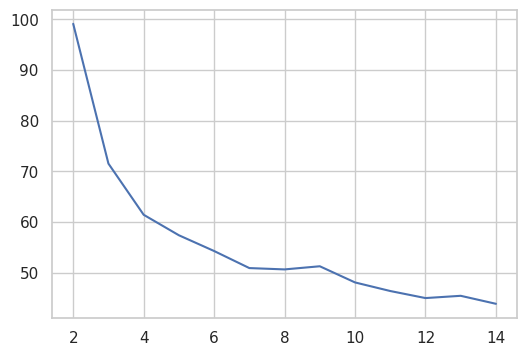

In [ ]:
plt.plot(range(2, 15), CHs)

Escogencia de **K**

* En el método del **codo**, seleccionamos el punto en el que se produce una reducción significativa en el WSS (Within Sum of Squares) del resultado del agrupamiento, es decir, donde se observa claramente en la gráfica del codo el punto en el que el WSS disminuye más. En este caso, ese punto se encuentra en **K=2.**

* En el método de la **silueta**, el objetivo es encontrar el valor de K que maximice la separación entre los clusters y los haga lo más compactos posible. Gráficamente, buscamos que la línea horizontal punteada pase a través de cada una de las tres siluetas y que maximice su promedio (coeficiente de silueta) en ese punto. Además, se busca obtener el resultado con la menor cantidad posible de valores negativos. En este caso, el valor óptimo es **K=2.**

* En el método de **Calinski-Harabaz**, al igual que en la técnica de la silueta, el objetivo es maximizar la separación entre los clusters. Gráficamente, aparentemente es el método más "sencillo" para seleccionar el valor de K, ya que se debe elegir el punto máximo en la línea. En este caso, el valor óptimo es **K=2**.

En conclusión y de acuerdo al desarrollo de los tres métodos, el K óptimo para el módelo debe ser igual a dos

### **4.3. Implementación K-means segun atributos destacados en PCA (Dataset Inicial)**

In [ ]:
dataDepurado = df_new.copy()
dataDepurado = dataDepurado[['sym_2clases', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
                            'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
                            'highway_mpg', 'price']] # No vamos a incluir ninguna variable categórica transformada en el análisis posterior
dataDepurado.head(5)   

sym_2clases  normalized_losses  wheel_base  length  width  height  \
0            0              115.0        88.6   168.8   64.1    48.8   
1            0              115.0        94.5   171.2   65.5    52.4   
2            0              164.0        99.8   176.6   66.2    54.3   
3            0              164.0        99.4   176.6   66.4    54.3   
4            0              115.0        99.8   177.3   66.3    53.1   

   curb_weight  engine_size  bore  stroke  compression_ratio  horsepower  \
0       2548.0        130.0  3.47    2.68                9.0       111.0   
1       2823.0        152.0  2.68    3.47                9.0       154.0   
2       2337.0        109.0  3.19    3.40               10.0       102.0   
3       2824.0        136.0  3.19    3.40                8.0       115.0   
4       2507.0        136.0  3.19    3.40                8.5       110.0   

   peak_rpm  city_mpg  highway_mpg    price  
0    5000.0      21.0         27.0  16500.0  
1    5000.0      19.0         26.0  16500.0  
2    5500.0      24.0         30.0  13950.0  
3    5500.0      18.0         22.0  17450.0  
4    5500.0      19.0         25.0  15250.0

In [ ]:
# Obtener los datos sin la primera columna
data = dataDepurado.iloc[:, 1:]

# Realizar la estandarización de los datos
scaler = StandardScaler()
dataStd = scaler.fit_transform(data)

# Crear un DataFrame a partir del array estandarizado
dataStd = pd.DataFrame(dataStd, columns=data.columns)

# Asignar los nombres de las columnas
dataStd.columns = data.columns

In [ ]:
dataStd.mean(axis=0)

normalized_losses   -1.387779e-16
wheel_base           9.251859e-16
length               5.736152e-16
width               -8.604228e-16
height              -1.258253e-15
curb_weight         -2.960595e-16
engine_size          1.526557e-16
bore                -7.031412e-16
stroke              -7.216450e-16
compression_ratio   -1.295260e-16
horsepower          -1.295260e-16
peak_rpm             6.291264e-16
city_mpg             2.081668e-16
highway_mpg          1.850372e-16
price               -1.445603e-17
dtype: float64

In [ ]:
dataStd.std(axis=0)

normalized_losses    1.002614
wheel_base           1.002614
length               1.002614
width                1.002614
height               1.002614
curb_weight          1.002614
engine_size          1.002614
bore                 1.002614
stroke               1.002614
compression_ratio    1.002614
horsepower           1.002614
peak_rpm             1.002614
city_mpg             1.002614
highway_mpg          1.002614
price                1.002614
dtype: float64

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
#kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(dataStd)
clusters = kmeans.labels_

In [ ]:
dataStd['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({1: 78, 2: 73, 0: 41})


In [ ]:
var_num = dataStd.columns

In [ ]:
var_num

Index(['normalized_losses', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'Cluster'],
      dtype='object')

**Elección del K:**

Aunque los métodos heurísticos sugieren que K=2 es una opción adecuada y está en concordancia con el K obtenido en el análisis de componentes principales (PCA), se ha tomado la decisión de ajustar el número de conglomerados para esta ocasión. Dado que las instrucciones del taller indican explorar una segmentación con un número óptimo de conglomerados entre 3 y 5, se ha establecido un valor de K=3 para este análisis específico, despues revisar que este K=3 también puede ser una buena opción. A continuación, se procederá a revisar los resultados obtenidos con esta configuración, teniendo en cuenta los atributos según la representación de los datos obtenida a través del PCA."

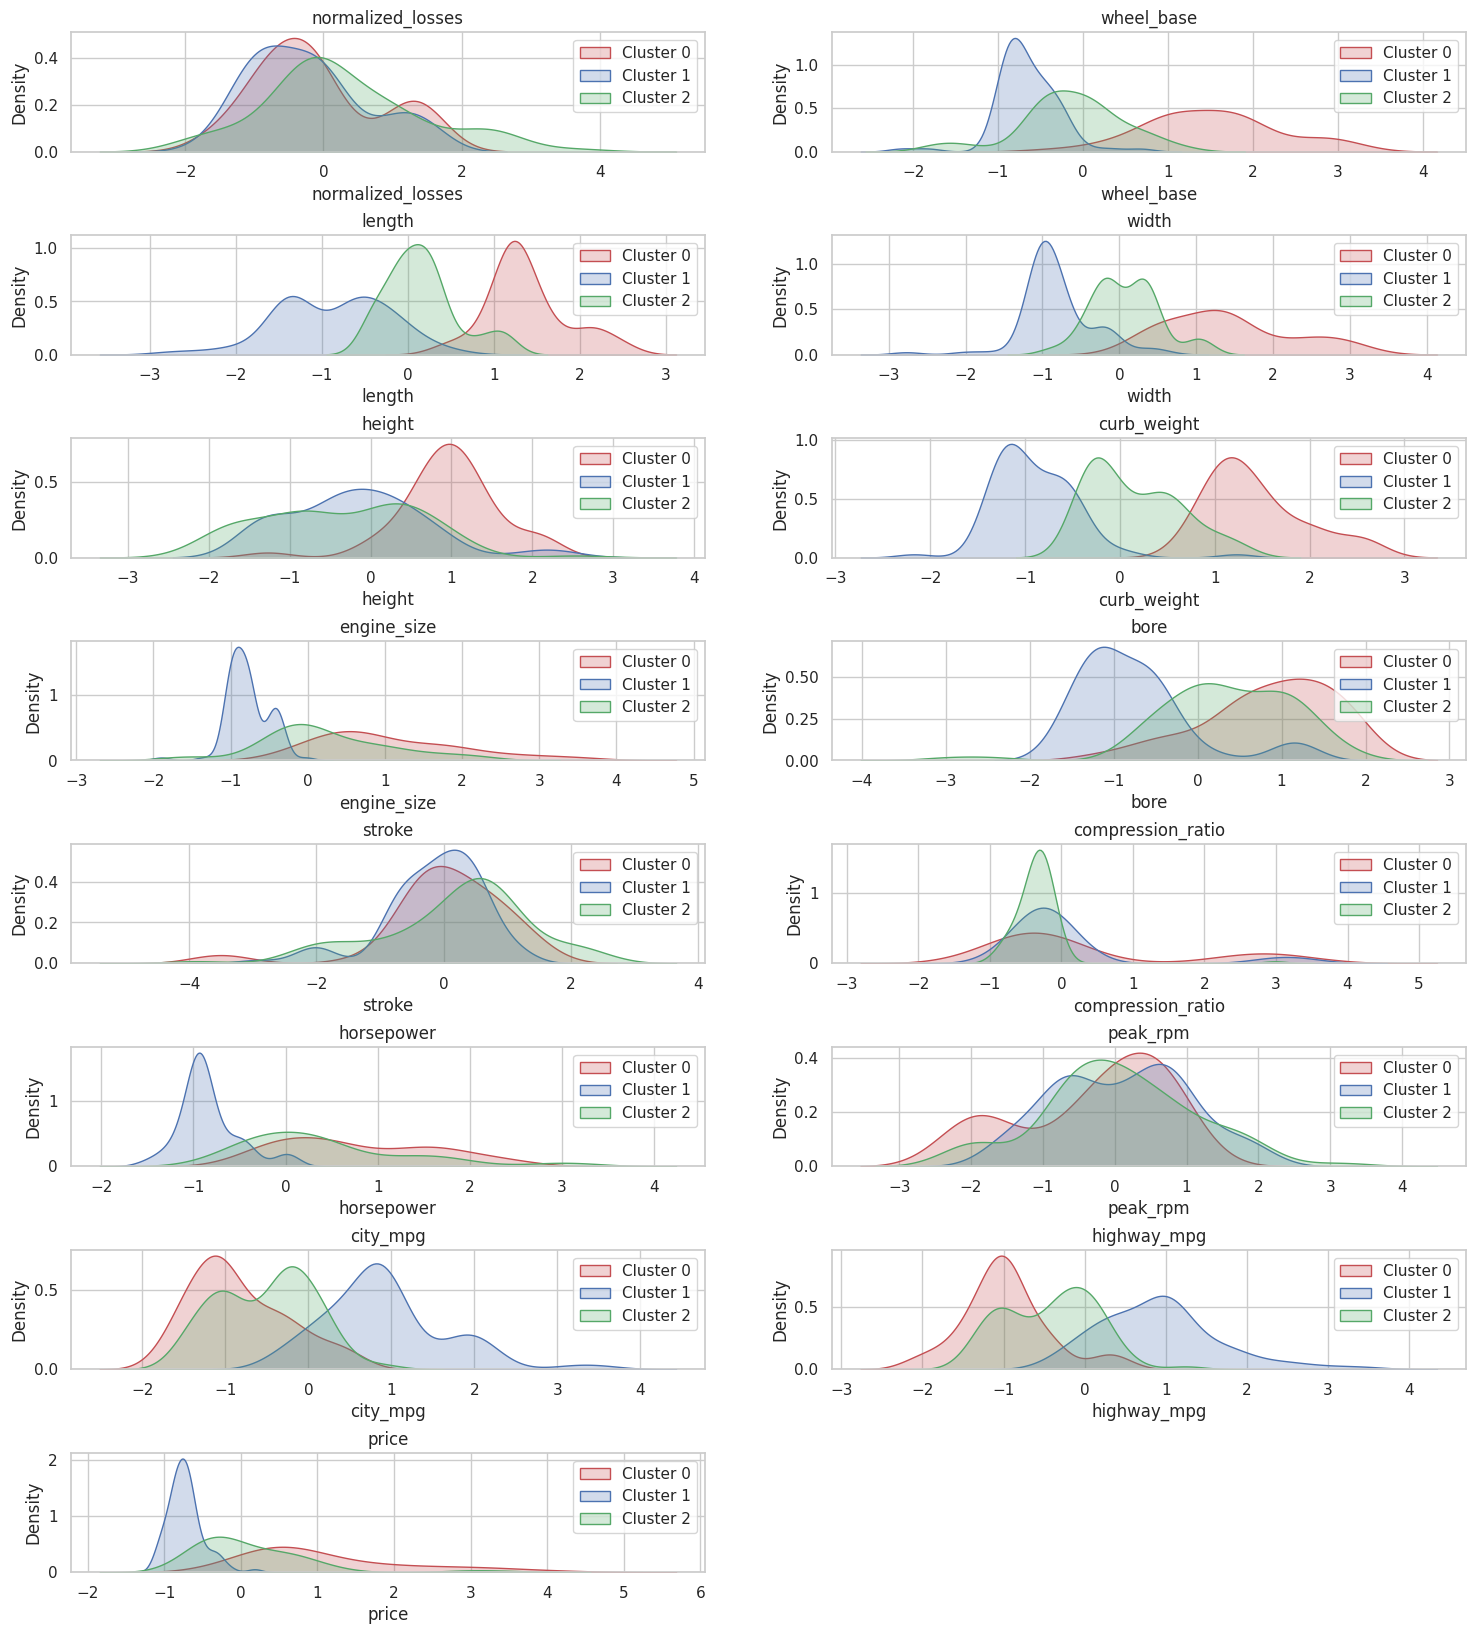

In [ ]:
fig = plt.figure(figsize=(18,20))
i=1
for var in dataStd.columns[0:15]:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='b', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==2][var], shade=True, color='g', ax=ax); #quitar coment cuando K=3
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    #plt.legend(['Cluster 0', 'Cluster 1'])
    plt.subplots_adjust(hspace=0.7)  # Añadí un espacio vertical entre los gráficos
    i+=1

Considerando que segun PCA los atributos que mas parecen explicar las varianza son 'height', 'length', 'peak_rpm', 'normalized_losses', 'horsepower' y 'compression_ratio', procedemos a generar todas las posibles combinaciones para curzalas entre sí:

*   height vs length
*   height vs peak_rpm
*   height vs horsepower
*   height vs normalized_losses
*   height vs compression_ratio
*   length vs peak_rpm
*   length vs horsepower
*   length vs normalized_losses
*   length vs compression_ratio
*   peak_rpm vs horsepower
*   peak_rpm vs normalized_losses
*   peak_rpm vs compression_ratio
*   horsepower vs normalized_losses
*   horsepower vs compression_ratio
*   normalized_losses vs compression_ratio

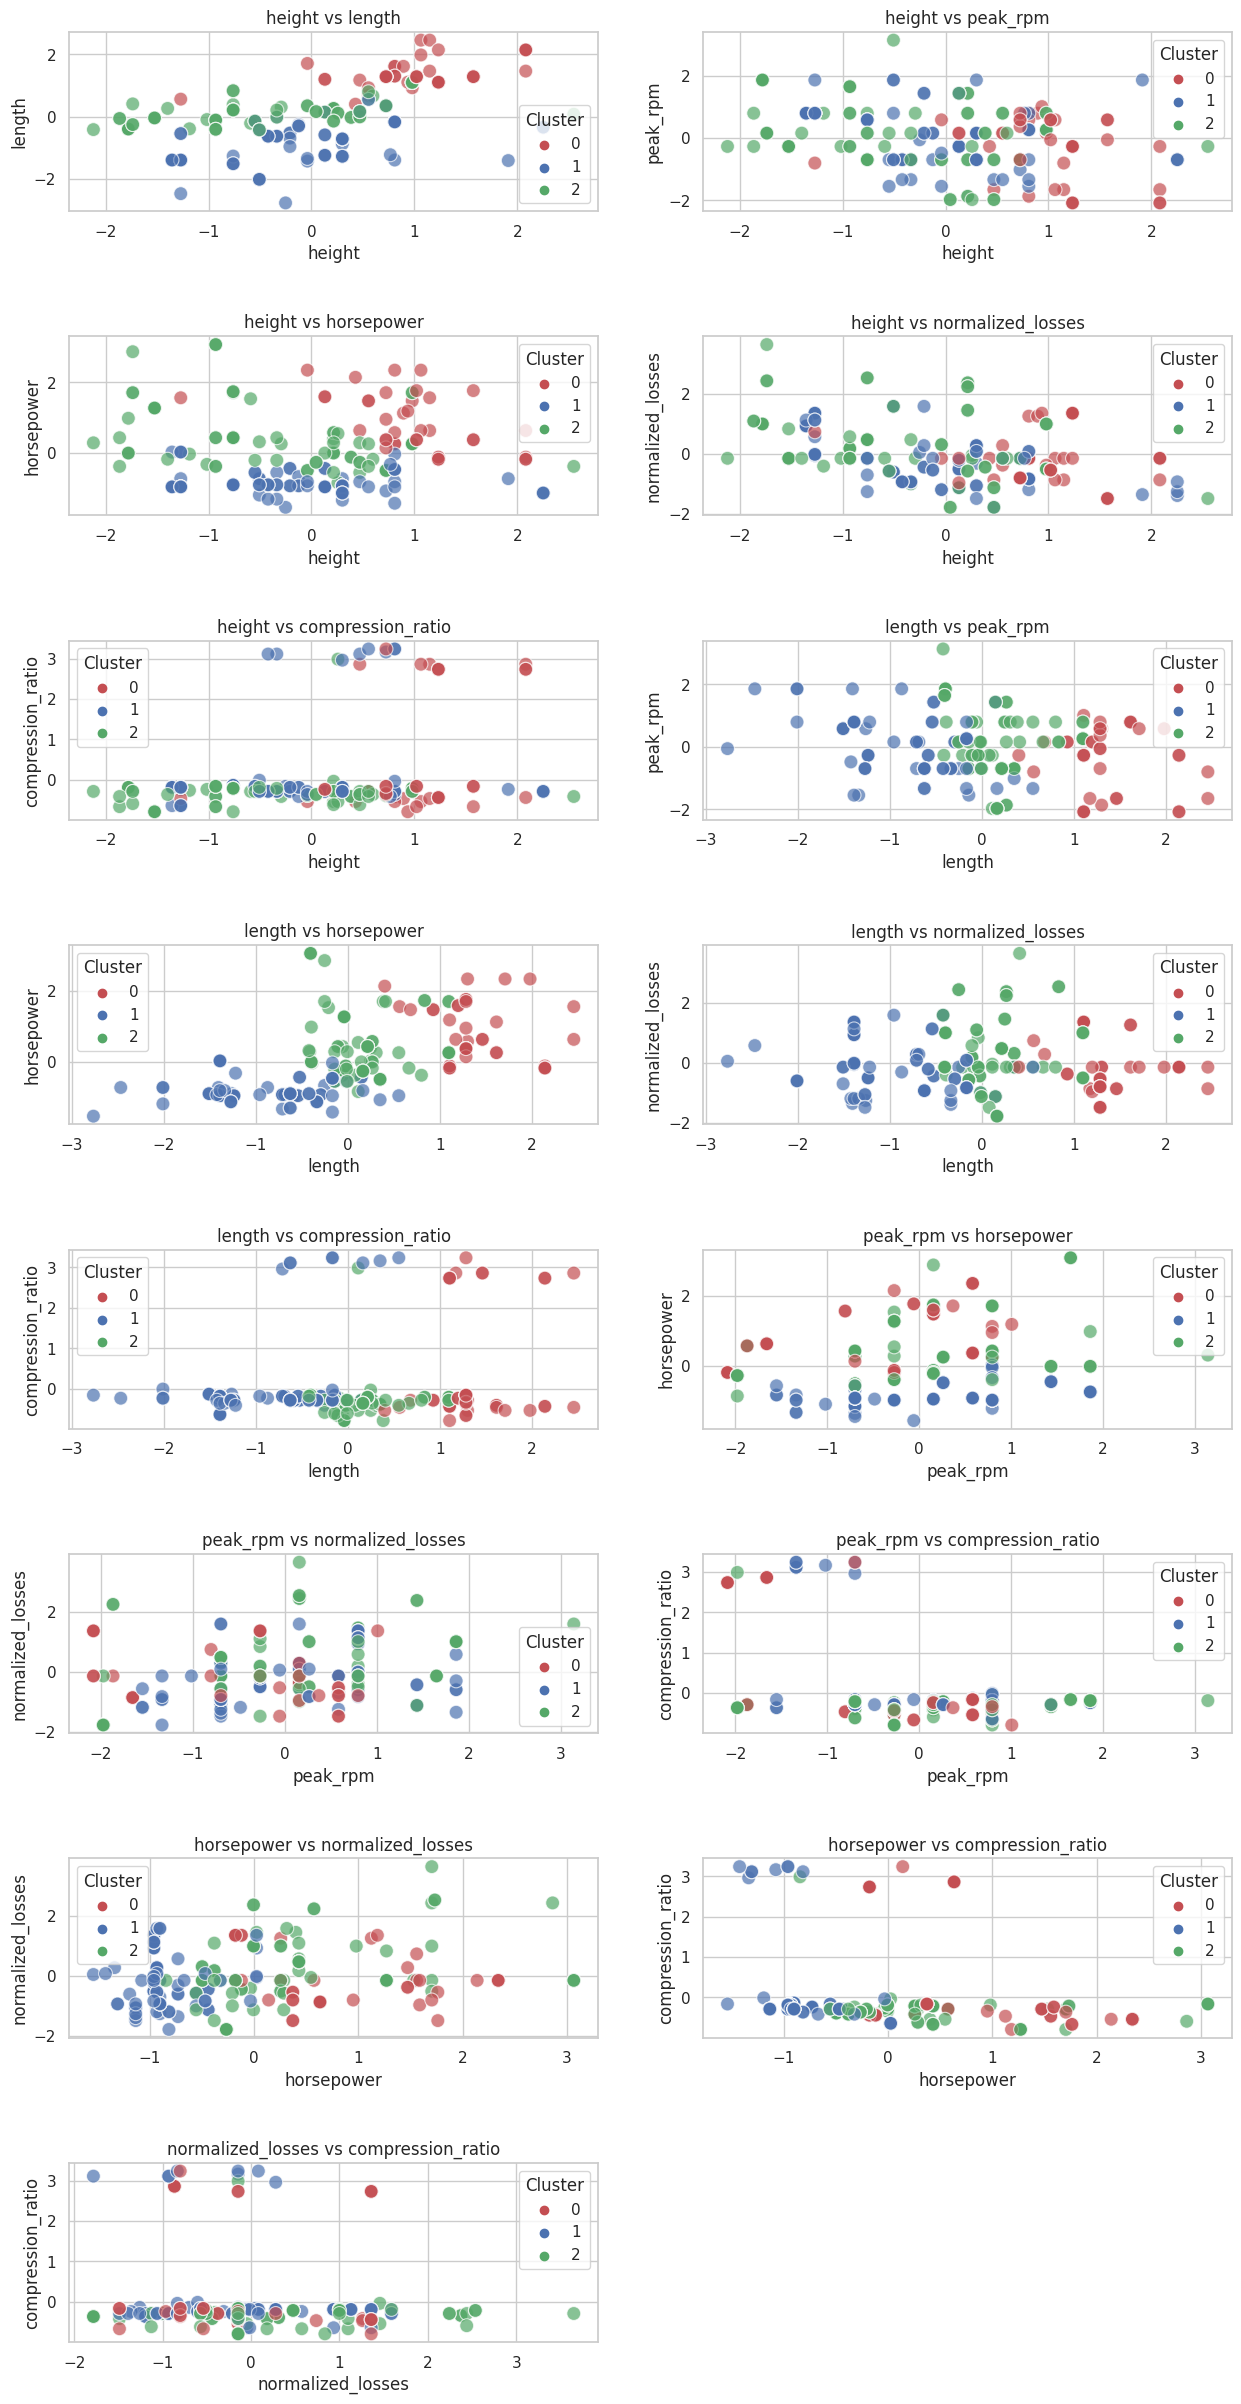

In [ ]:
fig = plt.figure(figsize=(15,30))
colorPalette = ["r", "b", "g"] #para k=3
#colorPalette = ["r", "b"]

ax = fig.add_subplot(8, 2, 1)
sns.scatterplot(x="height", y="length", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("height vs length")

ax = fig.add_subplot(8, 2, 2)
sns.scatterplot(x="height", y="peak_rpm", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("height vs peak_rpm")

ax = fig.add_subplot(8, 2, 3)
sns.scatterplot(x="height", y="horsepower", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("height vs horsepower")

ax = fig.add_subplot(8, 2, 4)
sns.scatterplot(x="height", y="normalized_losses", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("height vs normalized_losses")

ax = fig.add_subplot(8, 2, 5)
sns.scatterplot(x="height", y="compression_ratio", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("height vs compression_ratio")

ax = fig.add_subplot(8, 2, 6)
sns.scatterplot(x="length", y="peak_rpm", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("length vs peak_rpm")

ax = fig.add_subplot(8, 2, 7)
sns.scatterplot(x="length", y="horsepower", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("length vs horsepower")

ax = fig.add_subplot(8, 2, 8)
sns.scatterplot(x="length", y="normalized_losses", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("length vs normalized_losses")

ax = fig.add_subplot(8, 2, 9)
sns.scatterplot(x="length", y="compression_ratio", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("length vs compression_ratio")

ax = fig.add_subplot(8, 2, 10)
sns.scatterplot(x="peak_rpm", y="horsepower", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("peak_rpm vs horsepower")

ax = fig.add_subplot(8, 2, 11)
sns.scatterplot(x="peak_rpm", y="normalized_losses", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("peak_rpm vs normalized_losses")

ax = fig.add_subplot(8, 2, 12)
sns.scatterplot(x="peak_rpm", y="compression_ratio", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("peak_rpm vs compression_ratio")

ax = fig.add_subplot(8, 2, 13)
sns.scatterplot(x="horsepower", y="normalized_losses", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("horsepower vs normalized_losses")

ax = fig.add_subplot(8, 2, 14)
sns.scatterplot(x="horsepower", y="compression_ratio", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("horsepower vs compression_ratio")

ax = fig.add_subplot(8, 2, 15)
sns.scatterplot(x="normalized_losses", y="compression_ratio", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.7)
plt.title("normalized_losses vs compression_ratio")

plt.subplots_adjust(hspace=0.7)  # Añadí un espacio vertical entre los gráficos

plt.show()

Con el método de silueta lo más indicado podría ser solo considerar dos clusters. 

### **4.4. Metodos para selección del K (Dataset Inicial)**

#### **Codo**

En el atributo *inertia_* queda el valor de la suma de las distancias cuadráticas entre cada punto y el centro del cluster al que pertenece (el **WSS** - Within Sum of Squares, también llamado más genéricamente **SSE** - Sum of Squared Errors)

In [ ]:
kmeans.inertia_

1639.0921109416886

In [ ]:
kmeans.init

'k-means++'

A partir de los valores de WSS se puede crear el plot a partir del cual se aplica la técnica del codo, creando un clustering para diferentes valores de K. Veamos, según el método del codo, cual sería el valor del K en este conjunto de datos:

In [ ]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dataStd)
    WSSs.append(km.inertia_)
WSSs

[2988.666666666667,
 1991.4652898507193,
 1639.0921109416886,
 1468.009670427335,
 1319.634410727569,
 1182.9196925665858,
 1107.8978062332144,
 1029.013916087675,
 948.189285345997,
 893.7447227562377,
 824.1673555562347,
 779.4350087264872,
 737.6816530492611,
 693.3582111353473]

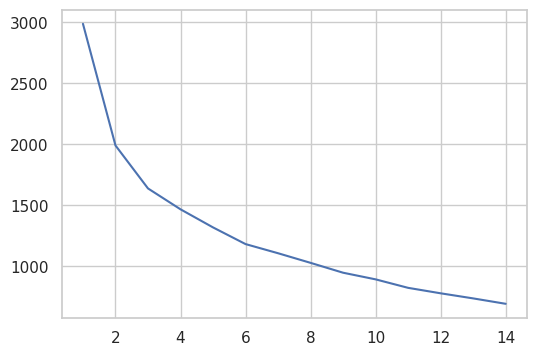

In [ ]:
plt.plot(range(1, 15), WSSs)

Con K=2 encontramos aproximadamente el codo. 

#### **Silueta**

Con el método de silueta revisamos cuántos clusters deberíamos tener para k = 2, 3, 4 y 5.

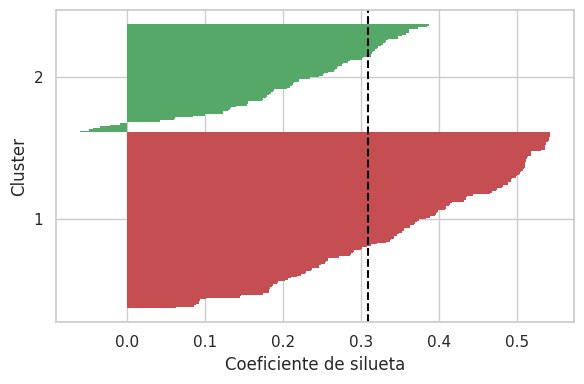

In [ ]:
k=2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
plt.show()

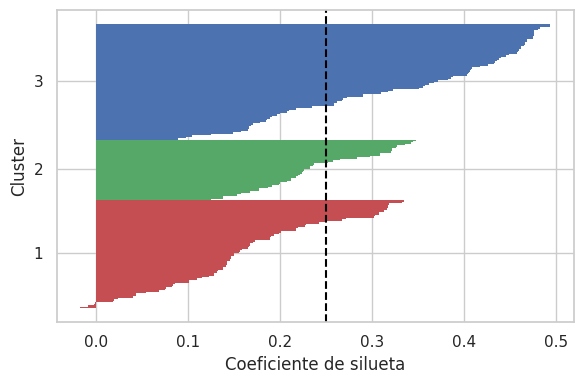

In [ ]:
k=3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
plt.show()

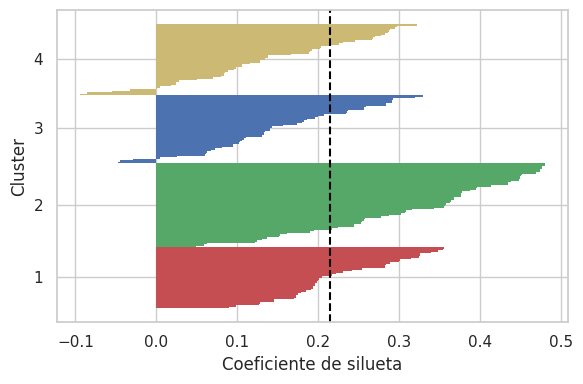

In [ ]:
k=4
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
plt.show()

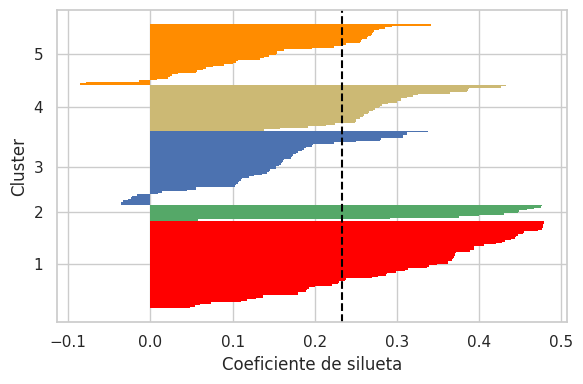

In [ ]:
k=5
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['red', 'g', 'b', 'y', 'darkorange']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
plt.show()

#### **Calinski-Harabaz**

Estimamos la métrica de Calinski-Harabasz

In [ ]:
CHs = []
for i in range(2,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dataStd)
    CH = calinski_harabasz_score(dataStd, km.labels_) 
    CHs.append(CH)
    
CHs

[95.14012750341857,
 77.80819312389912,
 64.91408538877317,
 59.12793523028329,
 56.78643094593831,
 52.34270965285315,
 50.05847976942675,
 49.22637369887402,
 47.40053396602928,
 47.53577931348394,
 46.381113356241876,
 45.51718614798018,
 45.32732016027921]

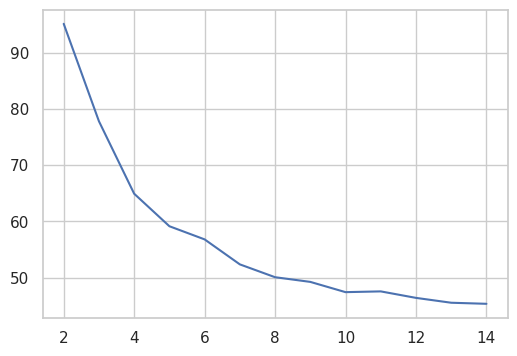

In [ ]:
plt.plot(range(2, 15), CHs)

**Conclusión:**


Dado que el análisis de componentes principales (PCA) ofrece una variedad de beneficios, como la visualización de datos en espacios de menor dimensión, la detección de patrones y estructuras ocultas, la identificación de variables influyentes en la variabilidad de los datos y el preprocesamiento de datos previo a la aplicación de otros algoritmos de aprendizaje automático, se aplicó esta técnica al conjunto de datos original. El objetivo era reducir la complejidad del conjunto de datos al seleccionar un conjunto reducido de componentes principales (según el PCA previo).

Mediante diversas visualizaciones bidimensionales, se pudo identificar que los atributos 'height' vs 'length', 'height' vs 'horsepower', 'length' vs 'peak_rpm', 'length' vs 'horsepower' y 'length' vs 'normalized_losses' permiten agrupar los datos en **clusters** y revelar relaciones entre estas variables. Estas visualizaciones proporcionan una visión clara de la estructura y las interacciones presentes en el conjunto de datos, lo que facilita la comprensión y la exploración de los patrones emergentes.

EL **k-means** inicial se aplicó sólo sobre las variables relacionadas con los componentes principales que arrojó el PCA, los resultados con éste metódo arrojó 2 clusters. De otro lado, el **k-means** calculado con todo el dataset numérico, arrojó también 2 clústers. No obstante, dado que las instrucciones del taller especifican la necesidad de escoger el mejor k entre 3 y 5, se observa que en este rango, el mejor k es 3. Por tanto, aunque el modelo considera que lo ideal son 2 clusters, en condiciones específicas, un buen número de conglomerados podría llegar a ser también 3.

En resumen, al aplicar PCA y utilizar visualizaciones bidimensionales, se pudo identificar que los atributos mencionados desempeñan un papel importante en la agrupación de datos y en la revelación de relaciones entre ellos. Estos hallazgos son valiosos para comprender la estructura subyacente de los datos y pueden proporcionar información relevante para futuros análisis y toma de decisiones en el campo de la ciencia de datos.

# **Bibliografía**

* Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: a guide for data scientists. O'Reilly Media, Inc.

* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2009). An introduction to statistical learning: With applications in R. Springer.

* Provost, F., & Fawcett, T. (2013). Data Science for Business: What you need to know about data mining and data-analytic thinking. O'Reilly.

**EDA**
* Sosa, Anibal. 02-EDA-Ejemplo.html. Jupiter Notebook. Obtenido de Intu [Fundamentos de Analítica, Unidad 2]. Consultado en Mayo de 2023. 
*   https://github.com/armandoordonez/eda_couse/blob/main/3_data_preparation_cleaning.ipynb
*   https://github.com/armandoordonez/eda_couse/blob/main/Label_encoding.ipynb

**Random Forest**
*   Sosa, Anibal. 08_Arboles_Churn-STUD. Jupiter Notebook. Obtenido de Intu [Fundamentos de Analítica, Unidad 2]. Consultado en Mayo de 2023. 

**Bagging**
*   Sosa, Anibal. 08_Arboles_Churn-STUD. Jupiter Notebook. Obtenido de Intu [Fundamentos de Analítica, Unidad 2]. Consultado en Mayo de 2023.

**XGBoost**
*   Sosa, Anibal. 08-XGBoost. Jupiter Notebook. Obtenido de Intu [Fundamentos de Analítica, Unidad 2]. Consultado en Mayo de 2023.

**PCA**
*   Sosa, Anibal. 10-03-SUPERMERCADOS-PCA-STUD.html. Jupiter Notebook. Obtenido de Intu [Fundamentos de Analítica, Unidad 3]. Consultado en Mayo de 2023.

*   Sosa, Anibal. 10_PCA-Ejemplo.html. Jupiter Notebook. Obtenido de Intu [Fundamentos de Analítica, Unidad 3]. Consultado en Mayo de 2023.

**K-Means**
*   Sosa, Anibal. 09_KMeans-Supermercados-STUD. Jupiter Notebook. Obtenido de Intu [Fundamentos de Analítica, Unidad 3]. Consultado en Mayo de 2023.


# **Rubrica**

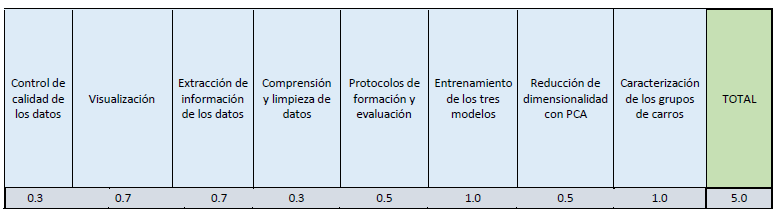